In [43]:
import uproot3 as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.fft import fft, fftfreq

In [44]:
def get_momentum(file,path):
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'event_tree']["dm_px"].array()
        py = f[b'event_tree']["dm_py"].array()
        pz = f[b'event_tree']["dm_pz"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
    
def get_meson_momentum(file,path):
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'meson_tree']["meson_px"].array()
        py = f[b'meson_tree']["meson_py"].array()
        pz = f[b'meson_tree']["meson_pz"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
    
def get_meson_postion(file,path):
    
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'meson_tree']["meson_origin_x"].array()
        py = f[b'meson_tree']["meson_origin_y"].array()
        pz = f[b'meson_tree']["meson_origin_z"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
def get_photon_momentum(file,path):
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'dark_photon_tree']["photon_px"].array()
        py = f[b'dark_photon_tree']["photon_py"].array()
        pz = f[b'dark_photon_tree']["photon_pz"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
def get_photon_origin(file,path):
    with up.open(path+file) as f:
        if f.keys() == []:
            print(f"no keys for {file}")
            return None
        px = f[b'dark_photon_tree']["photon_origin_x"].array()
        py = f[b'dark_photon_tree']["photon_origin_y"].array()
        pz = f[b'dark_photon_tree']["photon_origin_z"].array()
        df = pd.DataFrame({'px':px,'py':py,'pz':pz})
        return df
    
def cartesian_to_spherical(df):
    p = np.sqrt(df['px']**2 + df['py']**2 + df['pz']**2)
    theta = np.arccos(df['pz']/p)
    phi = np.arctan2(df['py'],df['px'])
    new_df = pd.DataFrame({'p':p,'theta':theta,'phi':phi})
    return new_df
#only to test the conversion
def spherical_to_cartesian(df):
    px = df['p']*np.sin(df['theta'])*np.cos(df['phi'])
    py = df['p']*np.sin(df['theta'])*np.sin(df['phi'])
    pz = df['p']*np.cos(df['theta'])
    new_df = pd.DataFrame({'px':px,'py':py,'pz':pz})
    return new_df
def get_name_info (file_name):
    # Split the file name
    split_file_name = file_name.split("_")

    origin_type = split_file_name[0]
    dm_type = split_file_name[1]
    mass = split_file_name[3]
    mass = float(mass)
    dt_ratio = split_file_name[5].strip(".root")
    dt_ratio = float(dt_ratio)
    return origin_type, dm_type, mass, dt_ratio
def phi(px, py, pz, p0):
    if px == 0 and py == 0:
        return 0
    elif px > 0 and py > 0:
        return np.arctan(np.abs(py / px))
    elif px < 0 and py > 0:
        return np.pi - np.arctan(np.abs(py / px))
    elif px < 0 and py < 0:
        return np.pi + np.arctan(np.abs(py / px))
    else:
        return 2 * np.pi - np.arctan(np.abs(py / px))

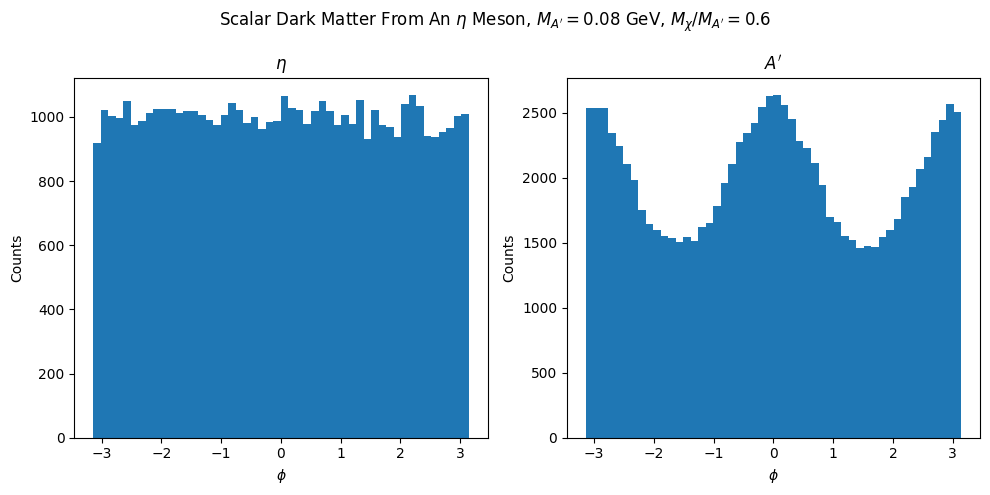

In [45]:
# Alex's function
# scalar ma = 0.08, 0.6
mom = get_momentum("eta_scalar_ma_0.08_dt_0.6.root","../data/angle/")
mom = cartesian_to_spherical(mom)

# get the meson distribution
meson = get_meson_momentum("eta_scalar_ma_0.08_dt_0.6.root","../data/angle/")
meson = cartesian_to_spherical(meson)

fig = plt.figure(figsize=(10,5))
ax = fig.subplots(1,2)

ax[0].hist(meson["phi"], bins=50, color='tab:blue', label='Meson')
ax[0].set(title=r"$\eta$", xlabel=r"$\phi$", ylabel="Counts")

ax[1].hist(mom['phi'],bins=50, color='tab:blue', label='Scalar Dark Matter')
ax[1].set(title=r"$A'$", xlabel=r"$\phi$", ylabel="Counts")

# give the plot a title

fig.suptitle(r"Scalar Dark Matter From An $\eta$ Meson, $M_{A'}=0.08$ GeV, $M_\chi/M_{A'}=0.6$")
fig.tight_layout()
fig.savefig("../plots/phi_and_meson.png")
fig.savefig("../plots/phi_and_meson.pdf")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


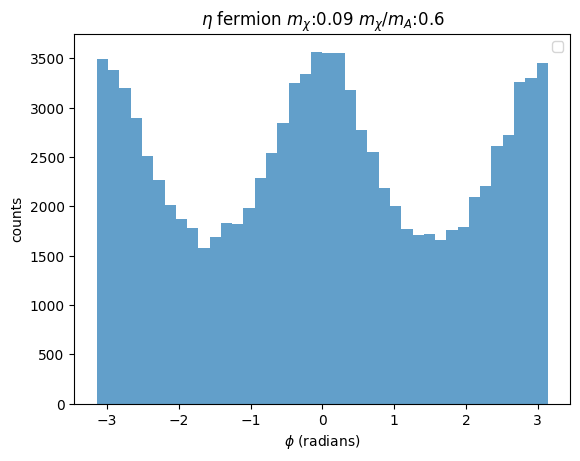

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


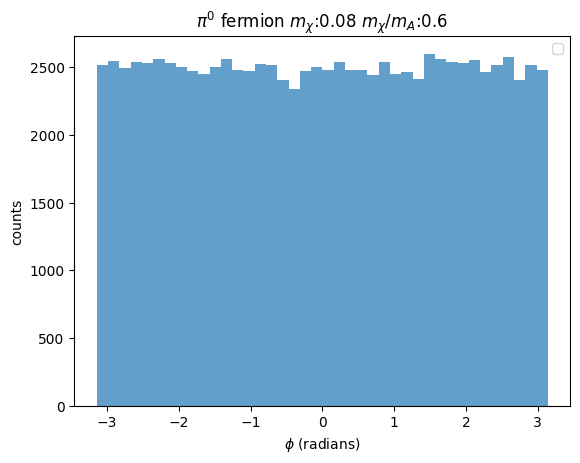

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


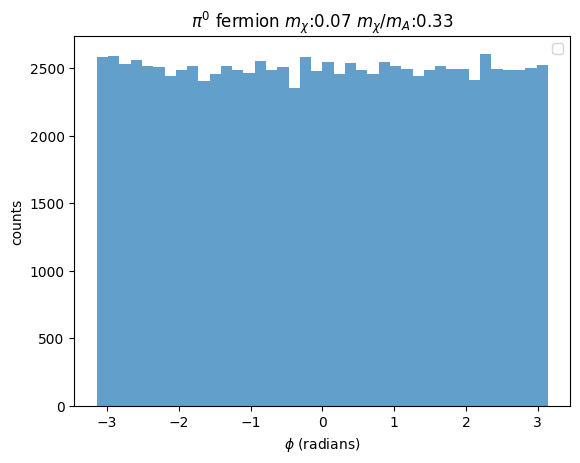

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


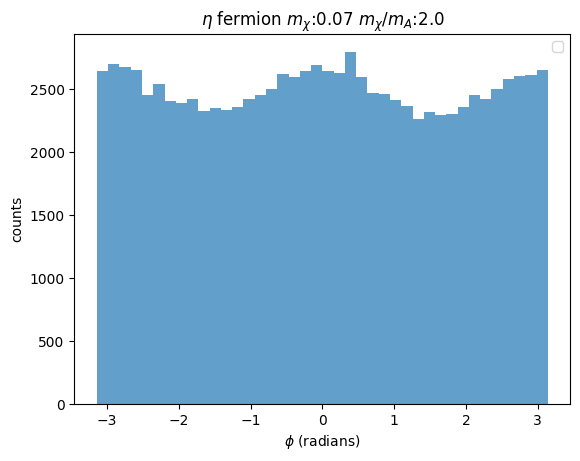

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


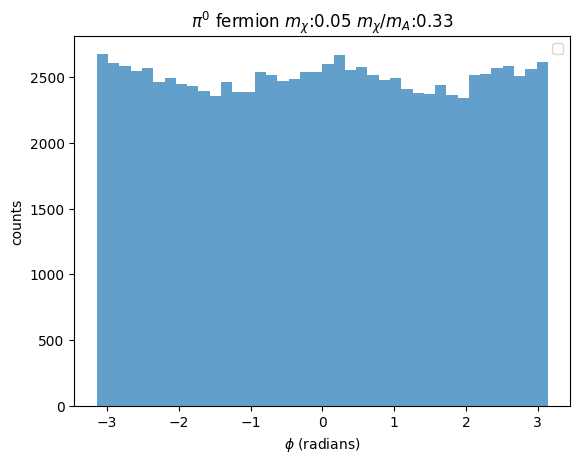

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


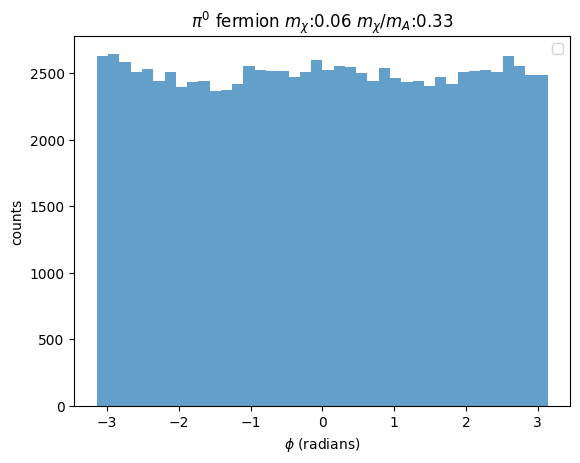

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


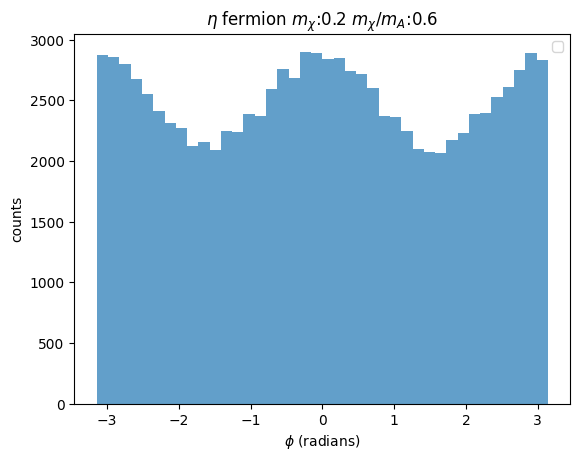

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


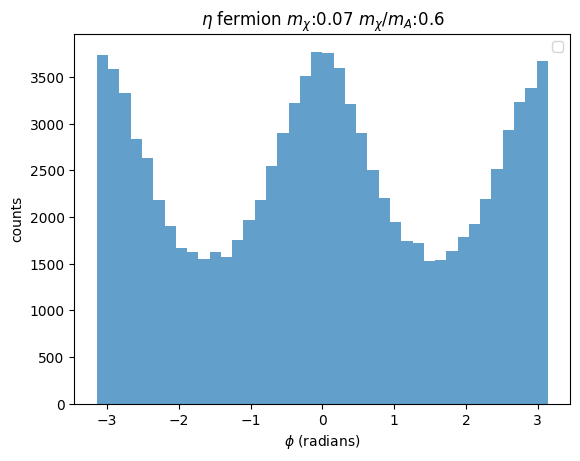

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


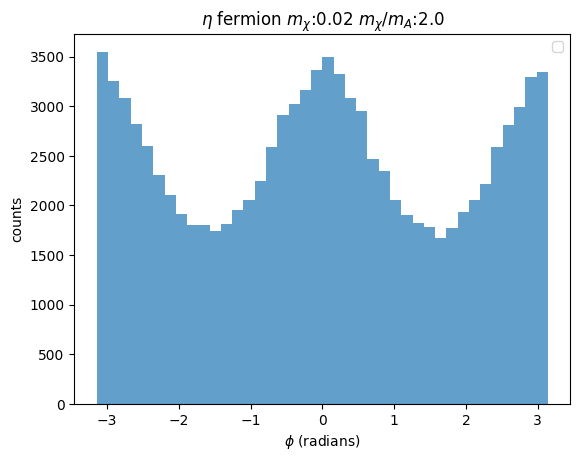

no keys for pi0_fermion_ma_0.03_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


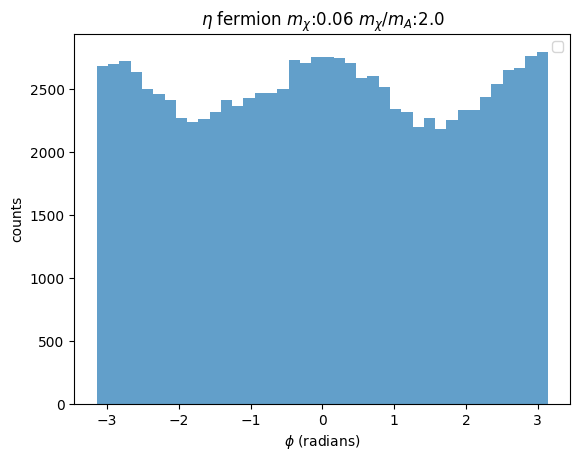

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


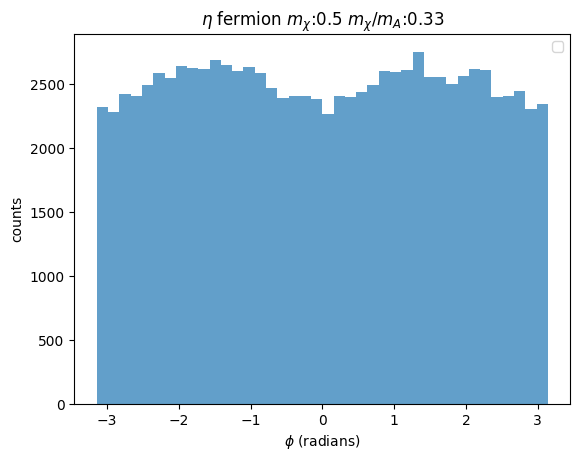

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


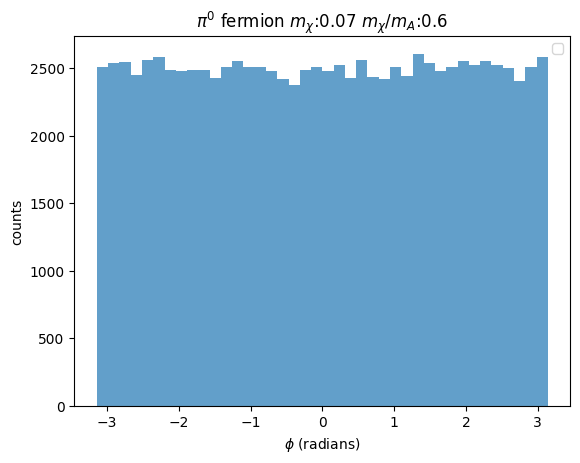

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


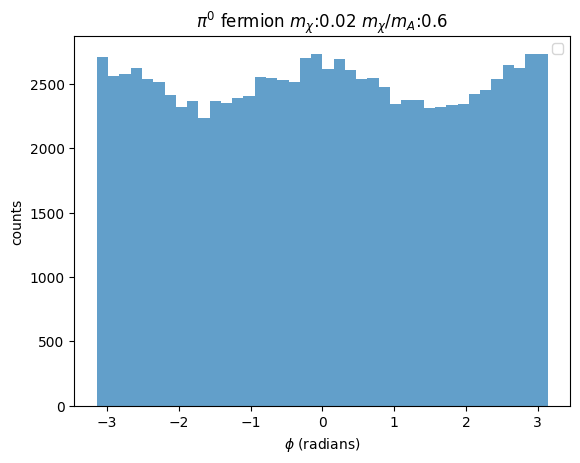

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


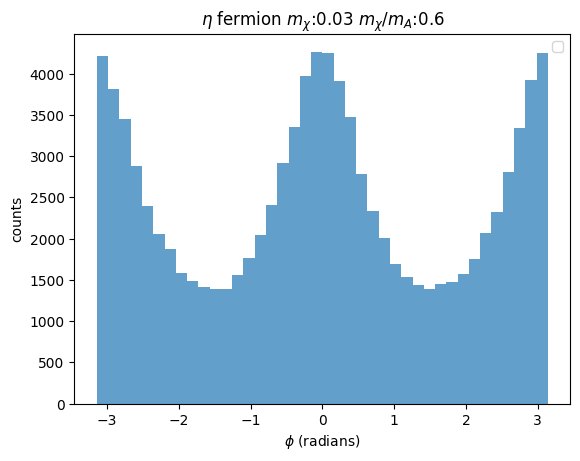

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


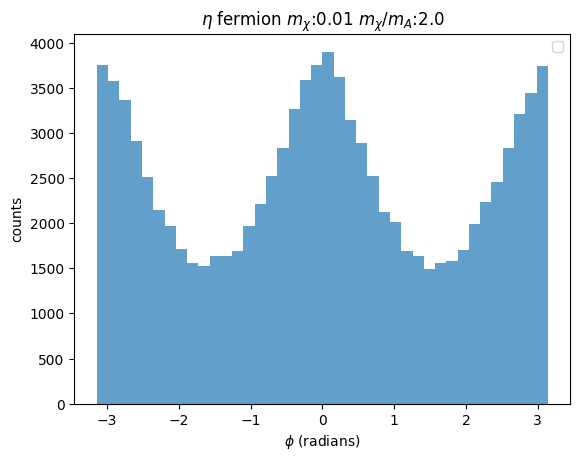

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.1_dt_0.33.root


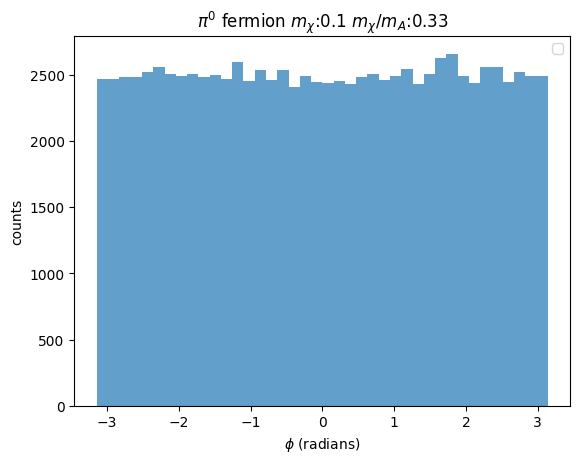

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


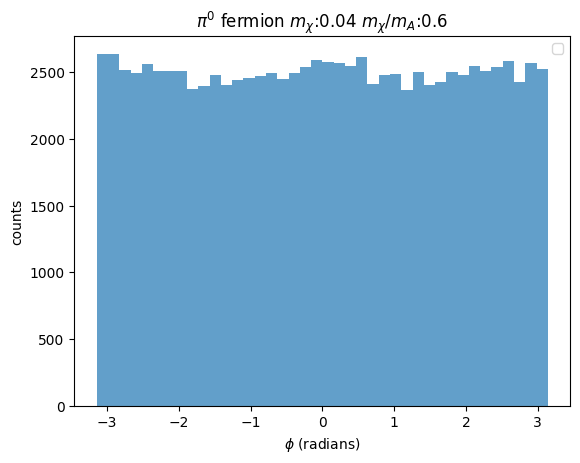

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


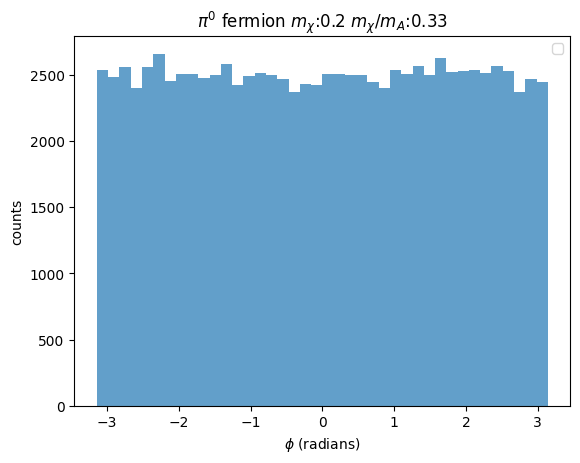

no keys for eta_fermion_ma_0.07_dt_0.33.root
no keys for eta_fermion_ma_0.04_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


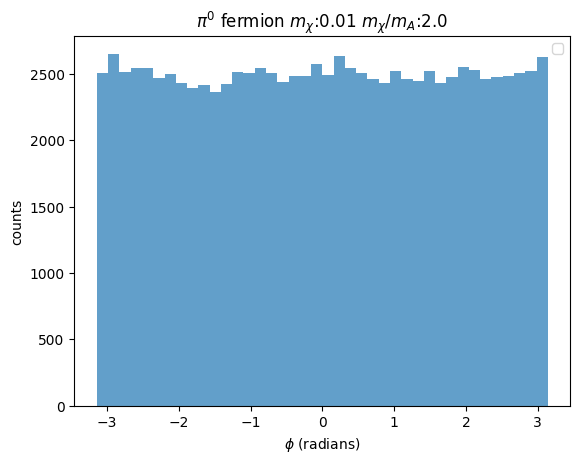

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


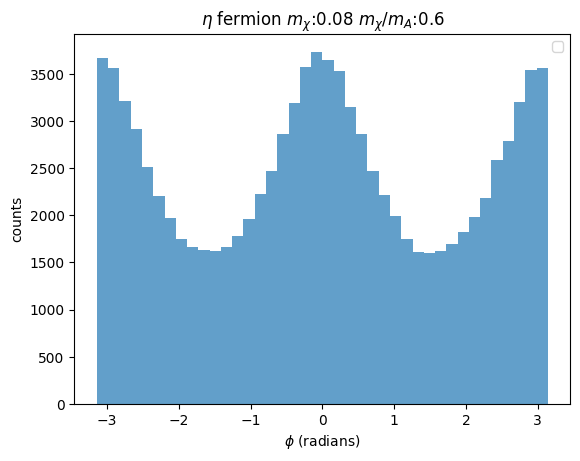

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


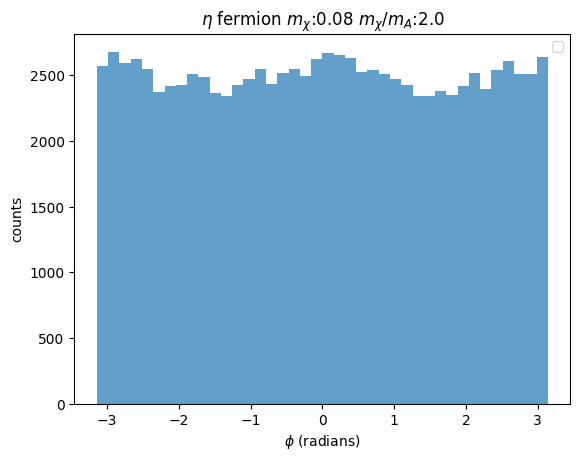

no keys for eta_fermion_ma_0.09_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


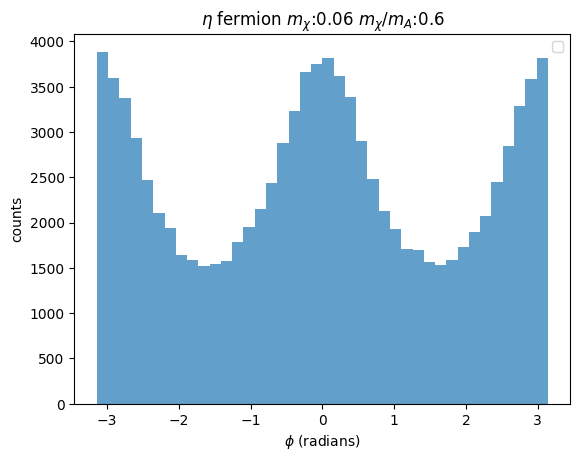

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


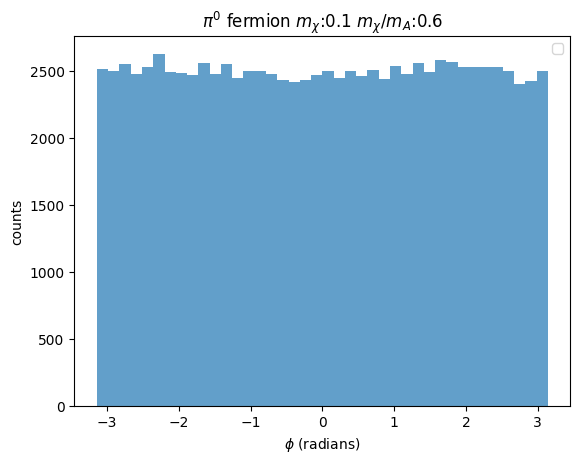

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


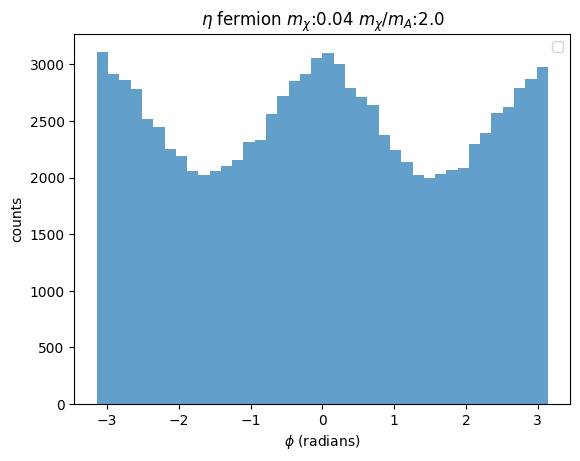

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


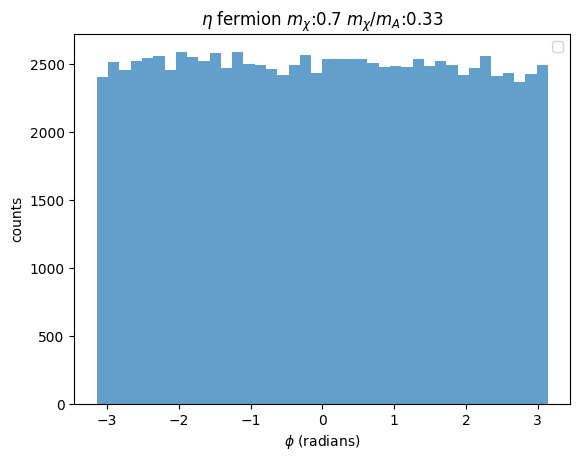

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


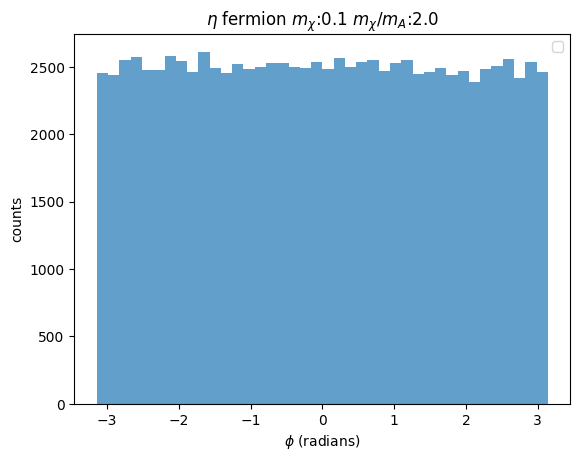

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


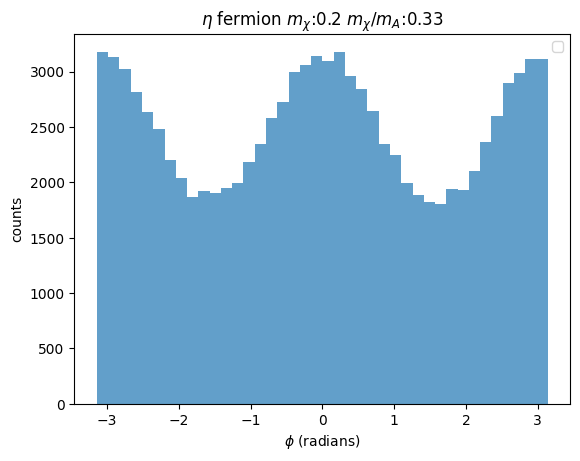

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


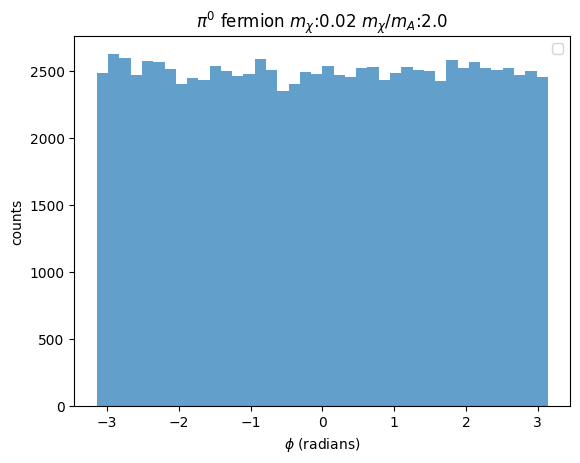

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


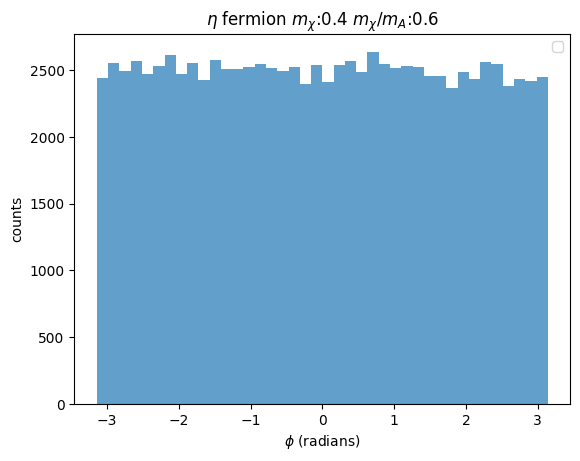

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


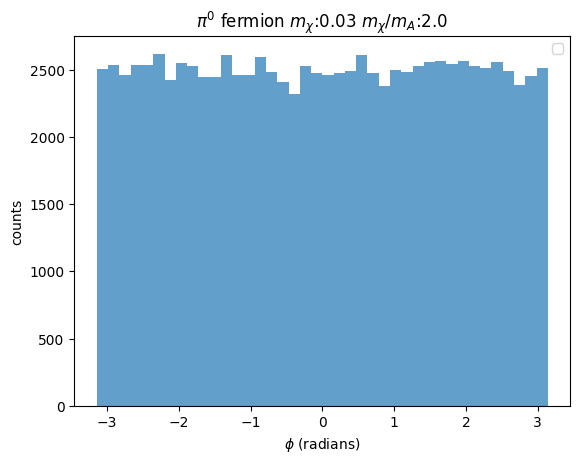

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


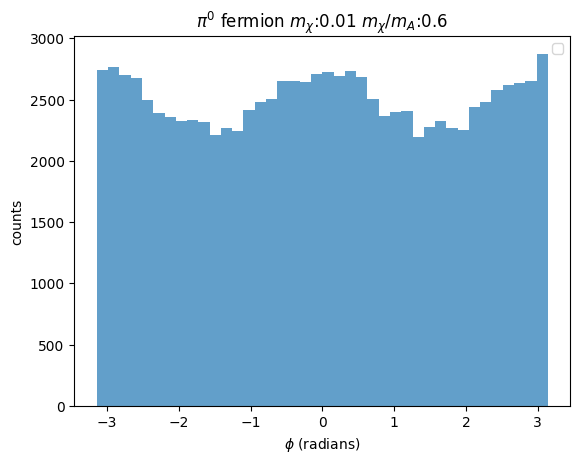

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


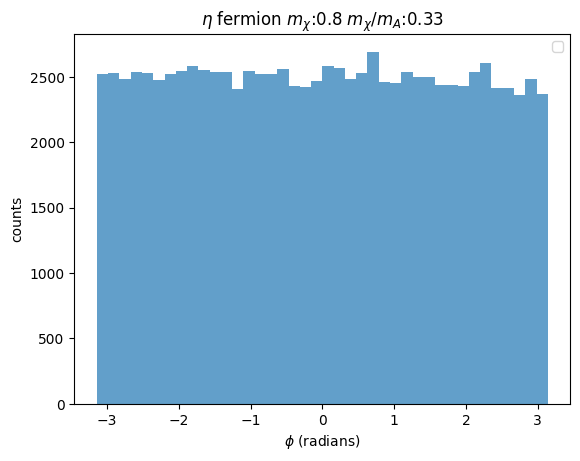

no keys for pi0_fermion_ma_0.02_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


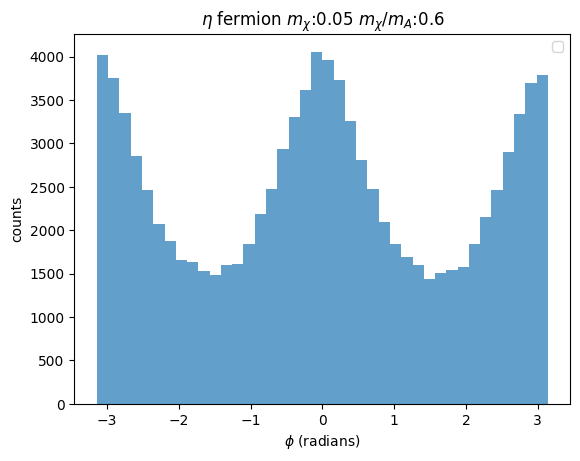

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


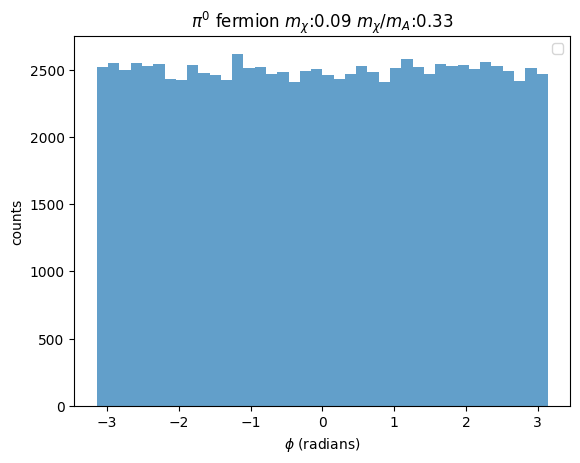

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


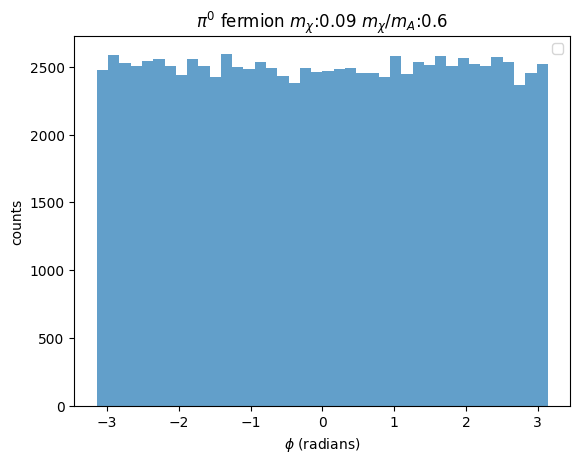

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


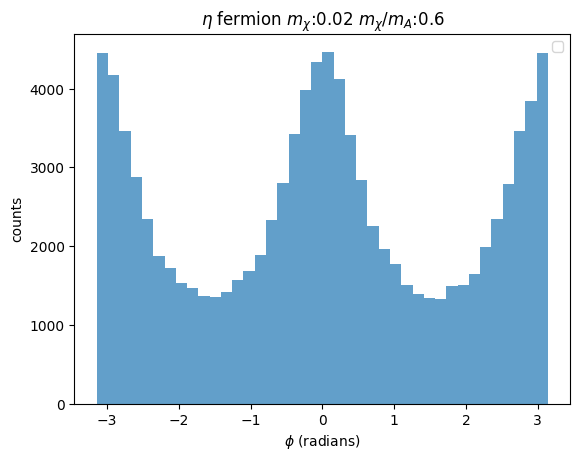

no keys for eta_fermion_ma_0.01_dt_0.6.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


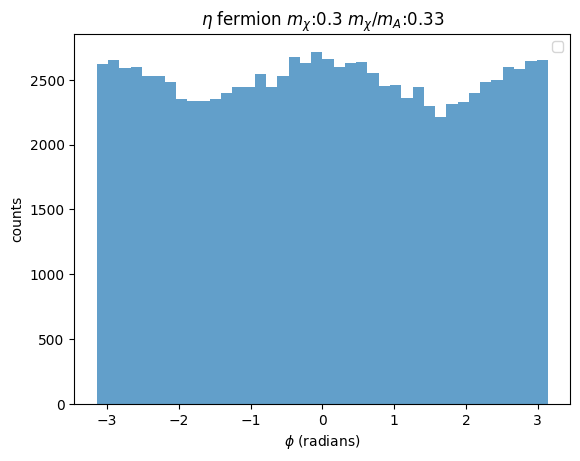

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


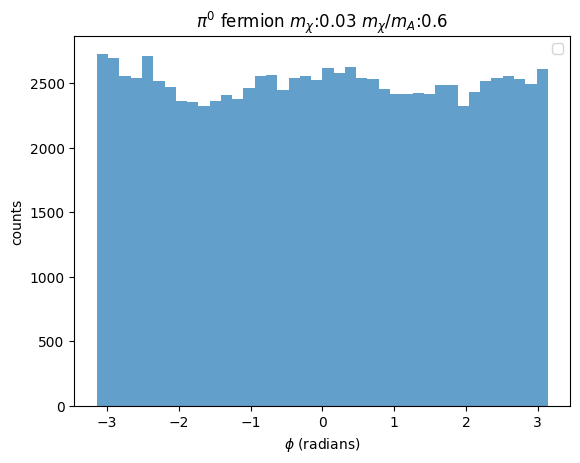

no keys for pi0_fermion_ma_0.04_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


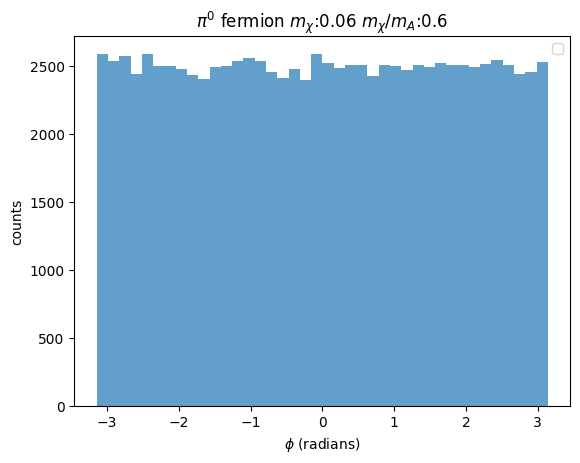

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


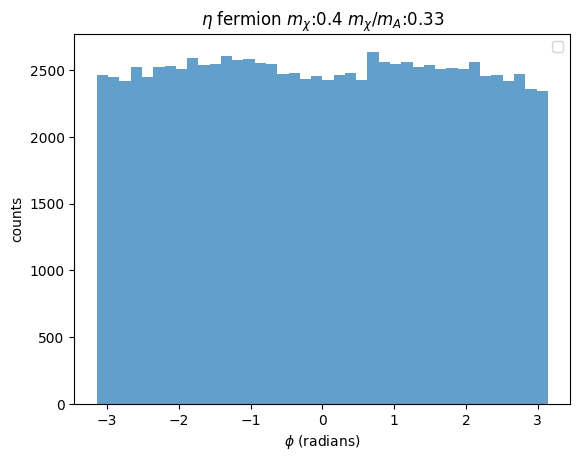

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


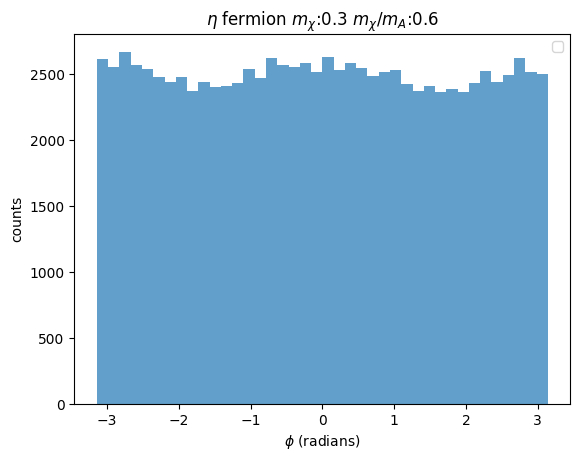

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


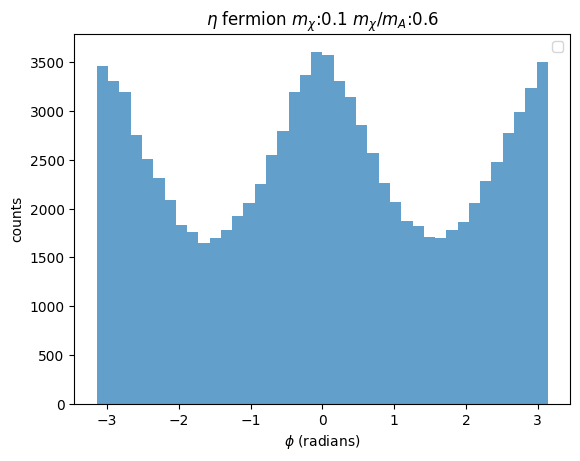

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.02_dt_0.33.root
no keys for eta_fermion_ma_0.02_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root


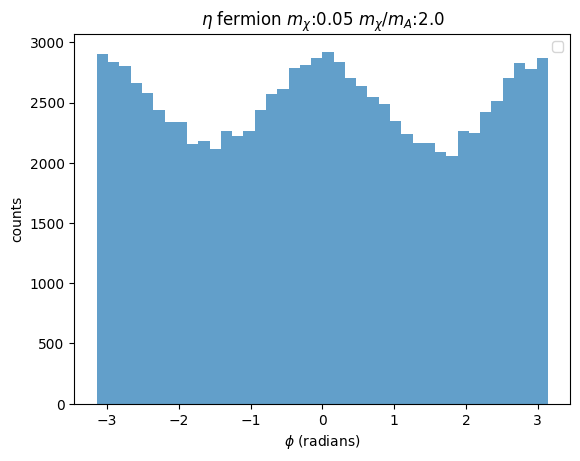

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


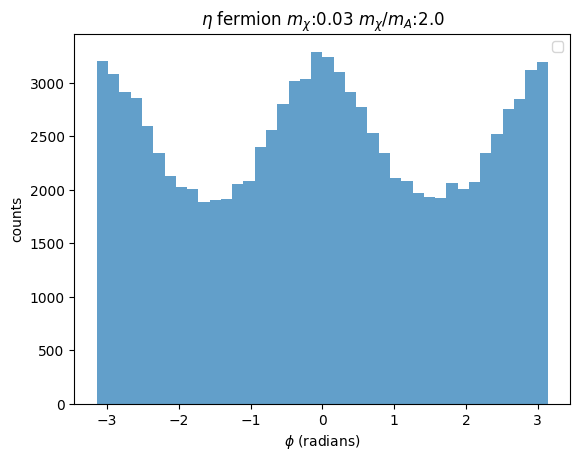

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


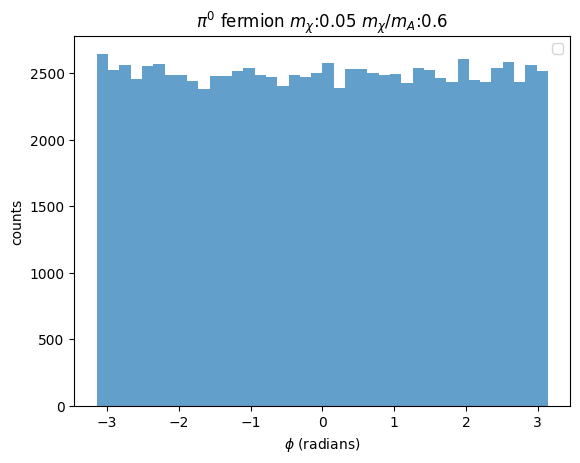

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


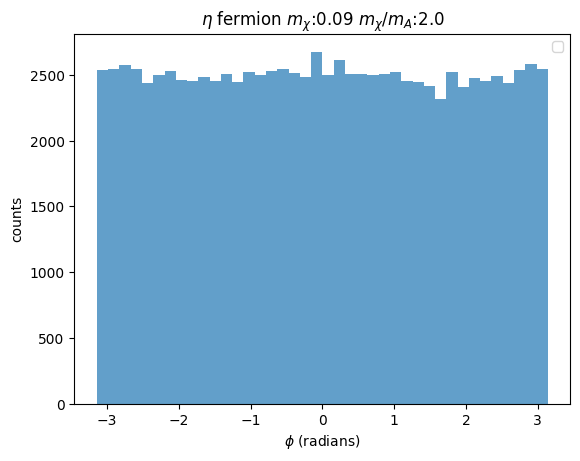

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


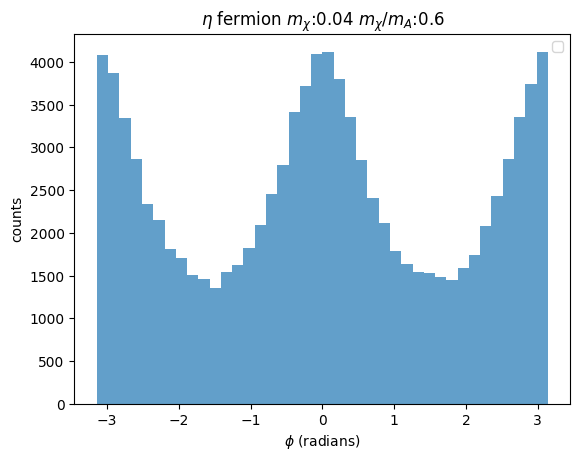

no keys for eta_fermion_ma_0.08_dt_0.33.root
no keys for eta_fermion_ma_0.06_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


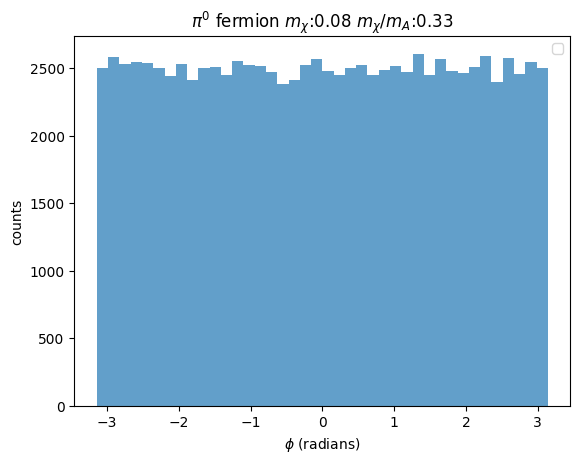

no keys for eta_fermion_ma_0.05_dt_0.33.root
no keys for eta_fermion_ma_0.03_dt_0.33.root
no keys for eta_fermion_ma_0.03_dt_0.33.root
no keys for pi0_fermion_ma_0.01_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


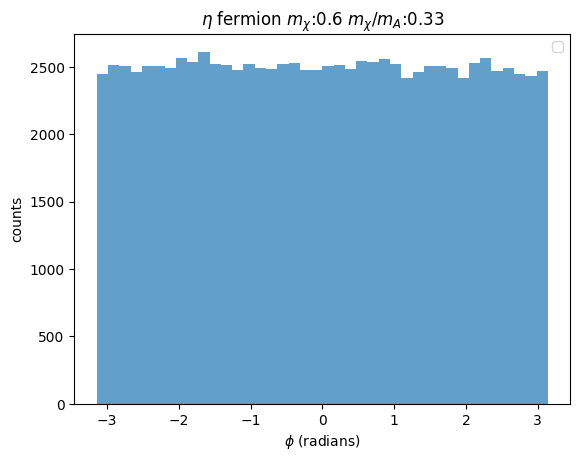

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


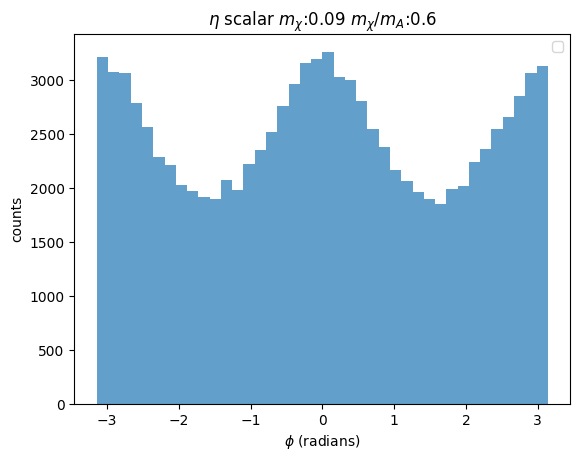

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


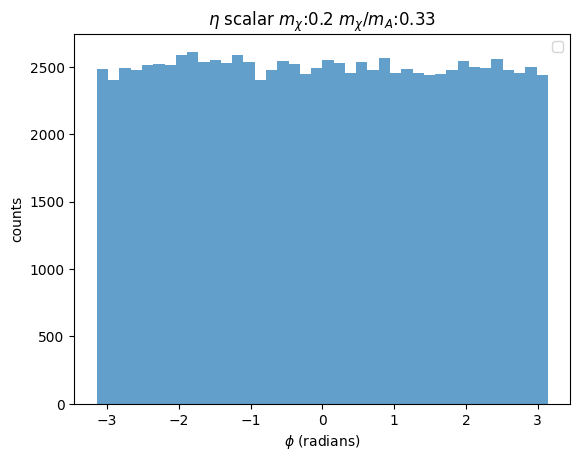

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


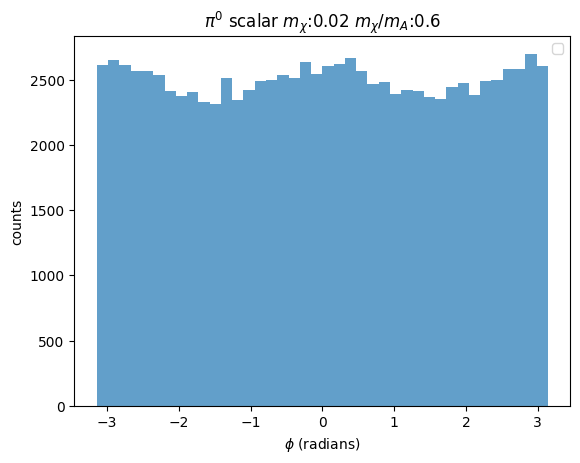

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


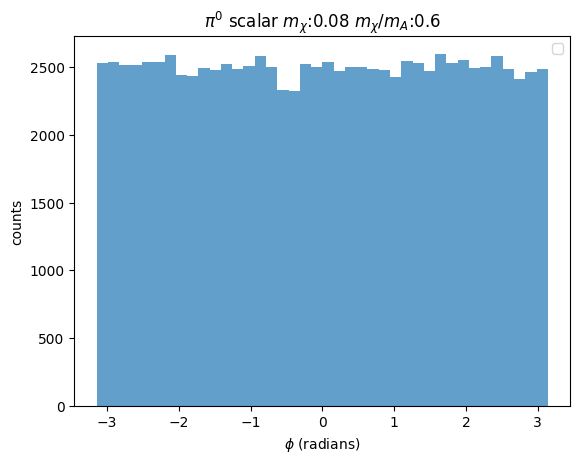

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


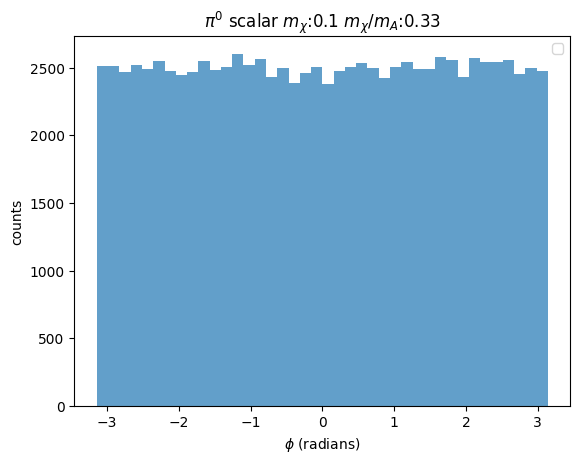

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


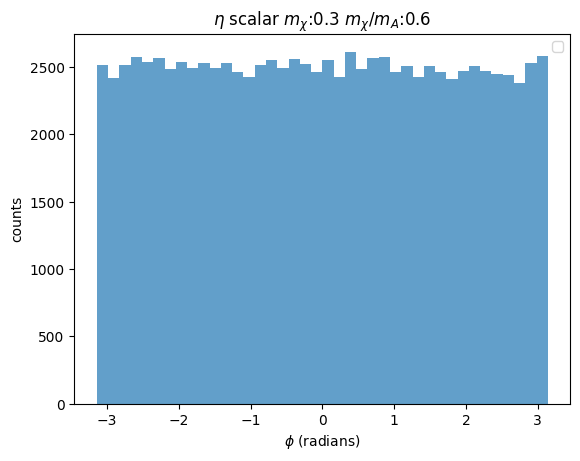

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


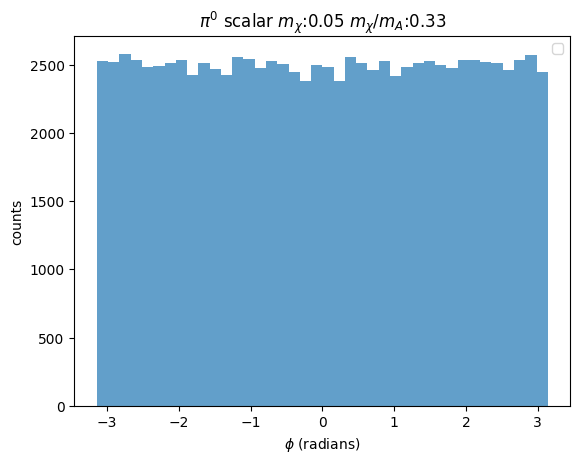

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


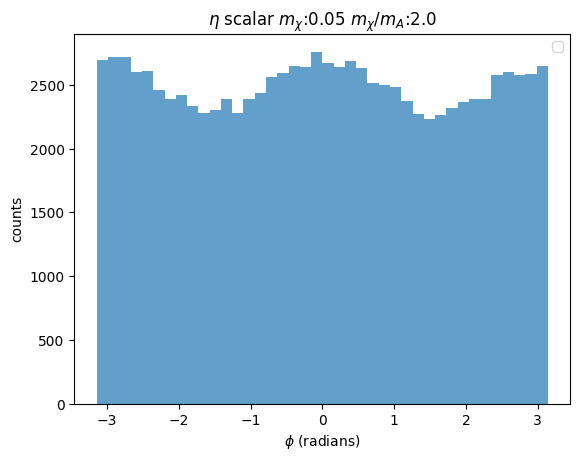

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


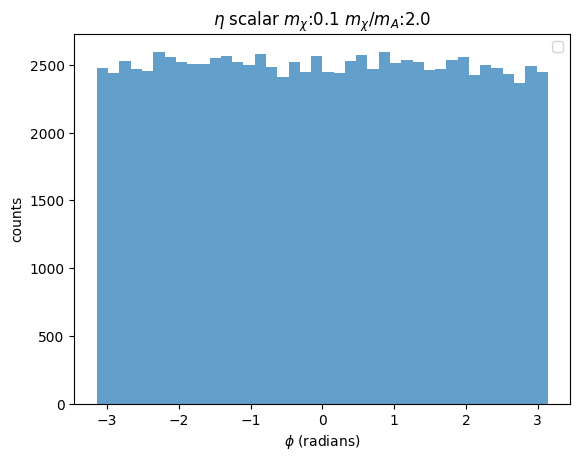

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


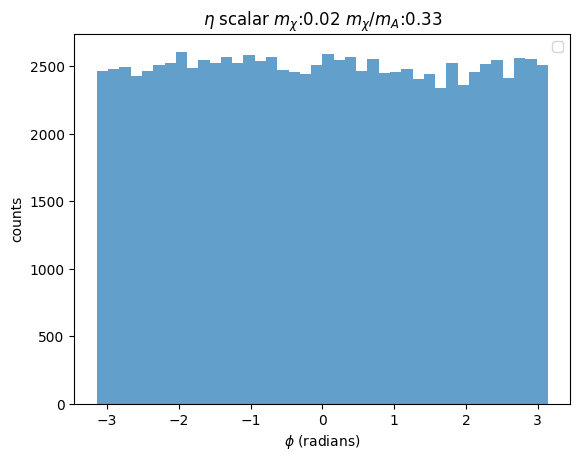

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


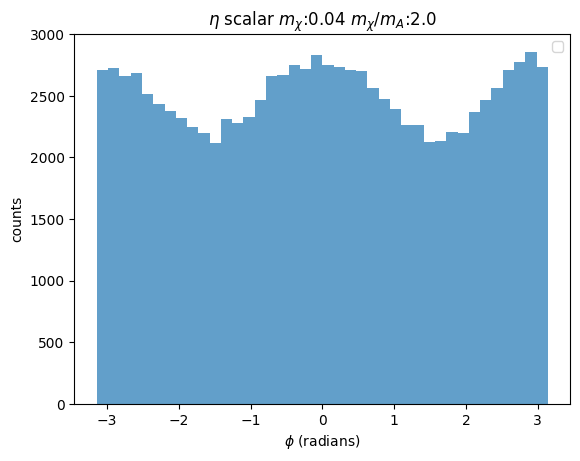

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


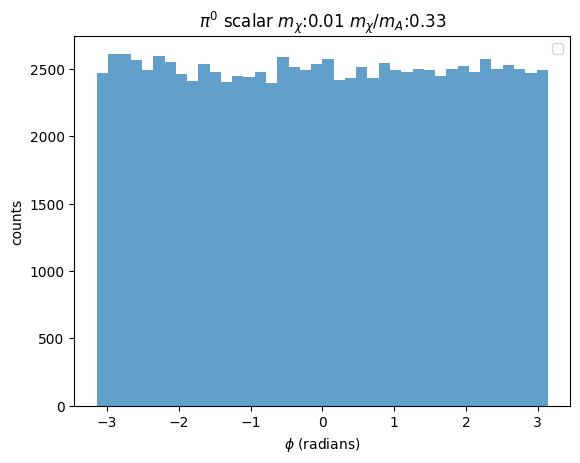

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


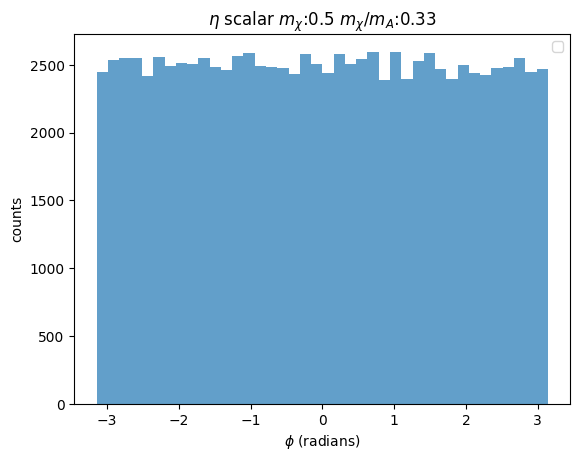

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


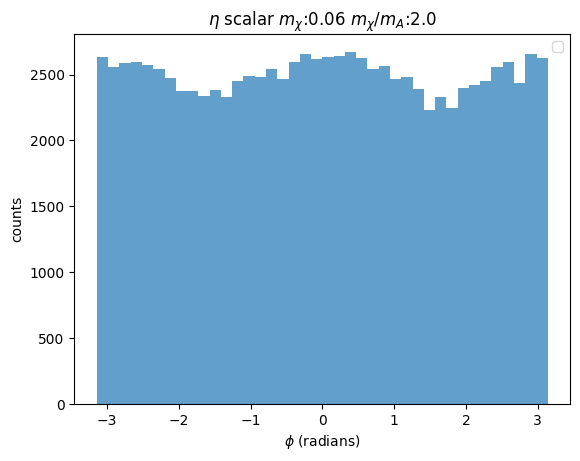

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


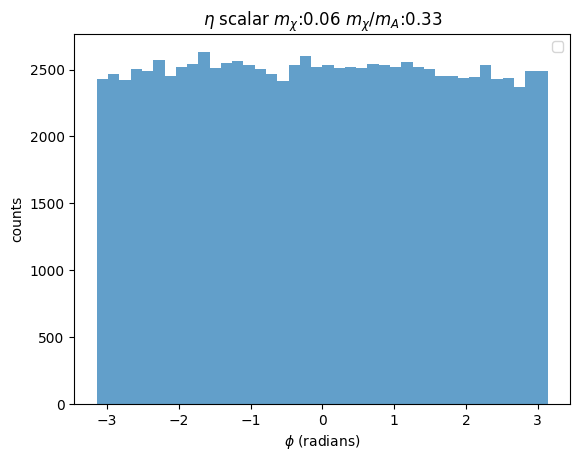

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


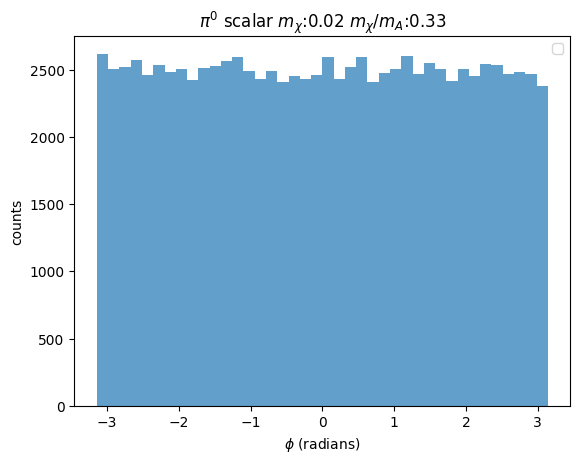

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


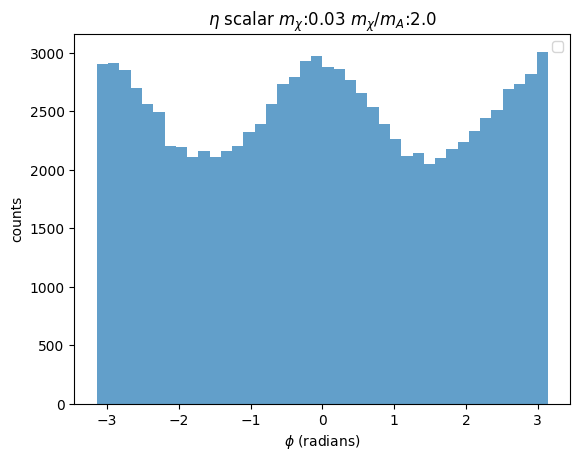

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


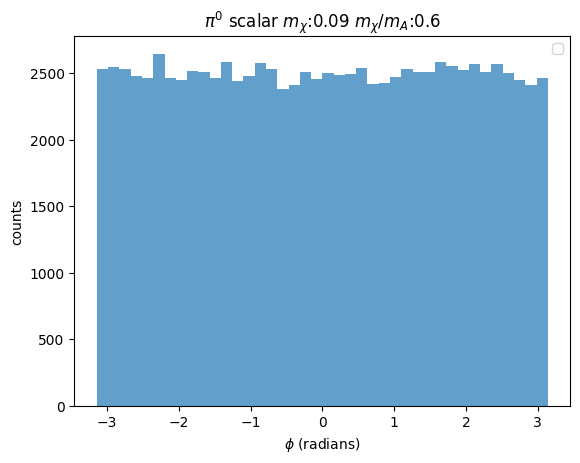

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


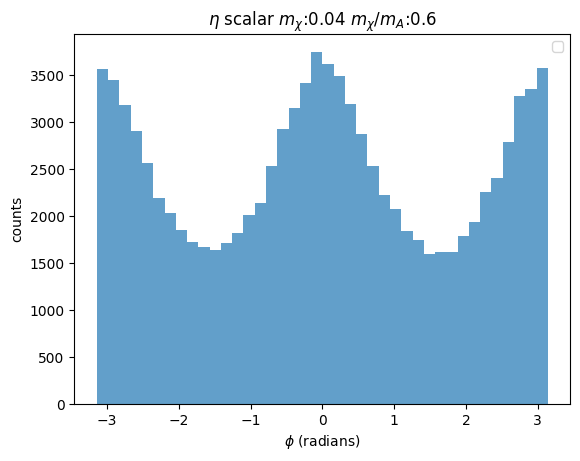

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


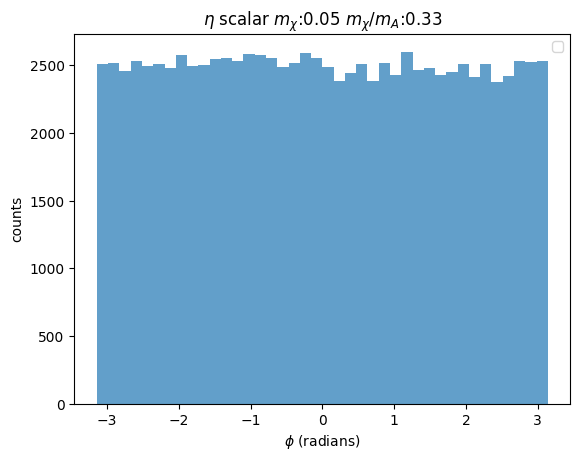

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


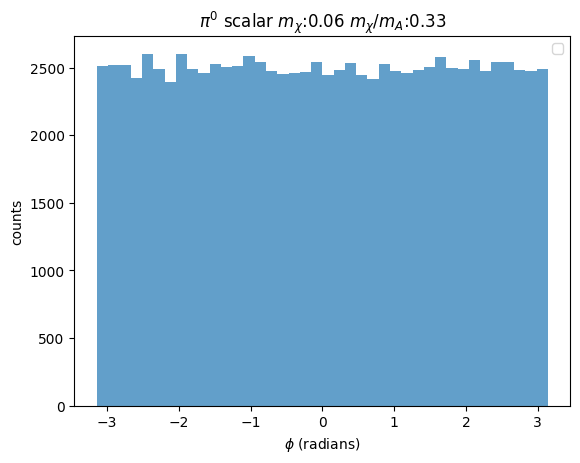

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


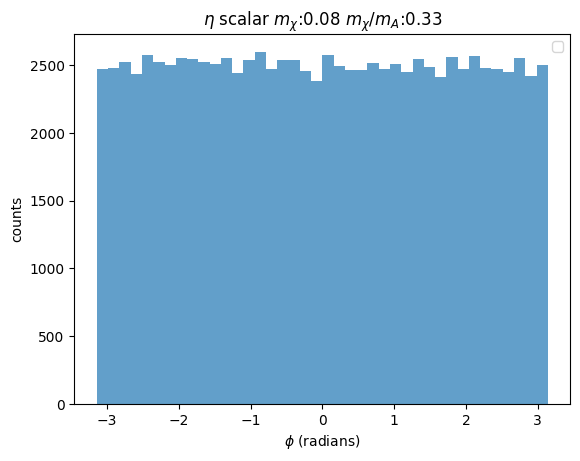

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


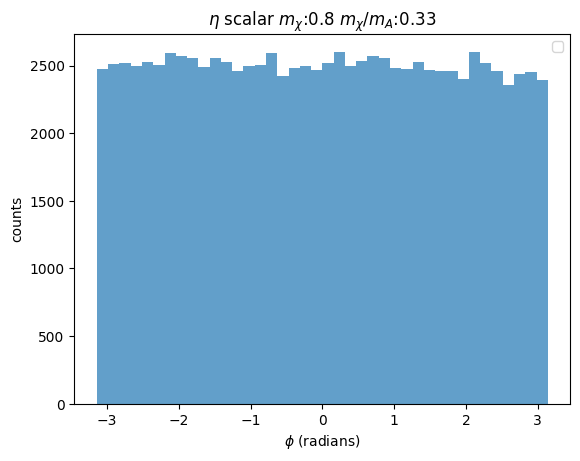

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


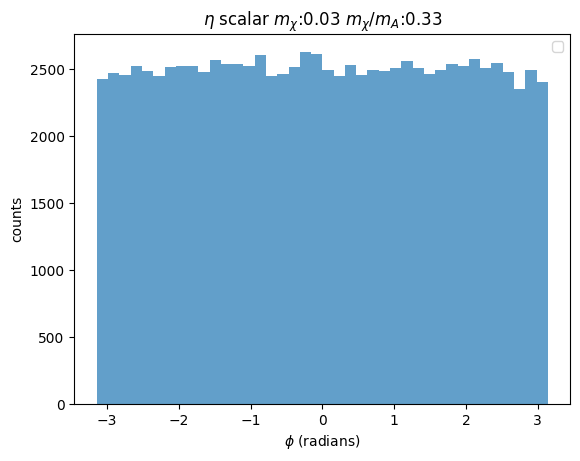

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


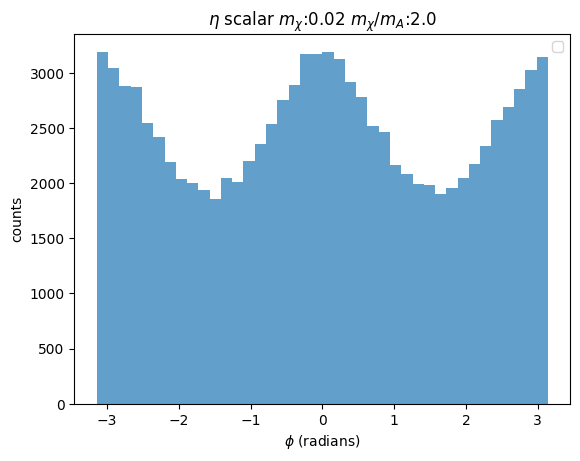

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


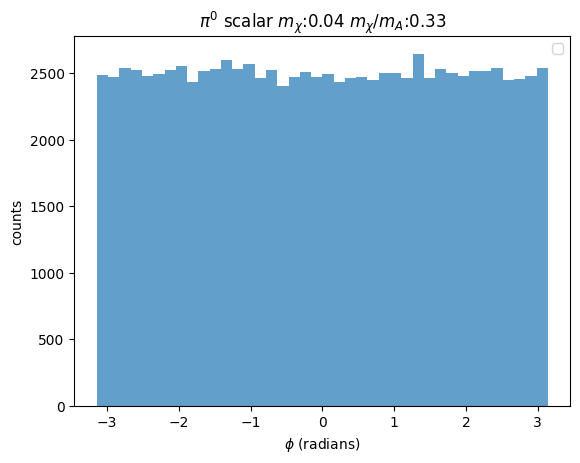

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


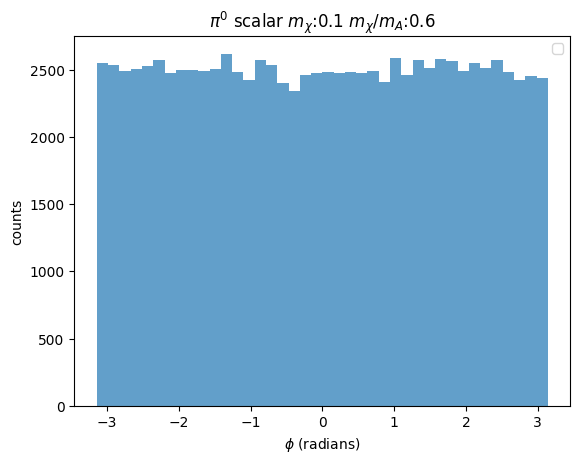

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


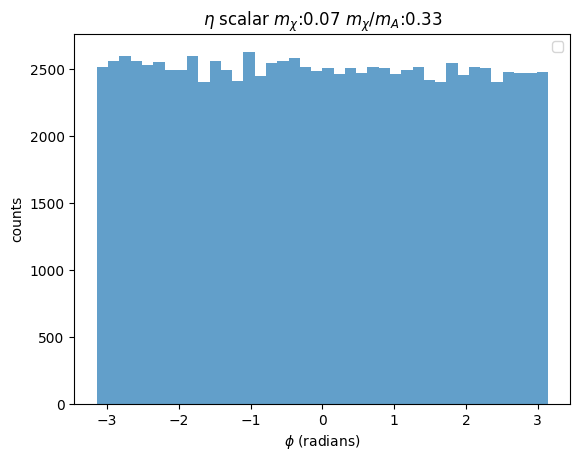

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


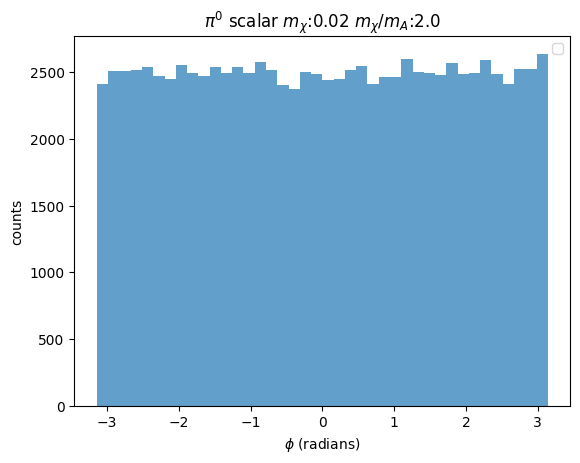

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


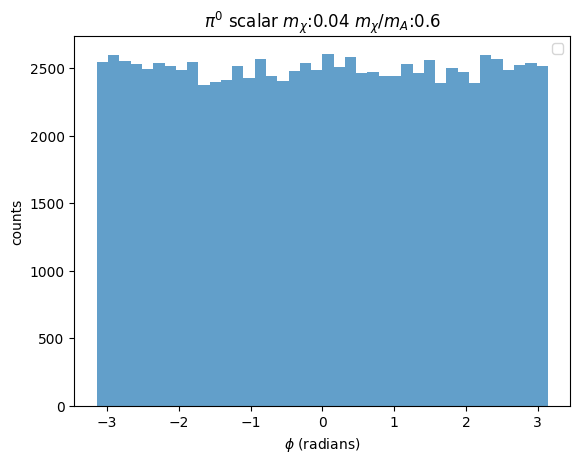

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


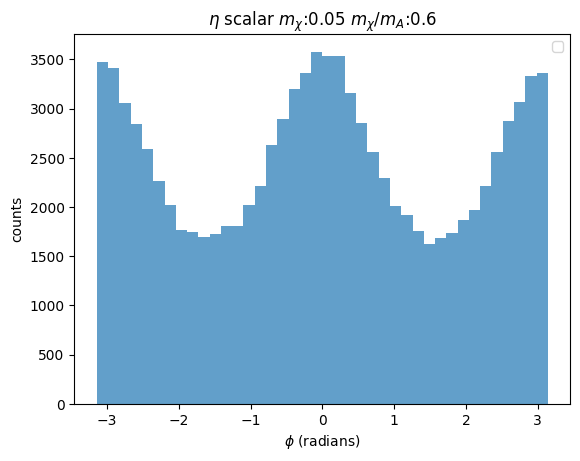

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


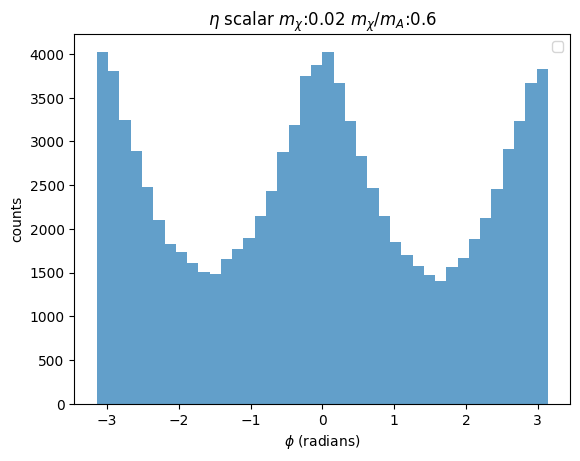

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


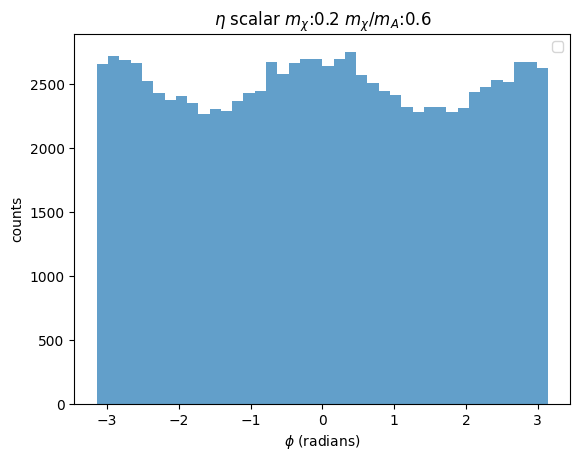

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


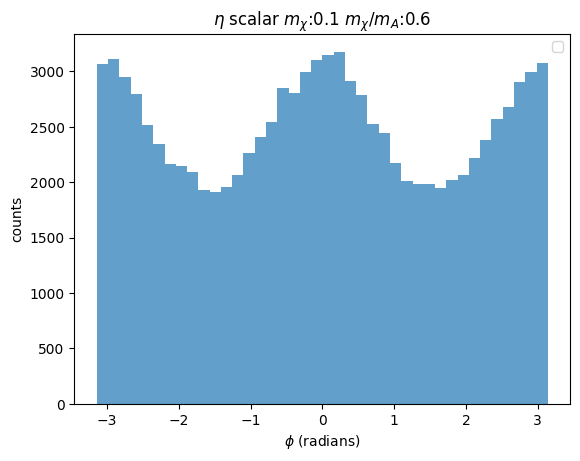

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


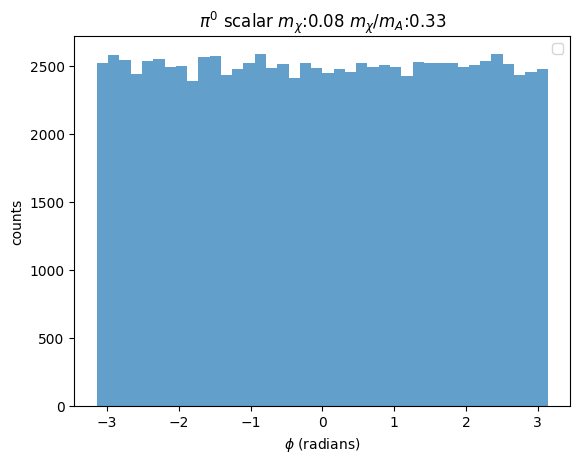

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


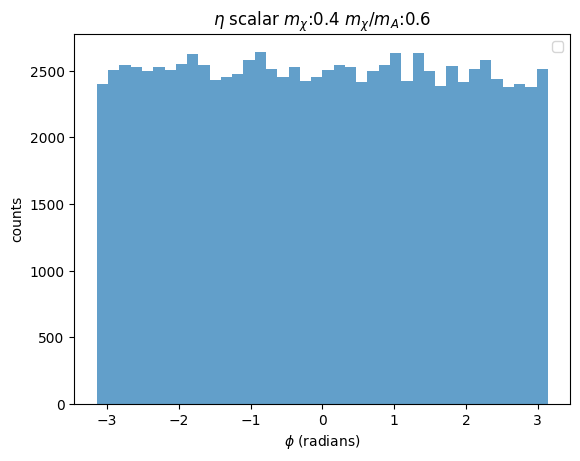

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


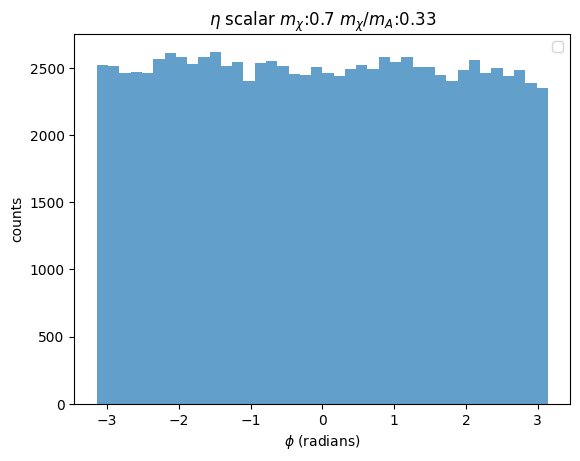

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


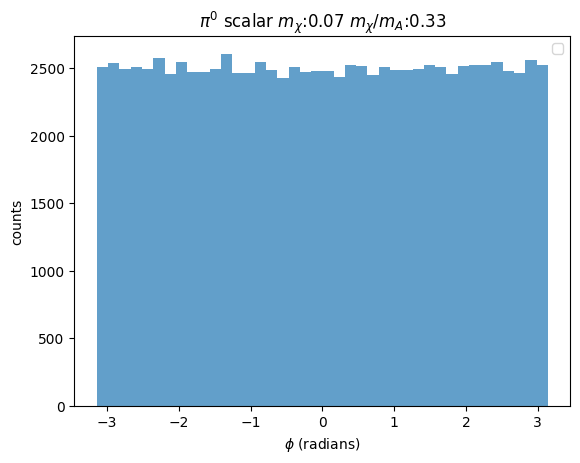

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


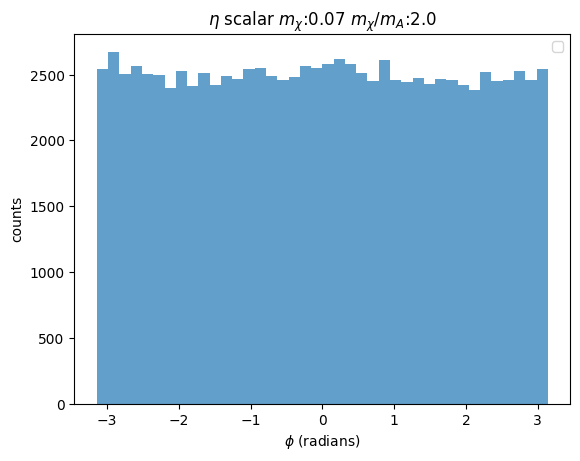

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


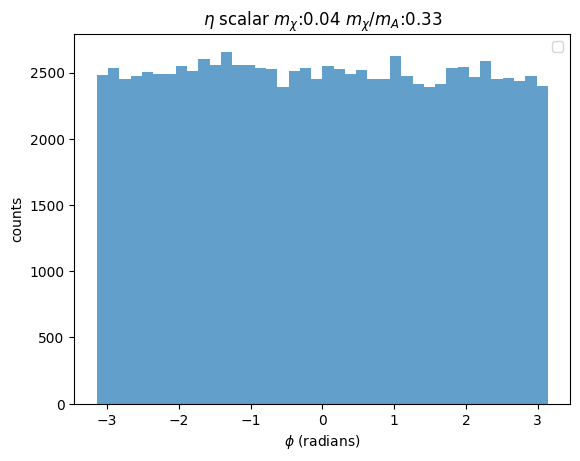

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


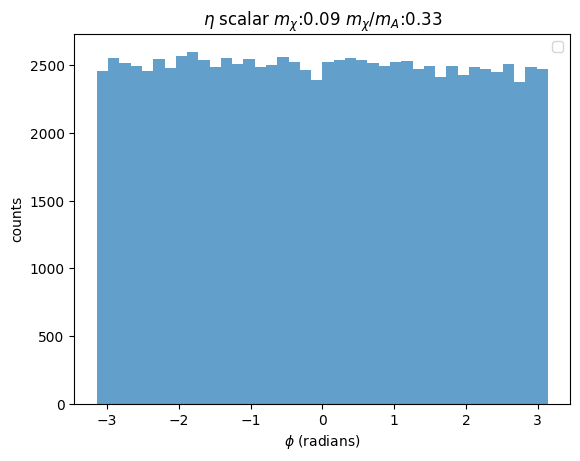

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


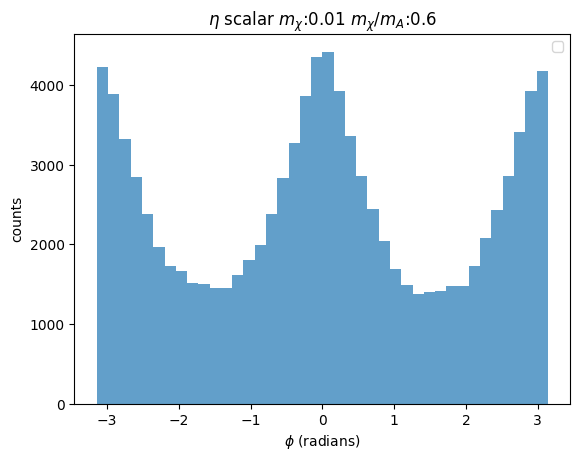

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


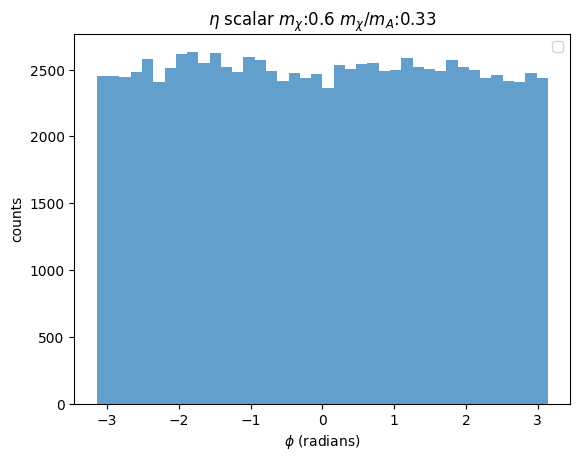

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


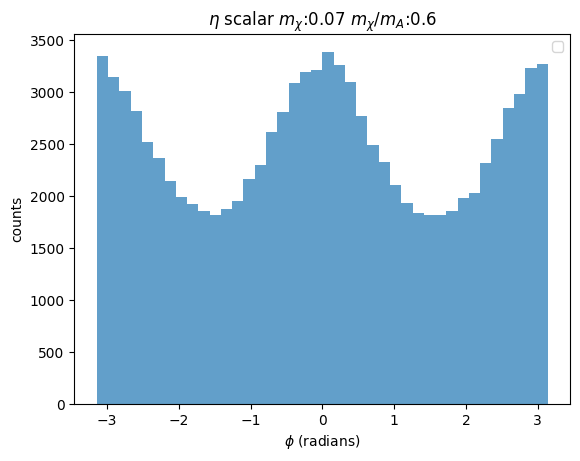

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


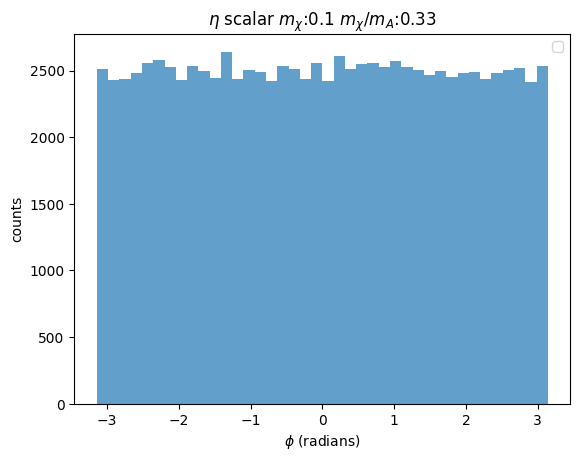

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


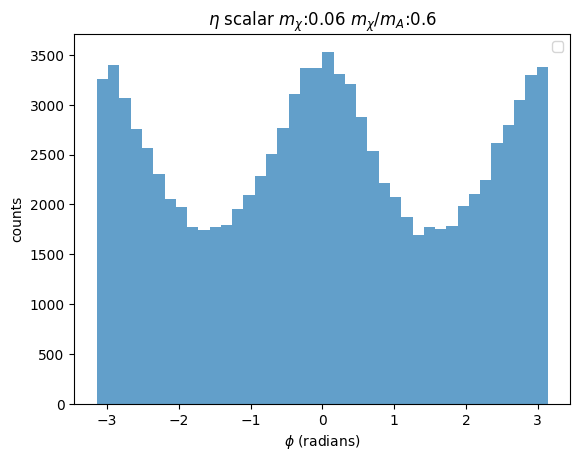

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


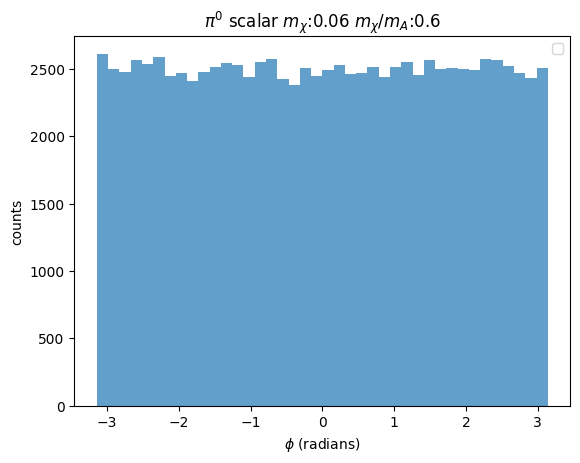

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


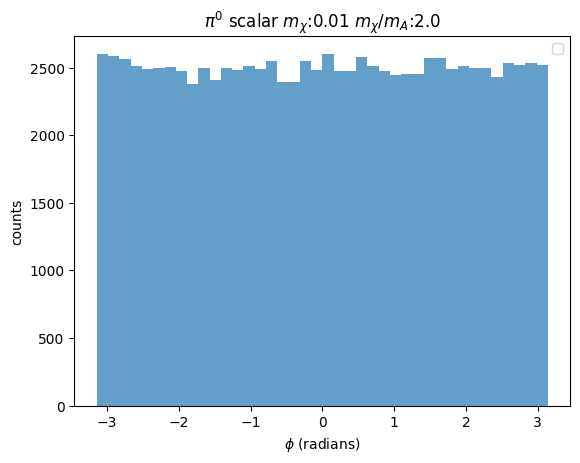

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


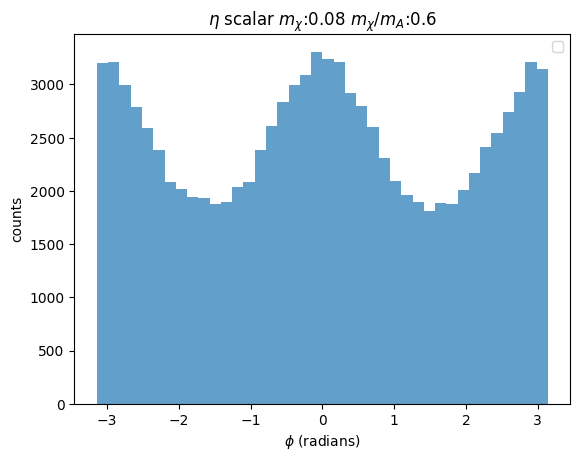

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


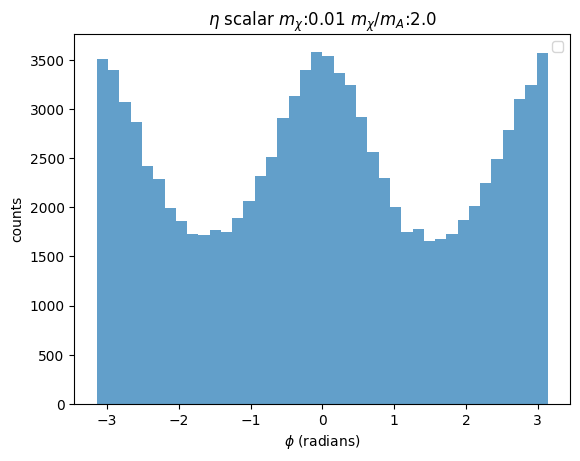

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


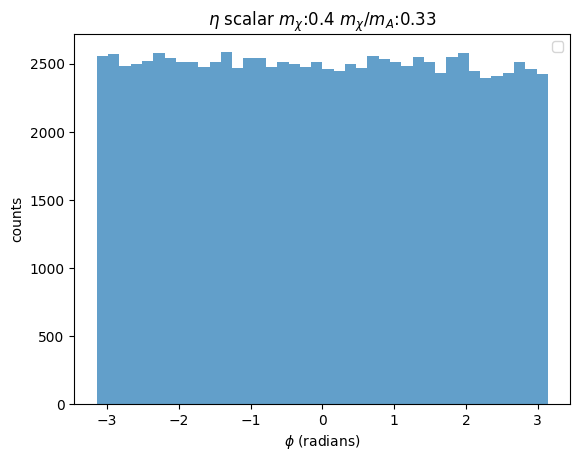

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


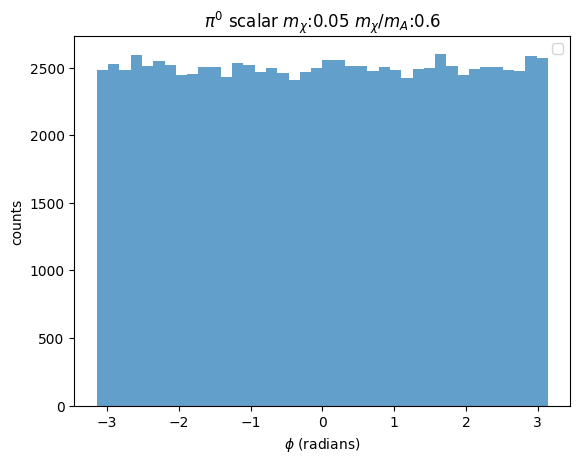

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


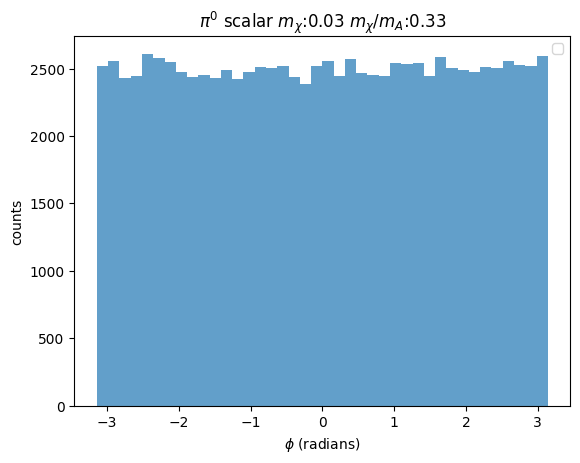

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


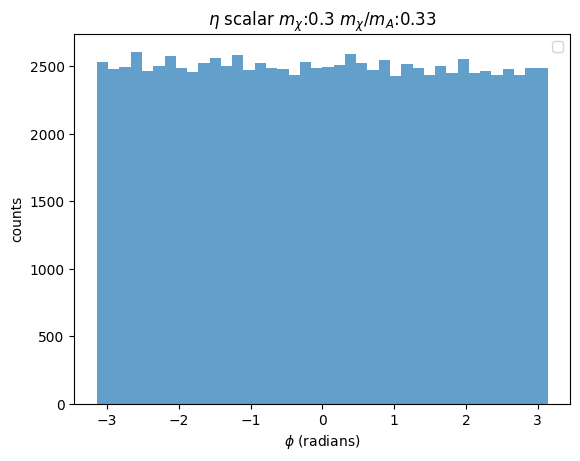

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


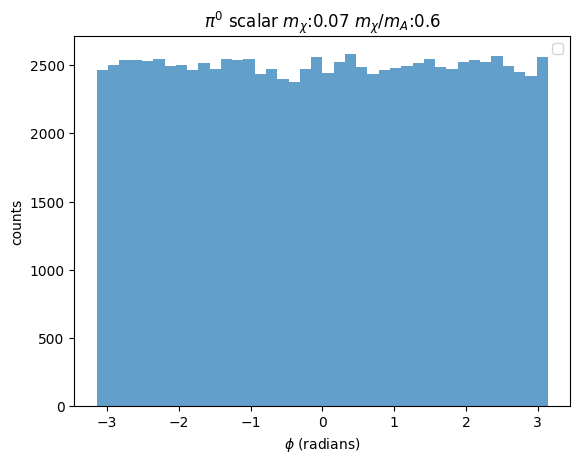

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


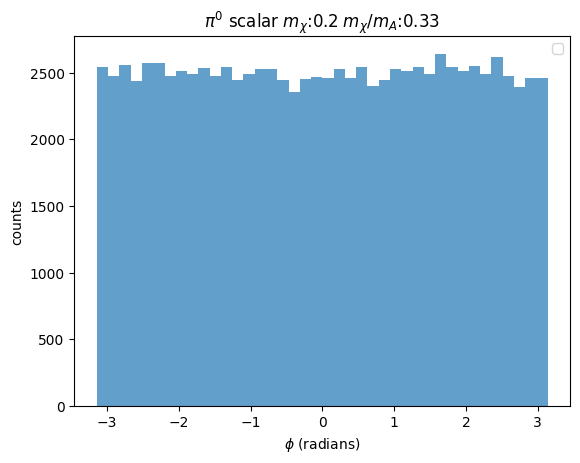

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


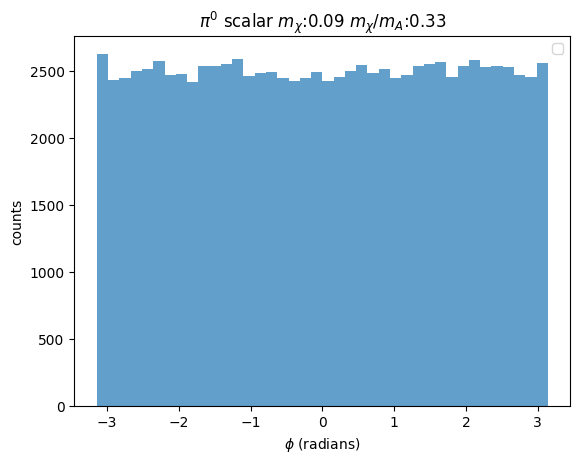

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


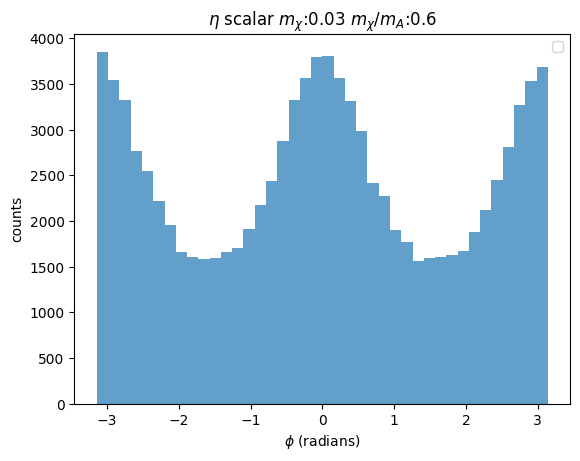

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


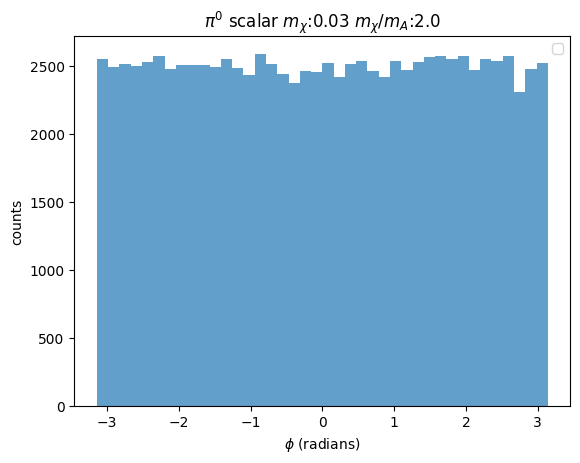

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


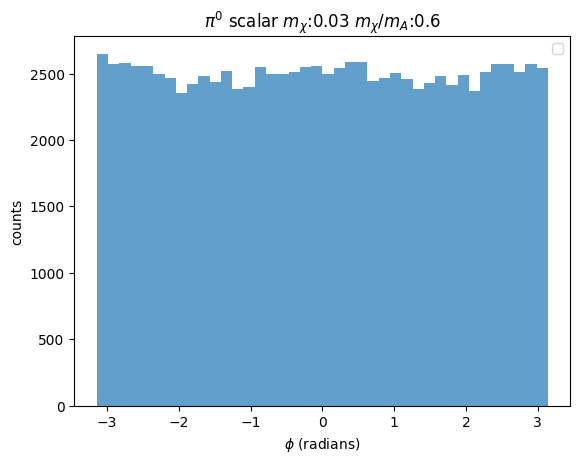

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


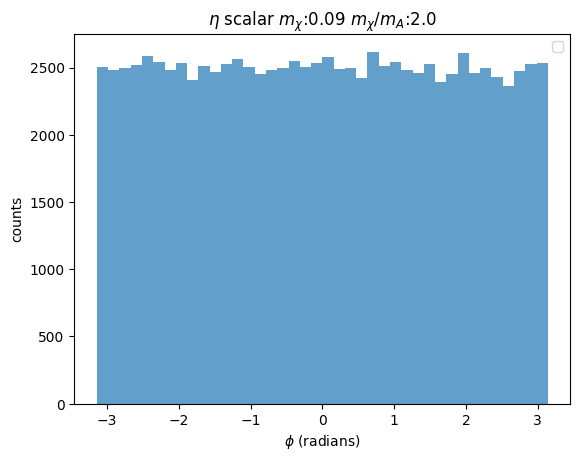

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


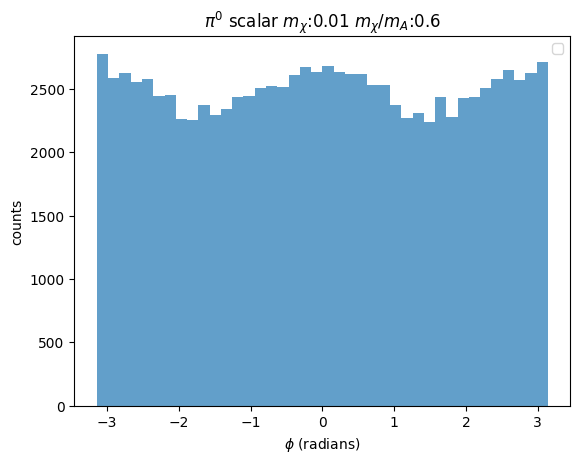

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


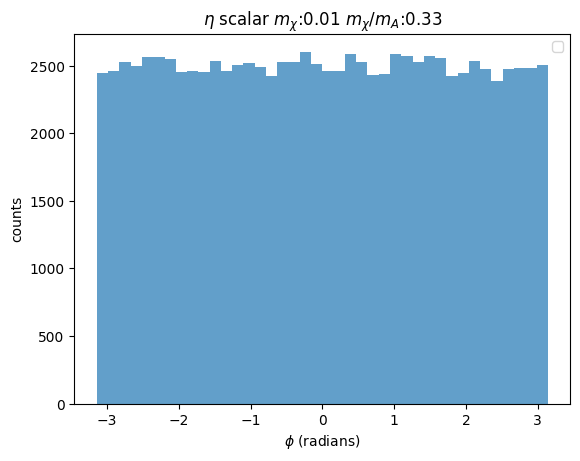

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


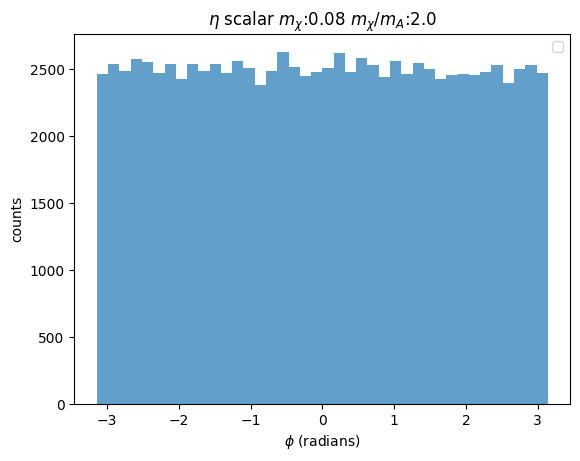

In [3]:
m_eta = 0.547862
m_pi0 = 0.1349766
dm_type = ['fermion','scalar']
flatness = []
for type in dm_type:
    path_signal = f"../data/root_files/{type}_tmp/"
    path_bkg = f"../data/root_files/angular_mesons/{type}/"
    files = os.listdir(path_signal)
    for file in files:
        signal_momentum = get_momentum(file,path_signal)
        bkg_momentum = get_momentum(file,path_bkg)
        if bkg_momentum is None:
            continue
        if signal_momentum is None:
            continue
        
        signal_momentum = cartesian_to_spherical(signal_momentum)
        bkg_momentum = cartesian_to_spherical(bkg_momentum)
        origin_type, dm_type, mass, dt_ratio = get_name_info(file)
        if origin_type == "pi0":
            meson_mass = m_pi0
        elif origin_type == "eta":
            meson_mass = m_eta
        m_a = mass/dt_ratio
        eq1 = 2*mass <= m_a
        eq2 = m_a < meson_mass
        eq3 = 2*mass >= 0.97*m_a
        all_eq = eq1 and eq2 and eq3
        
        flat_indicator = 0
        
        lines = ['p','theta','phi']
        names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
        for i in range(3):
            if lines[i] != 'phi':
                continue
            max_value = bkg_momentum[lines[i]].max()
            min_value = bkg_momentum[lines[i]].min()
            min_sig = signal_momentum[lines[i]].min()
            max_sig = signal_momentum[lines[i]].max()
            
            #plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
            counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
            plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,density=False)
            std_dev = np.std(bkg_momentum[lines[i]])
            
            if std_dev < 1.82:
                flat_indicator = 1
            else:
                flat_indicator = 0
            flatness.append([origin_type,dm_type,mass,dt_ratio,std_dev,flat_indicator])
            # Plotting vertical lines
            #plt.axvline(min_sig, color='red', linestyle='--', label='start of detector')
            #plt.axvline(max_sig, color='blue', linestyle='--', label='end of detector')
            #check if $\{name}$ is a correct variable
            if origin_type == "pi0":
                new_type = "pi^0"
            else:
                new_type = origin_type
            
            plt.title(rf"$\{new_type}$ {dm_type} $m_\chi$:{mass} $m_\chi/m_A$:{dt_ratio}")
            plt.xlabel(names[i])
            plt.ylabel('counts')
            plt.legend()
            plt.show()
            
            
        
        
    
        



In [17]:

eta_path = '../data/flux/etas.dat'
eta_mesons = []
with open(eta_path, 'r') as file:
    for line in file:
        px = float(line.split()[0])
        py = float(line.split()[1])
        pz = float(line.split()[2])
        eta_mesons.append([px,py,pz])
eta_mesons = eta_mesons[:50000]
eta_mesons = pd.DataFrame(eta_mesons,columns=['px','py','pz'])

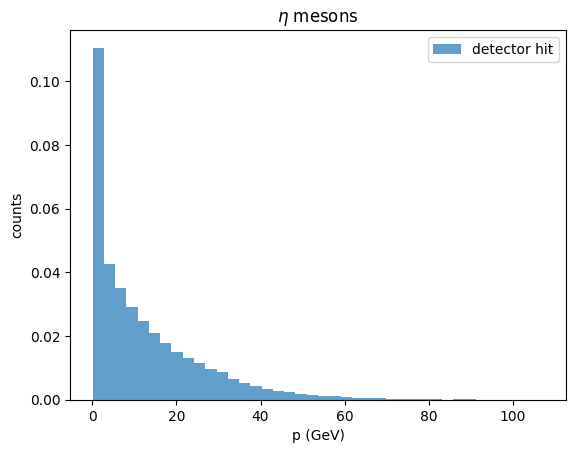

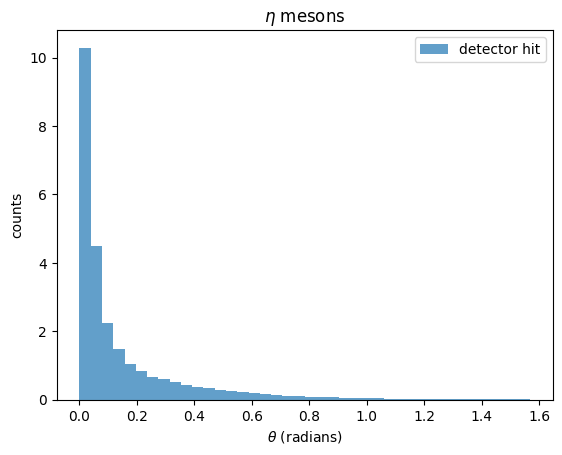

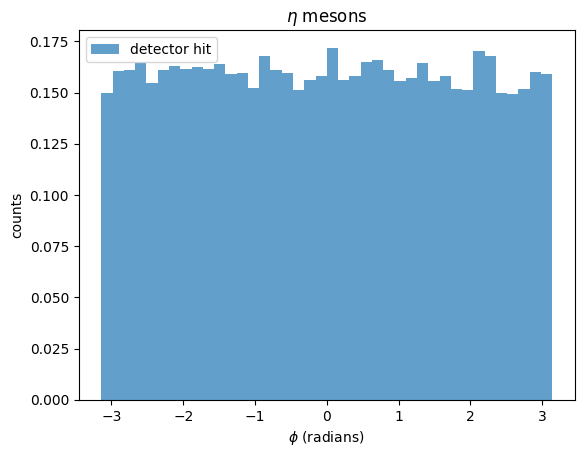

In [24]:
eta_mesons_momentum = cartesian_to_spherical(eta_mesons)
lines = ['p','theta','phi']
names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
for i in range(3):
    max_value = eta_mesons_momentum[lines[i]].max()
    min_value = eta_mesons_momentum[lines[i]].min()
    plt.hist(eta_mesons_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
    plt.title(rf"$\eta$ mesons")
    plt.xlabel(names[i])
    plt.ylabel('counts')
    plt.legend()
    plt.show()

In [20]:
pi0_path = '../data/flux/pi0s.dat'
pi0_mesons = []
with open(pi0_path, 'r') as file:
    for line in file:
        px = float(line.split()[0])
        py = float(line.split()[1])
        pz = float(line.split()[2])
        pi0_mesons.append([px,py,pz])
pi0_mesons = pi0_mesons[:50000]
pi0_mesons = pd.DataFrame(pi0_mesons,columns=['px','py','pz'])

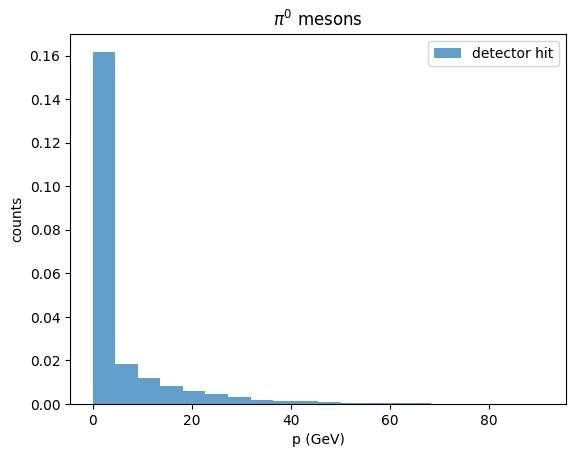

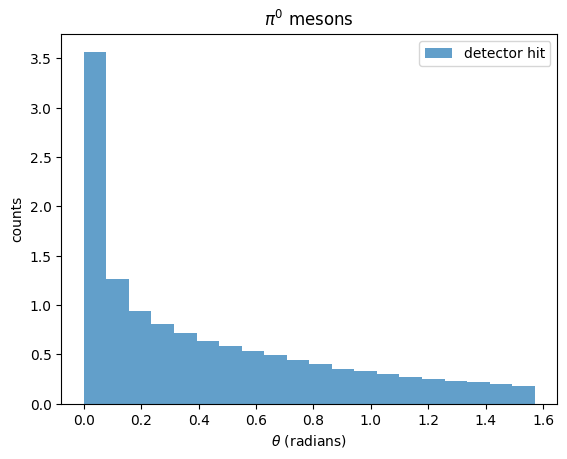

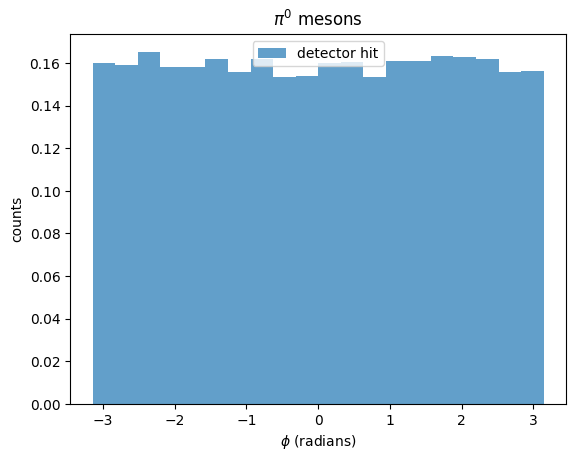

In [22]:
pi0_mesons_momentum = cartesian_to_spherical(pi0_mesons)
lines = ['p','theta','phi']
names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
for i in range(3):
    max_value = pi0_mesons_momentum[lines[i]].max()
    min_value = pi0_mesons_momentum[lines[i]].min()
    plt.hist(pi0_mesons_momentum[lines[i]],bins=20,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
    plt.title(rf"$\pi^0$ mesons")
    plt.xlabel(names[i])
    plt.ylabel('counts')
    plt.legend()
    plt.show()

In [112]:
test = spherical_to_cartesian(pi0_mesons_momentum)
print(abs(test-pi0_mesons).max())

px    4.510361e-11
py    3.908233e-11
pz    8.881784e-16
dtype: float64


In [8]:
flatness_df = pd.DataFrame(flatness,columns=['origin','dm_type','mass','dt_ratio','std_dev','flatness'])

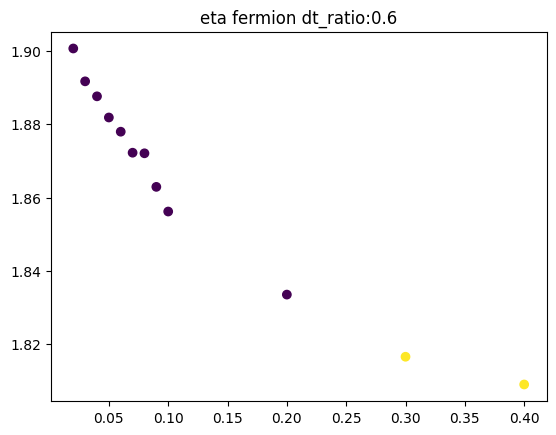

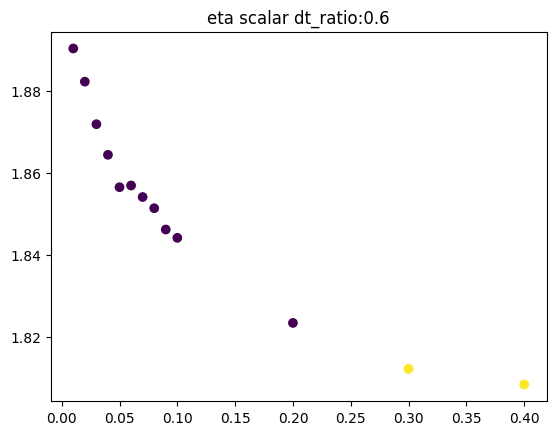

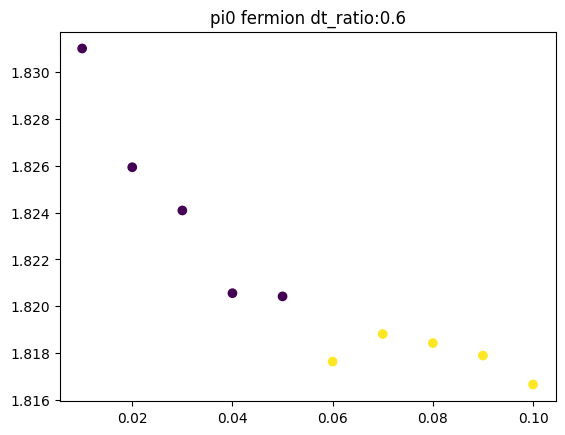

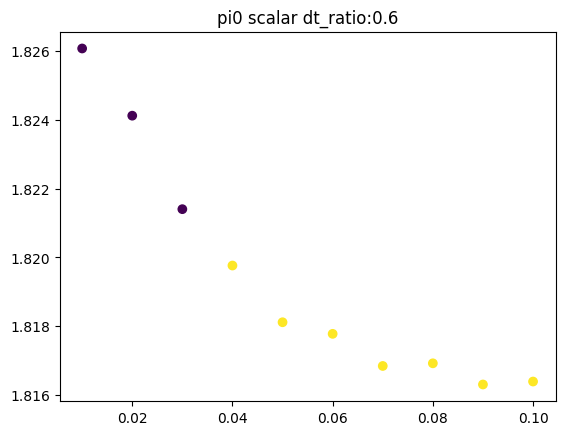

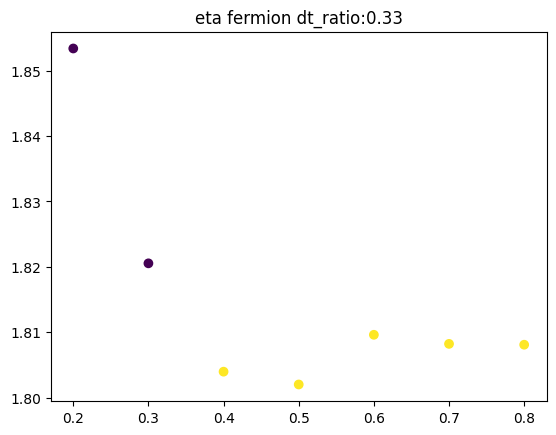

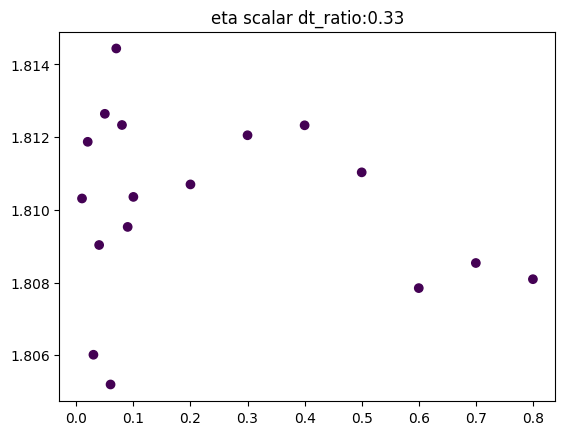

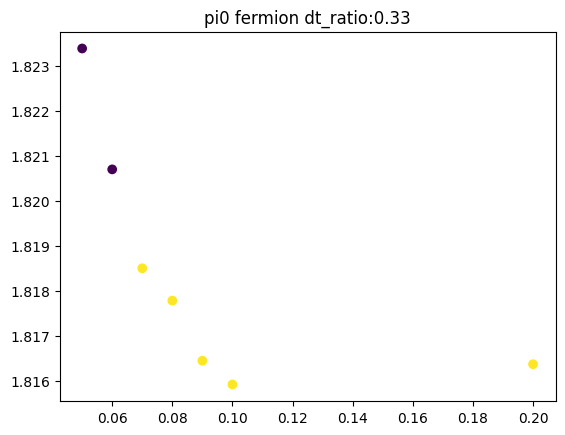

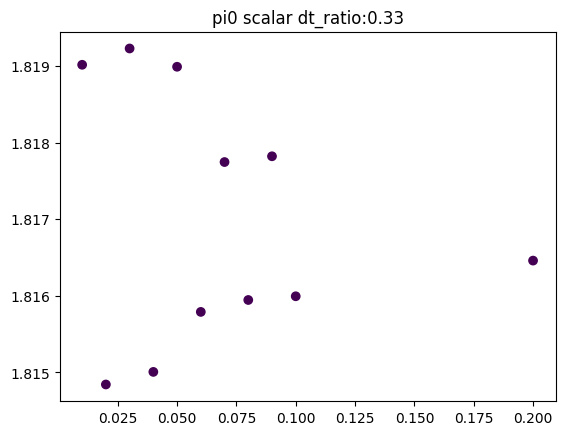

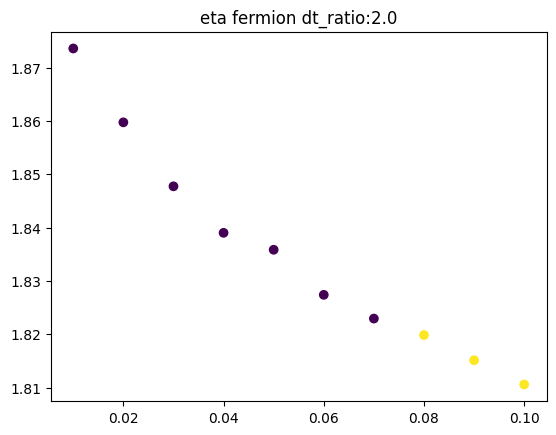

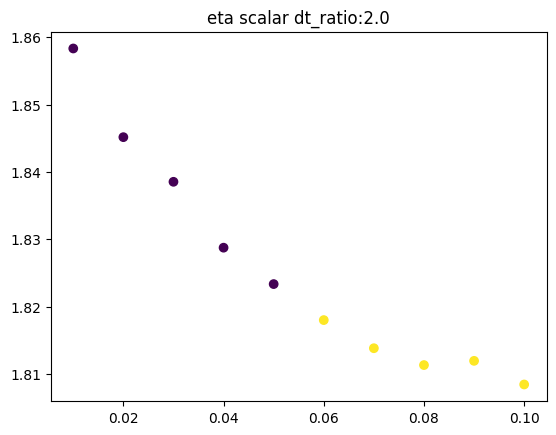

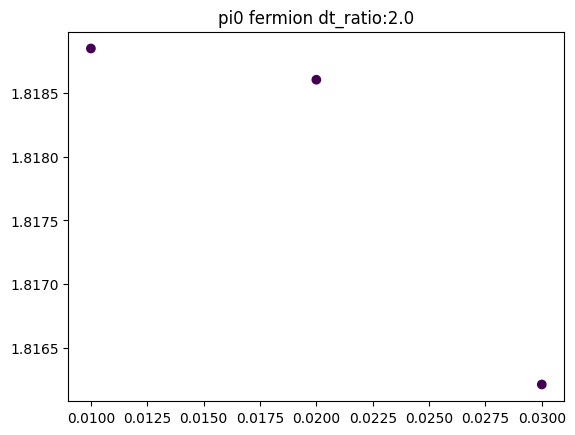

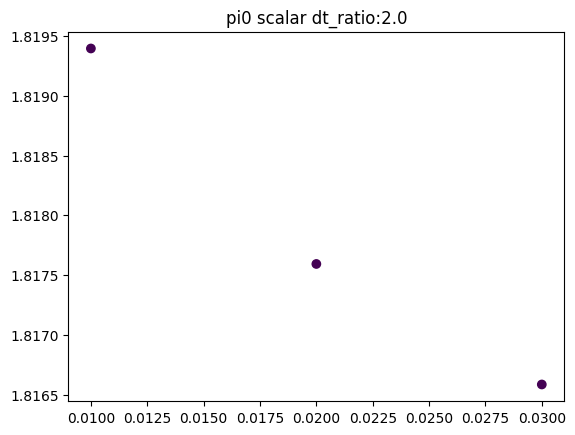

In [13]:
flatness_df
for dt_ratio in flatness_df['dt_ratio'].unique():
    for origin_type in flatness_df['origin'].unique():
        for dm_type in flatness_df['dm_type'].unique():
            plt.figure()
            plot_df = flatness_df[(flatness_df['dt_ratio'] == dt_ratio) & (flatness_df['origin'] == origin_type) & (flatness_df['dm_type'] == dm_type)]
            plt.scatter(plot_df['mass'],plot_df['std_dev'],c=plot_df['flatness'])
            plt.title(f"{origin_type} {dm_type} dt_ratio:{dt_ratio}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


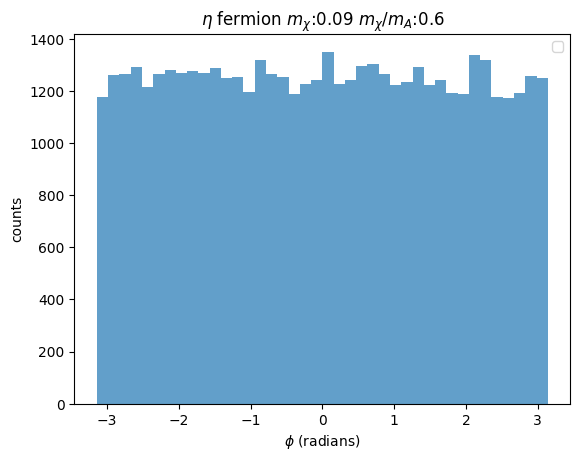

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


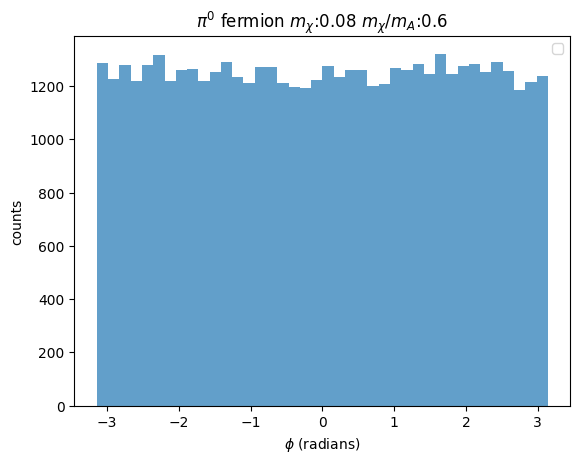

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


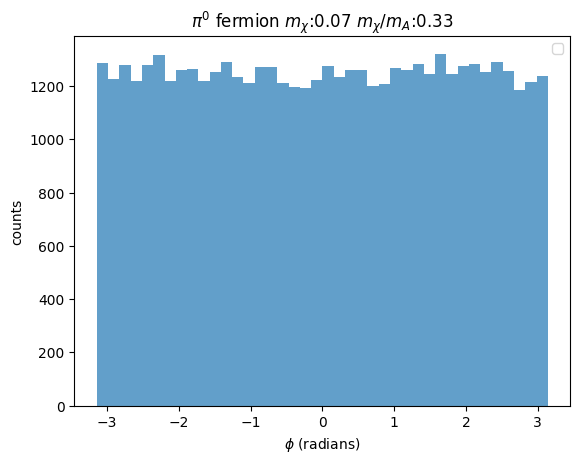

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


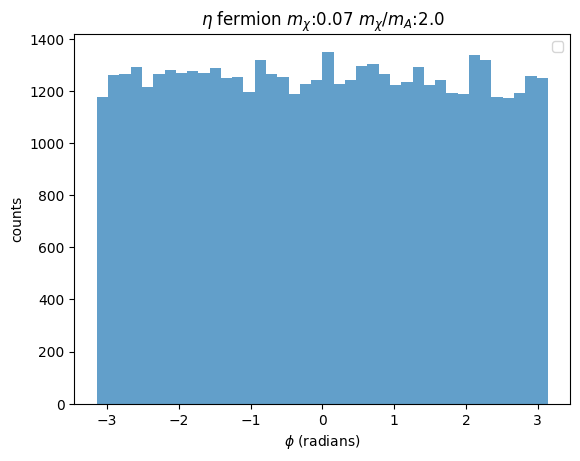

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


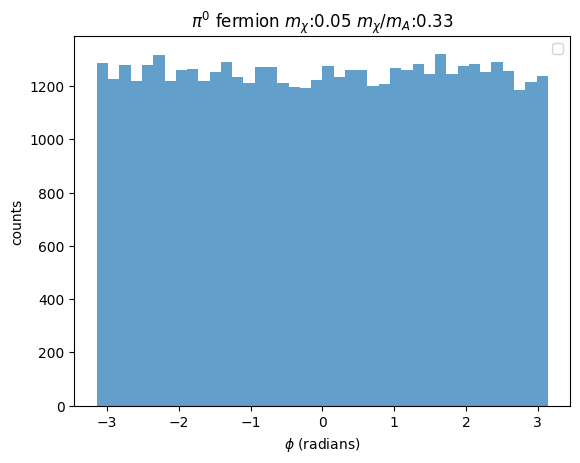

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


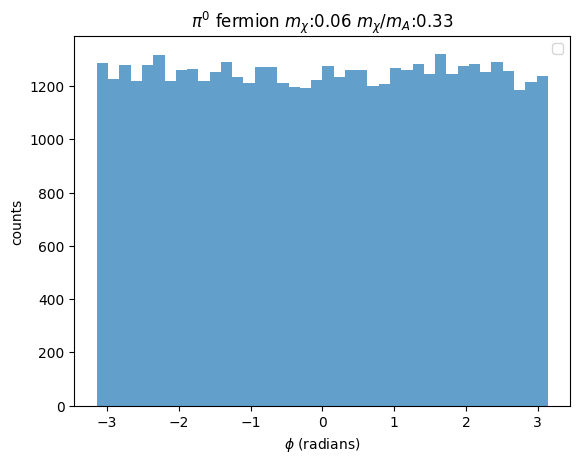

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


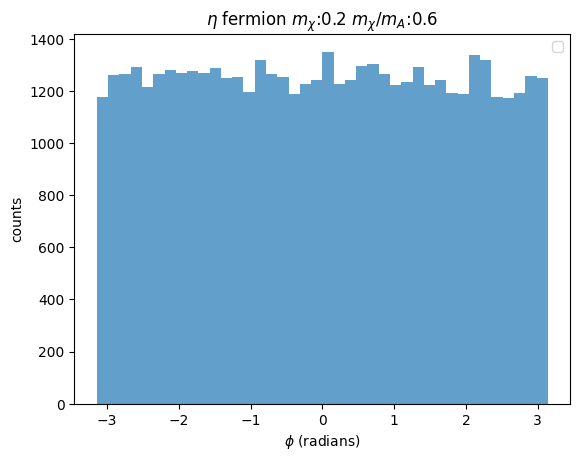

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


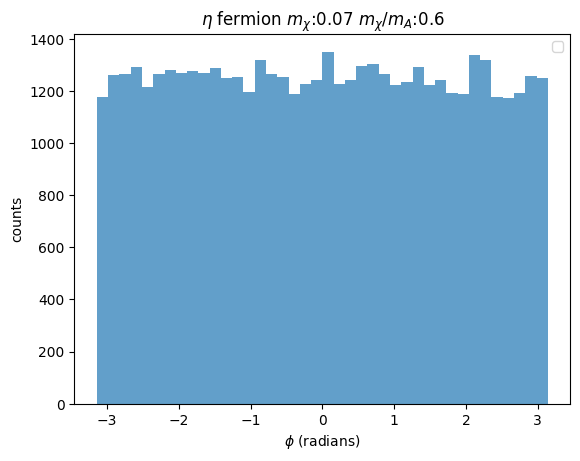

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


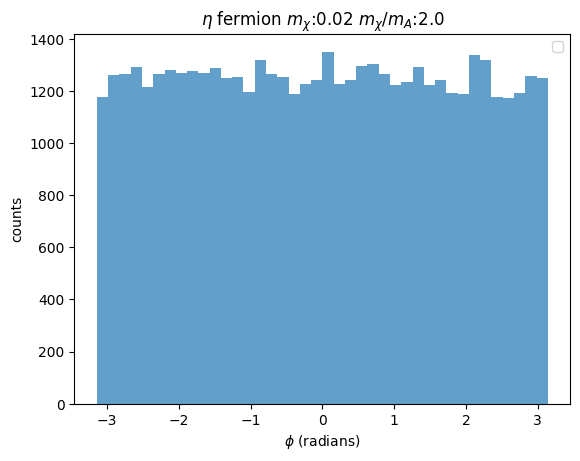

no keys for pi0_fermion_ma_0.03_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


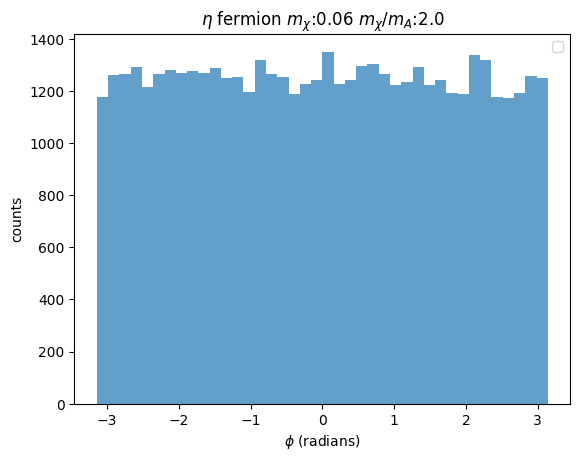

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


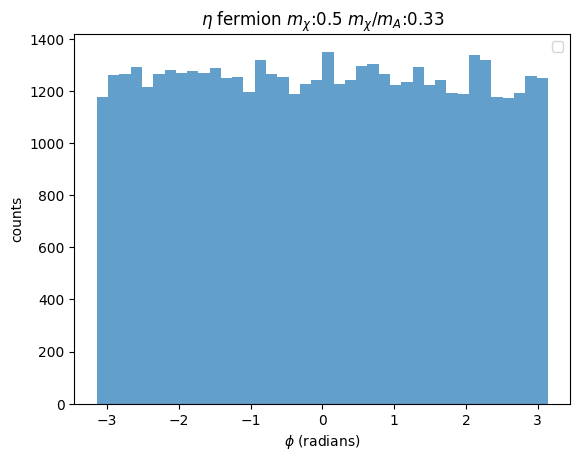

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


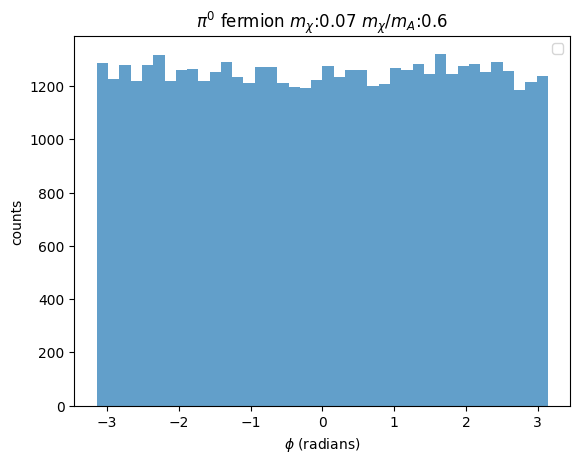

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


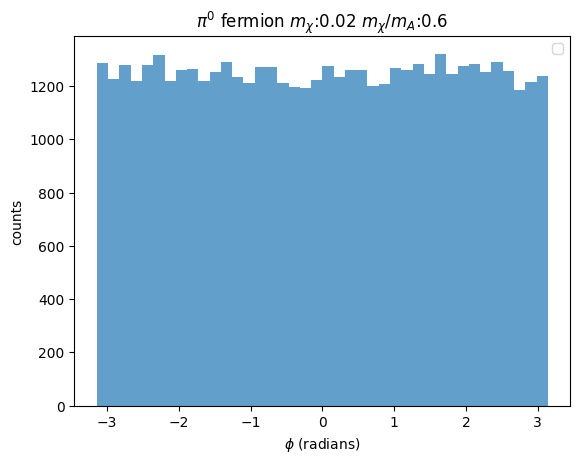

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


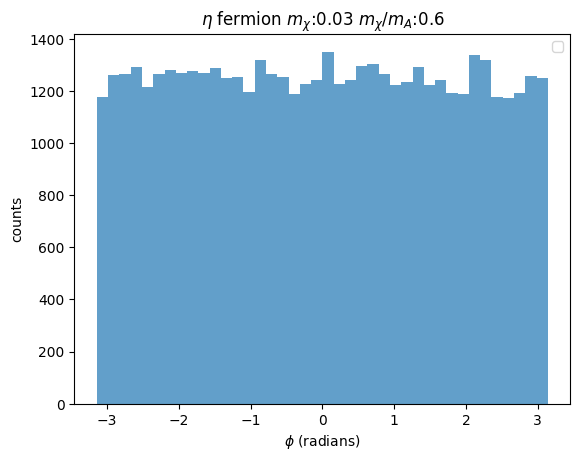

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


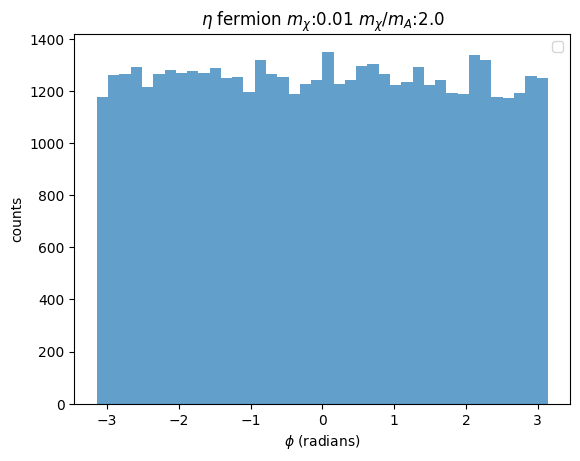

no keys for eta_fermion_ma_0.1_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


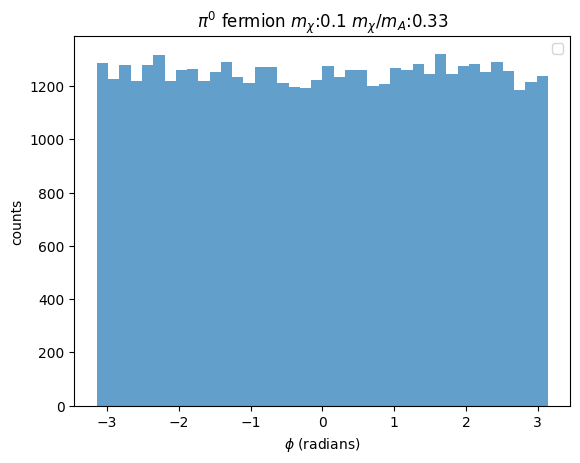

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


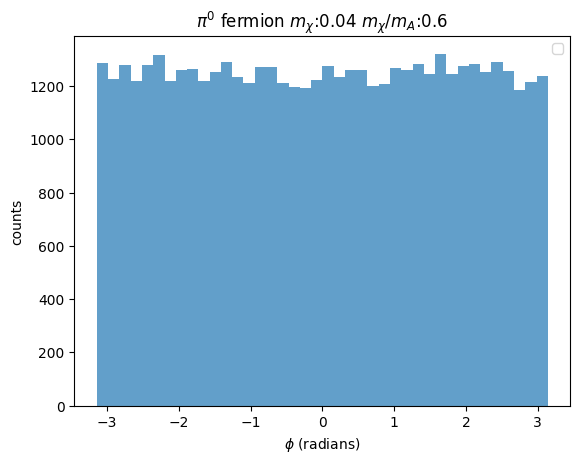

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


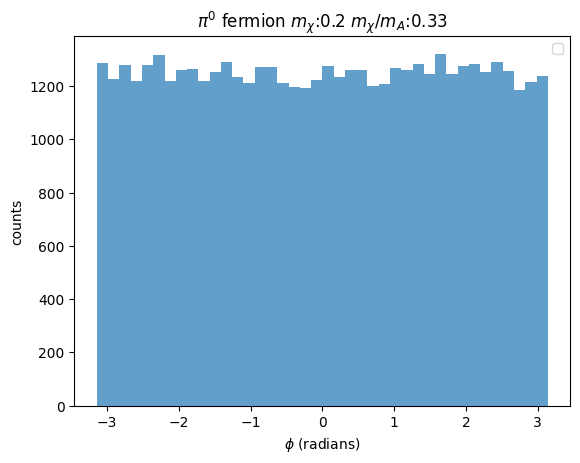

no keys for eta_fermion_ma_0.07_dt_0.33.root
no keys for eta_fermion_ma_0.04_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


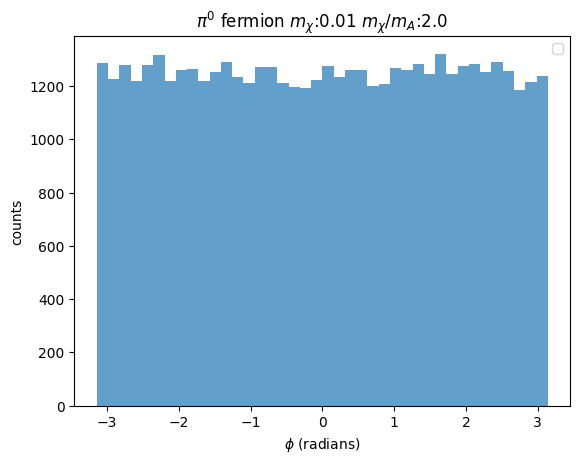

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


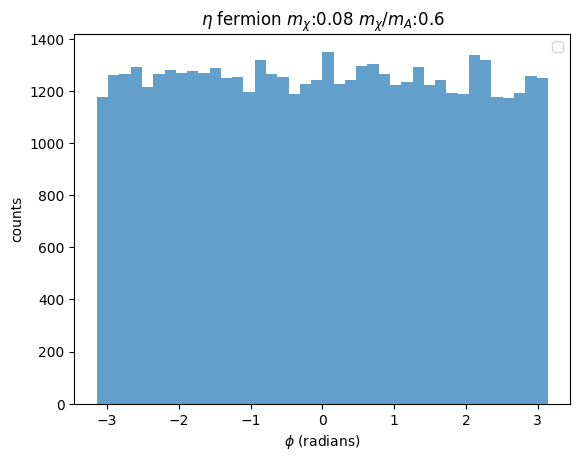

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


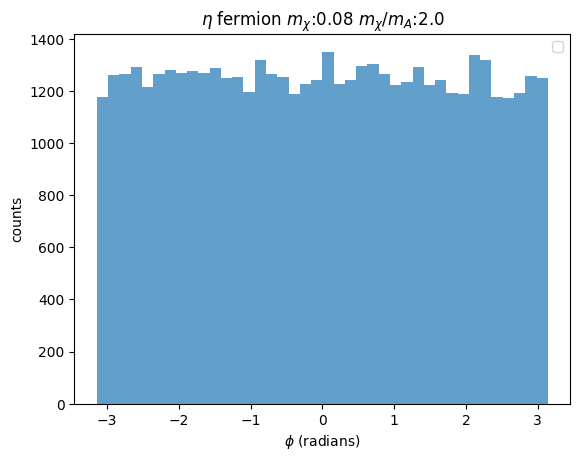

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.09_dt_0.33.root


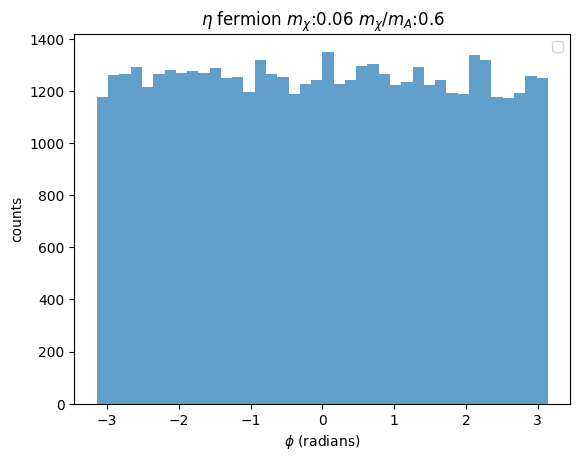

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


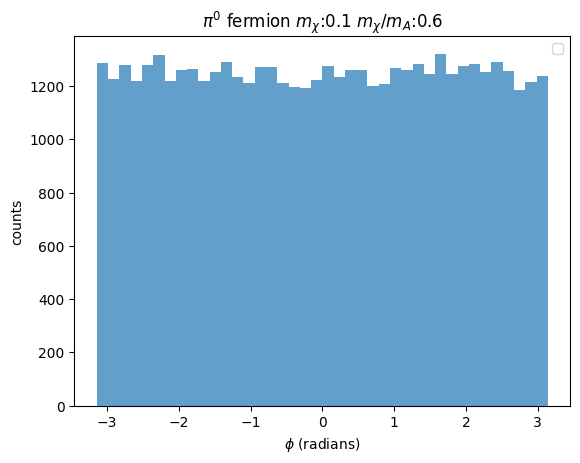

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


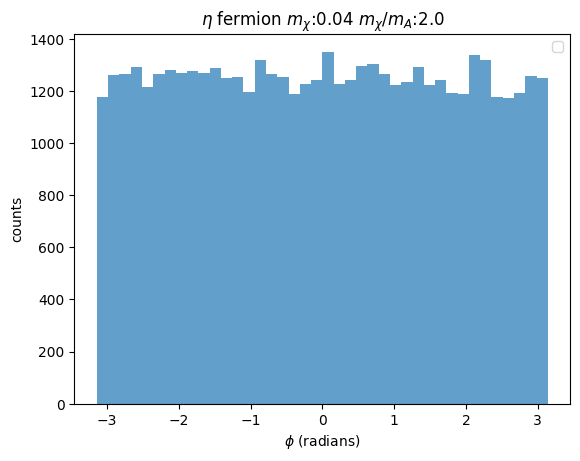

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


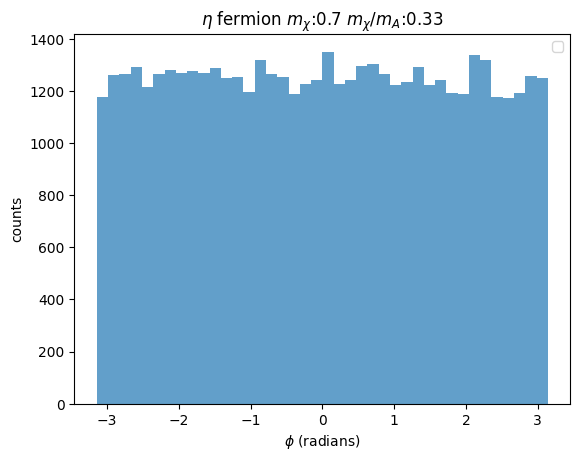

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


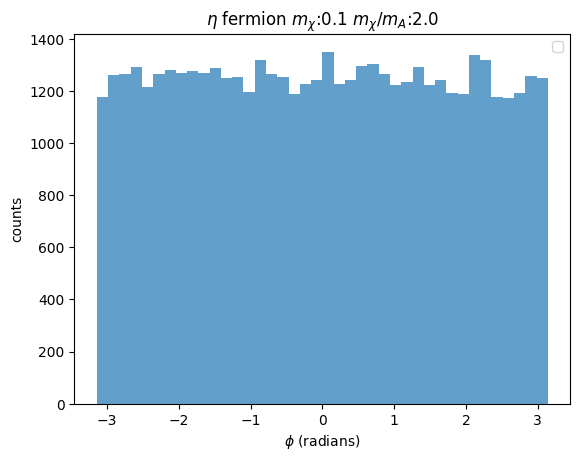

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


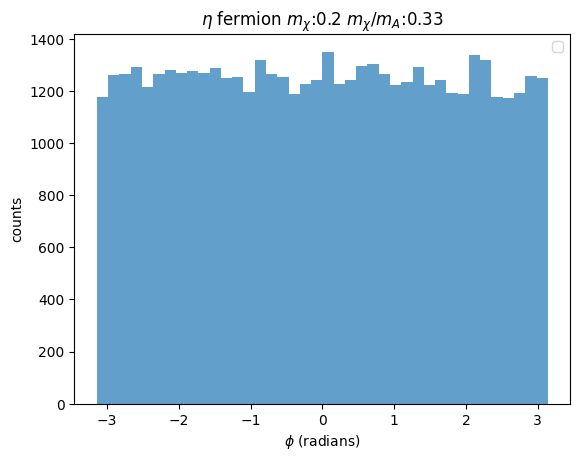

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


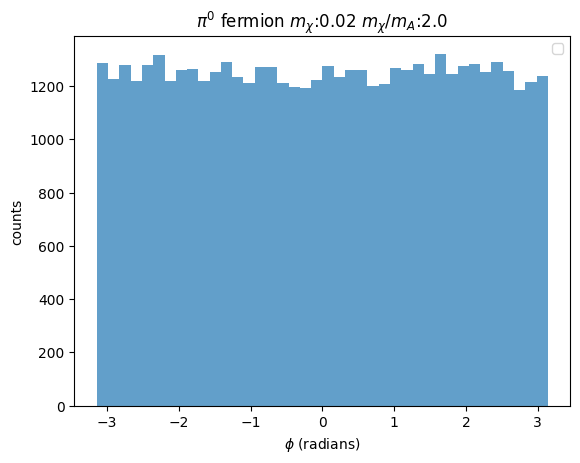

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


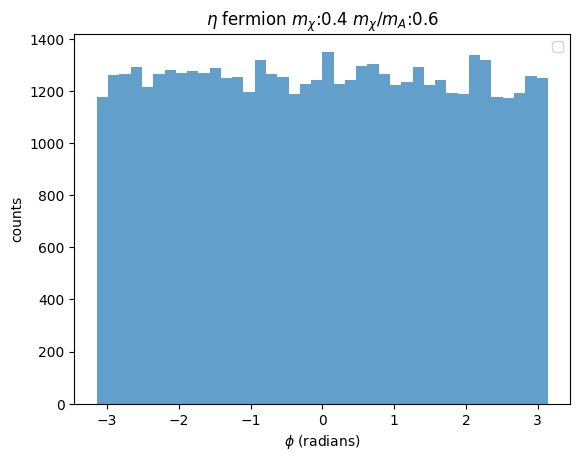

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


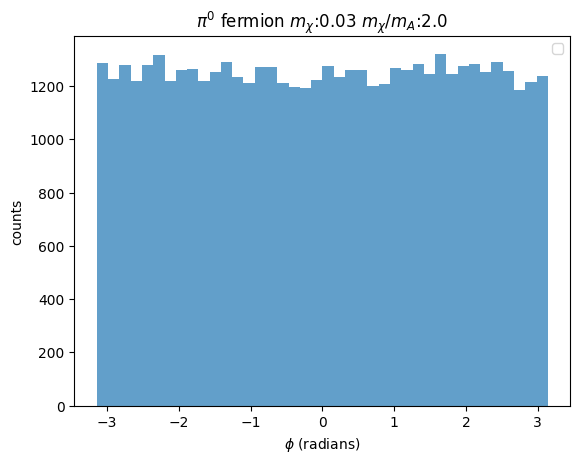

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


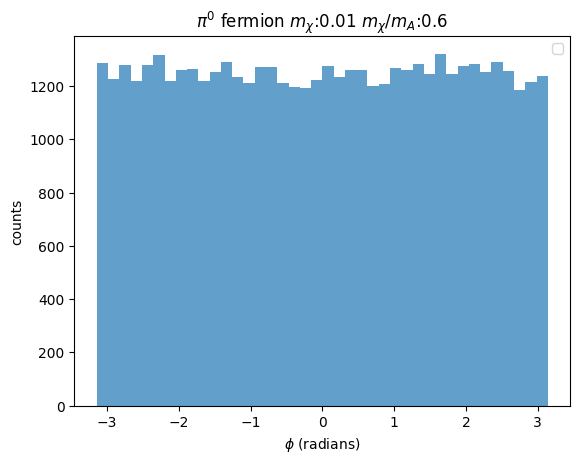

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


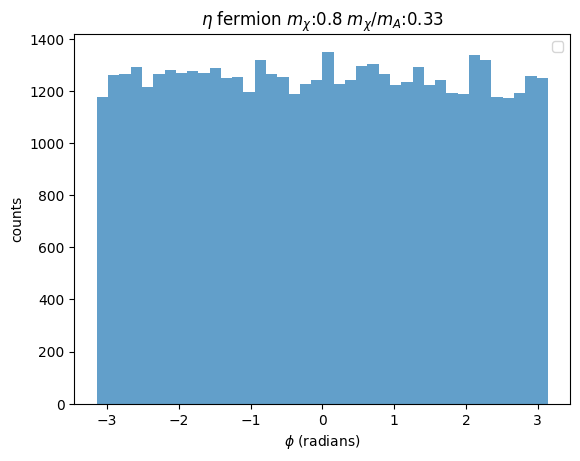

no keys for pi0_fermion_ma_0.02_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


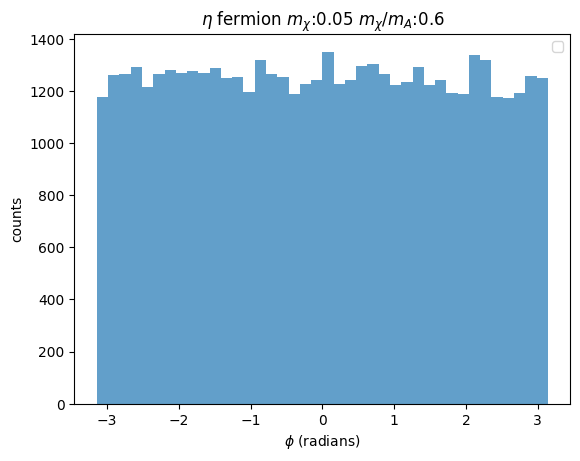

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


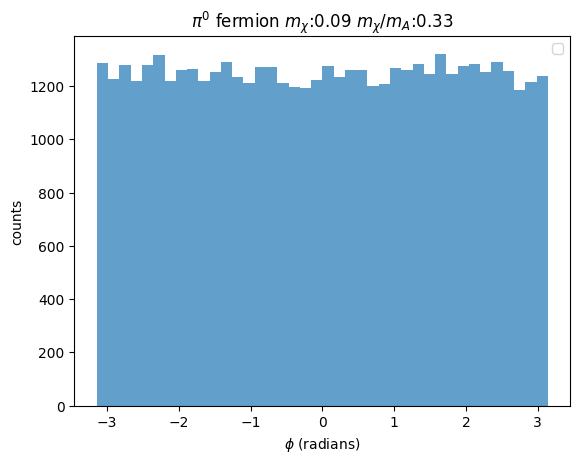

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


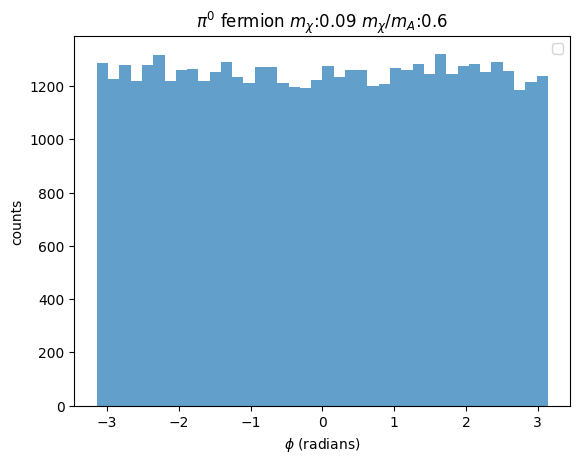

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


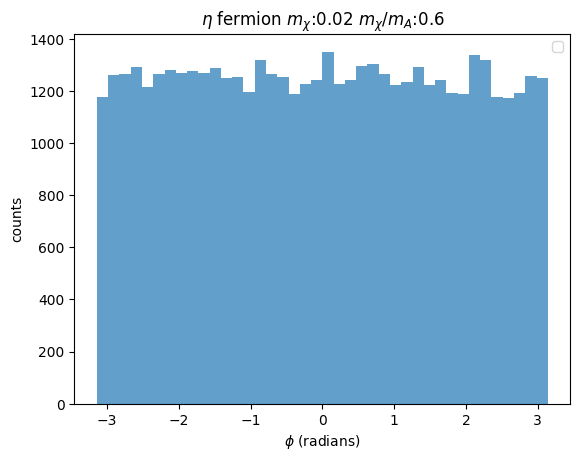

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.01_dt_0.6.root


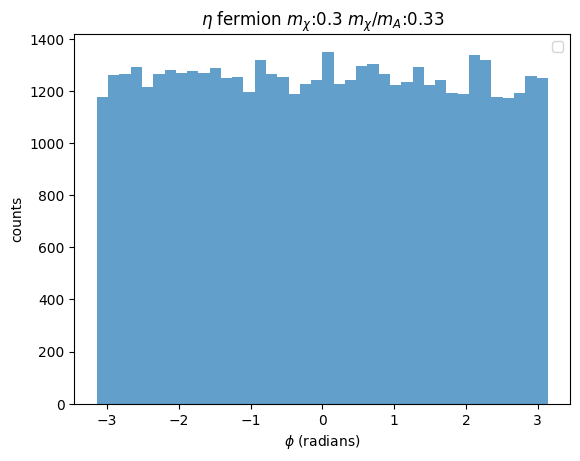

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


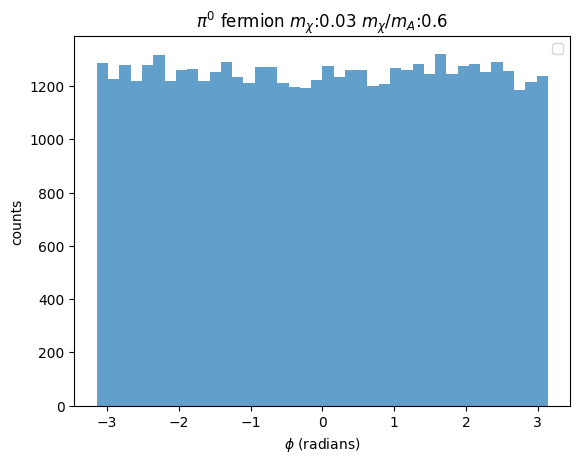

no keys for pi0_fermion_ma_0.04_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


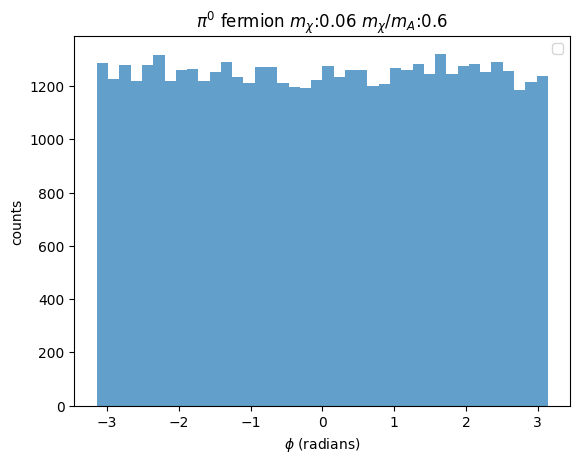

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


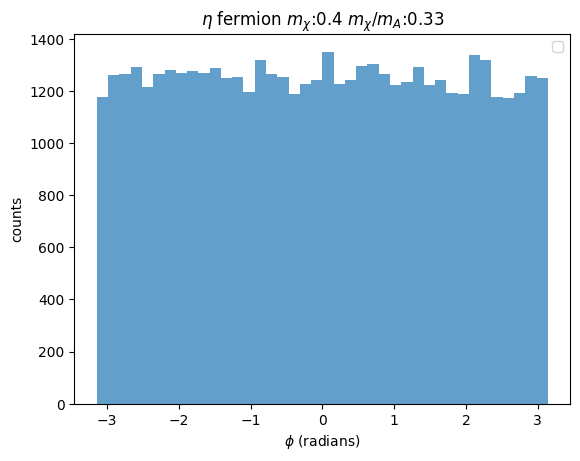

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


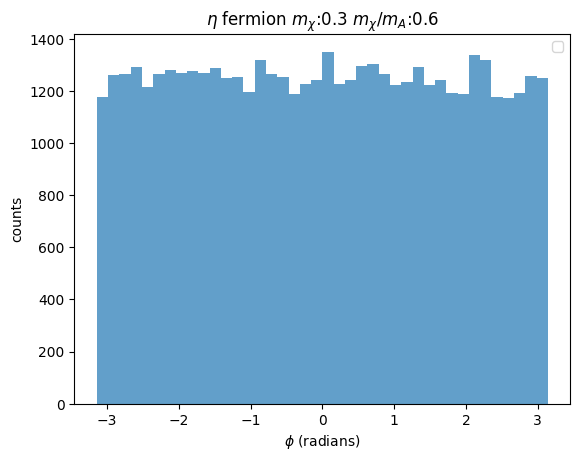

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


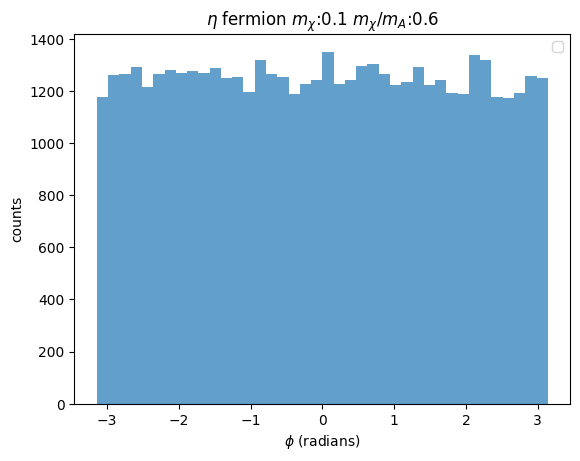

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.02_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root


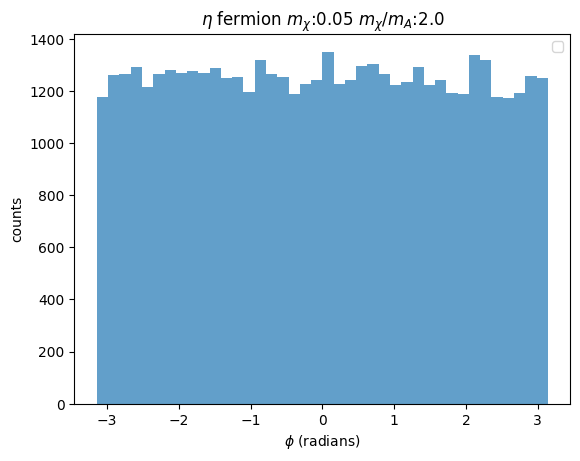

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


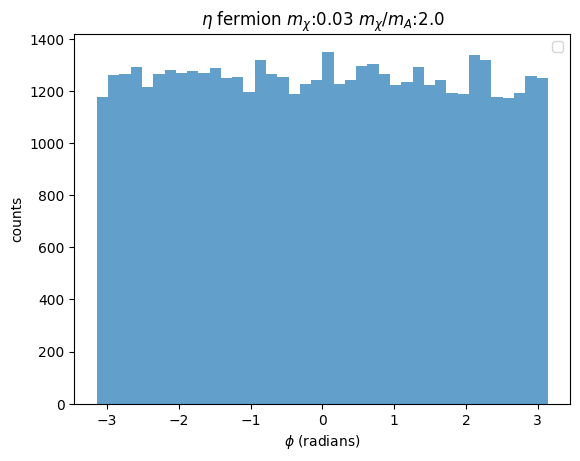

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


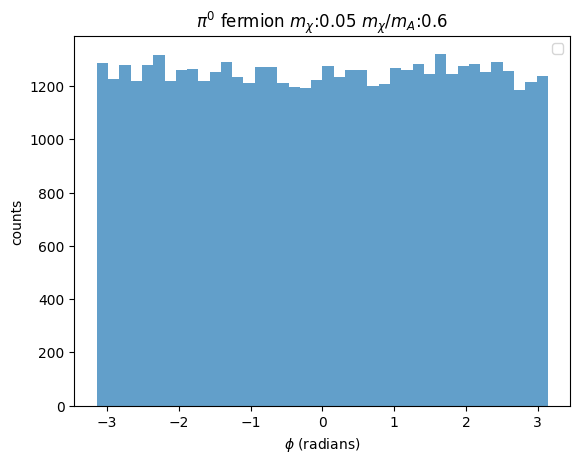

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


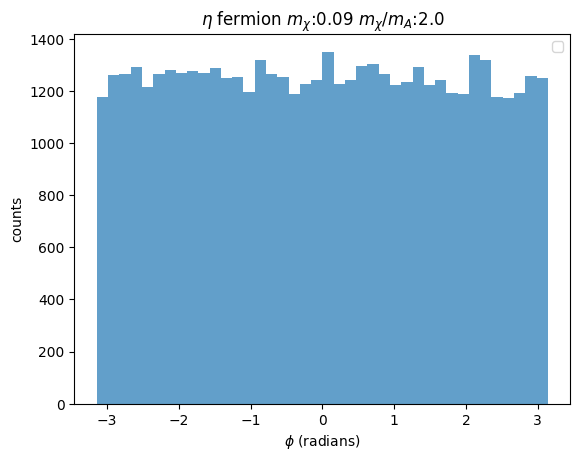

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


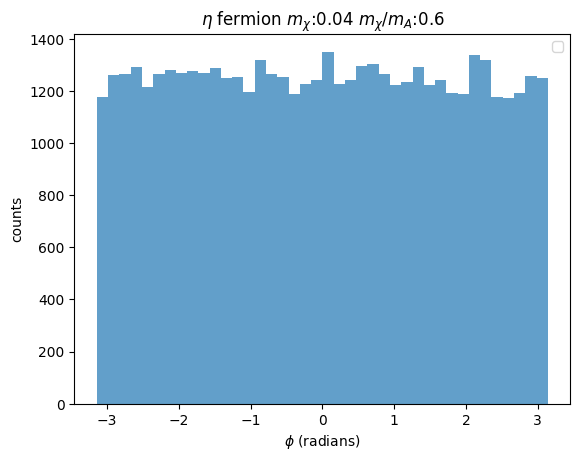

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.08_dt_0.33.root
no keys for eta_fermion_ma_0.06_dt_0.33.root


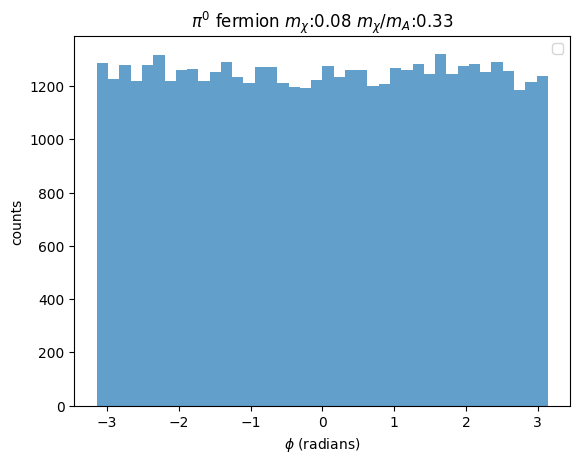

no keys for eta_fermion_ma_0.05_dt_0.33.root
no keys for eta_fermion_ma_0.03_dt_0.33.root
no keys for pi0_fermion_ma_0.01_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


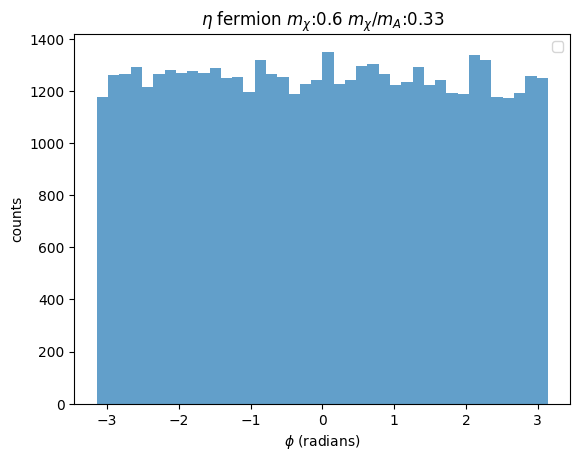

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


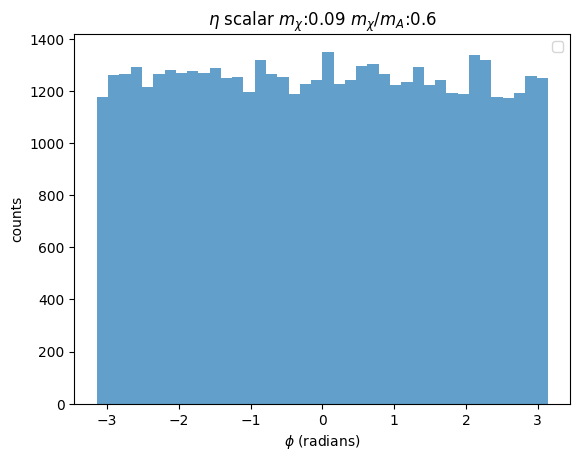

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


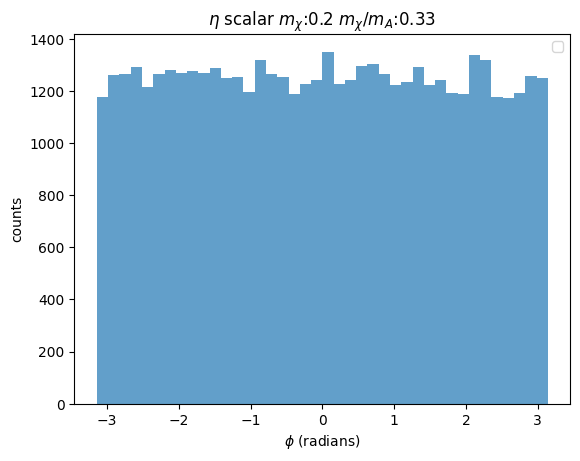

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


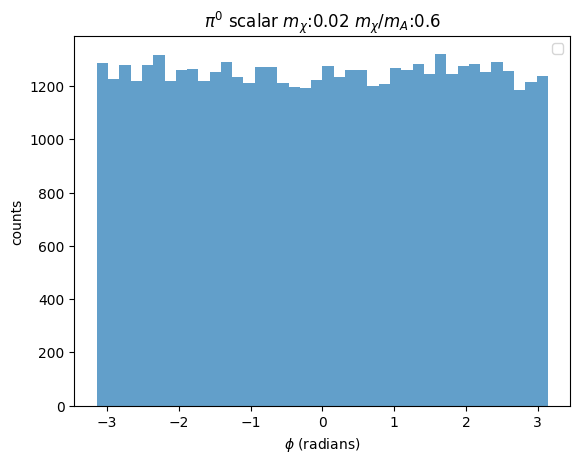

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


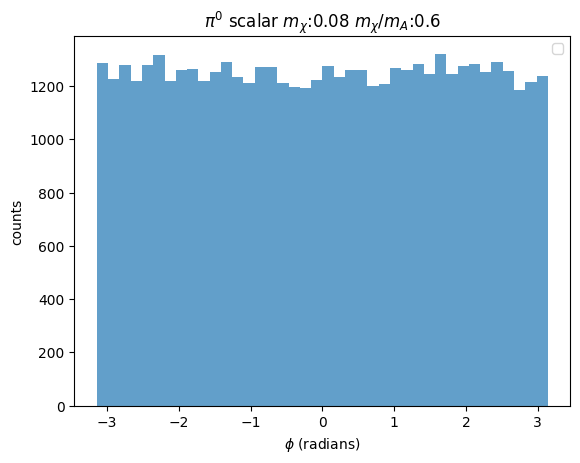

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


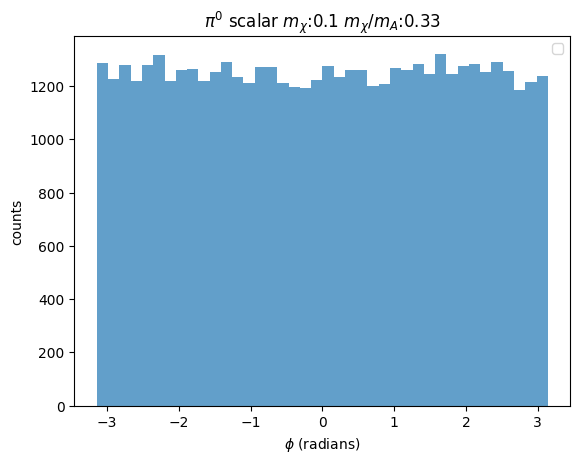

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


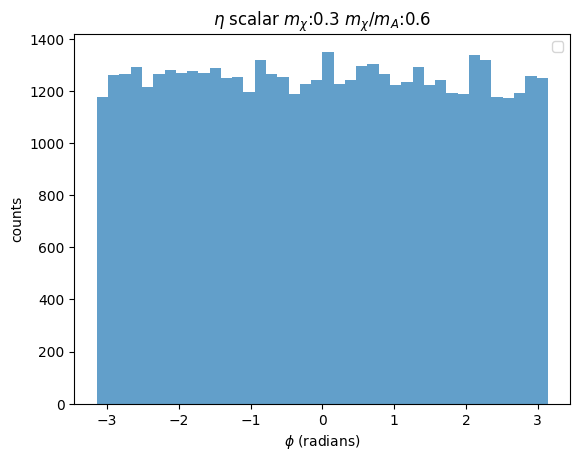

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


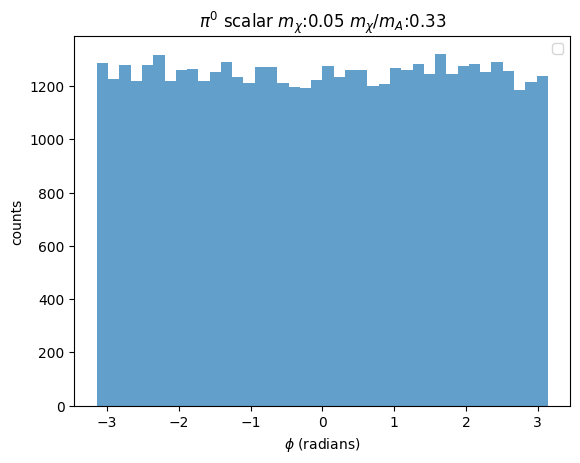

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


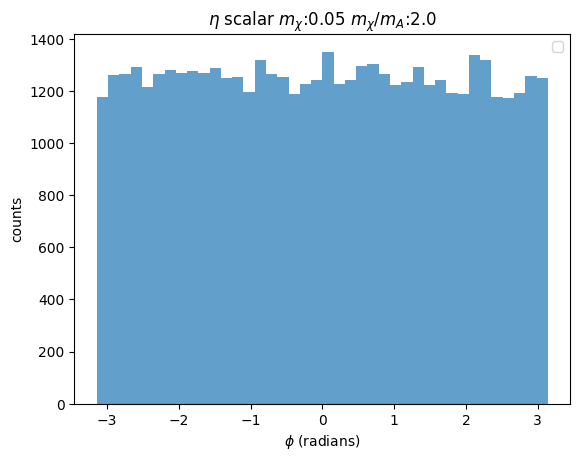

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


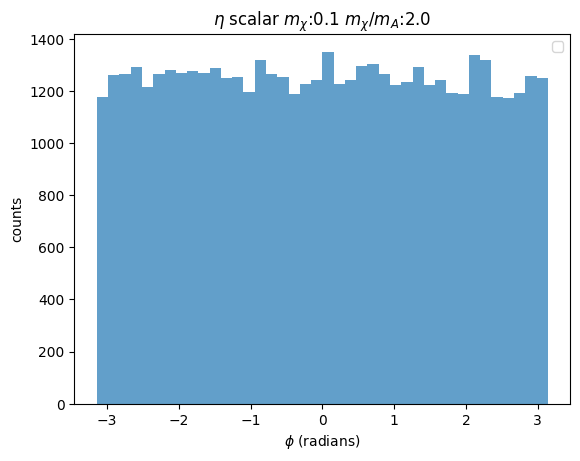

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


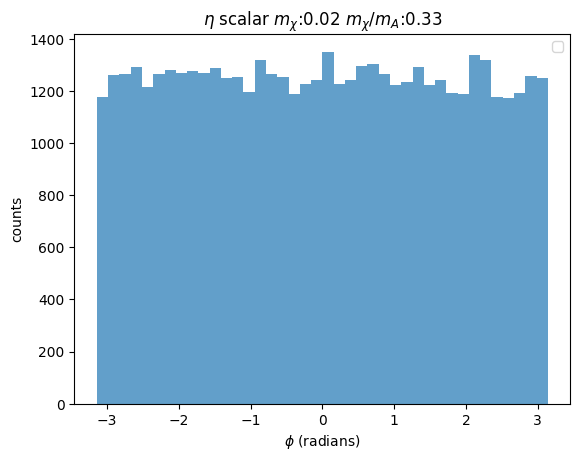

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


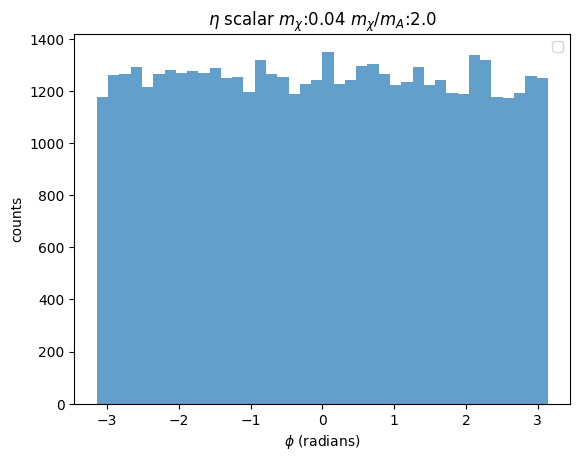

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


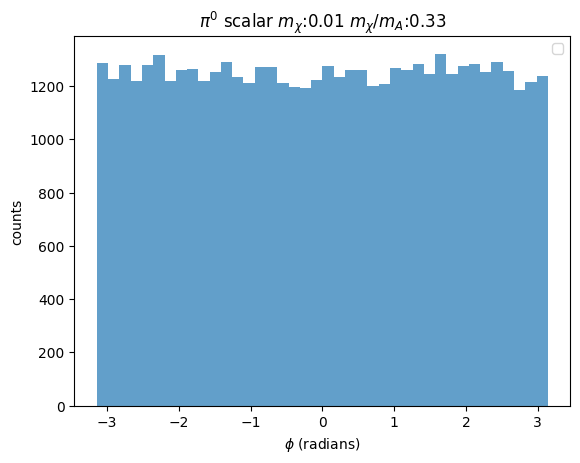

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


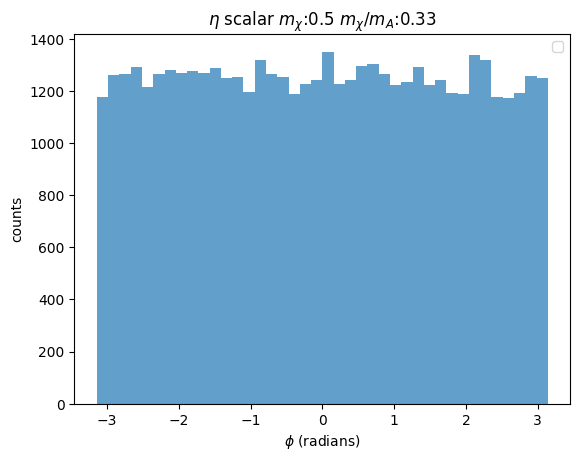

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


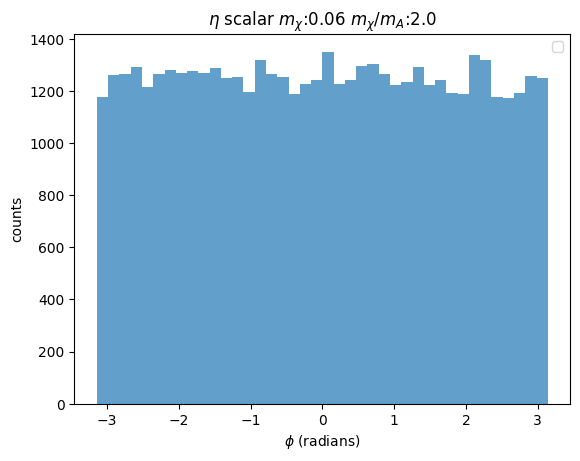

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


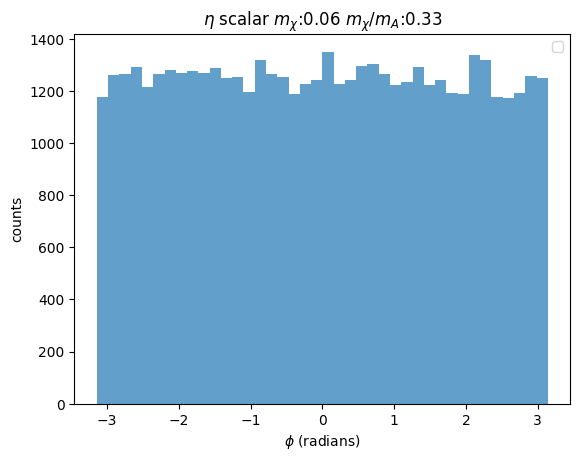

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


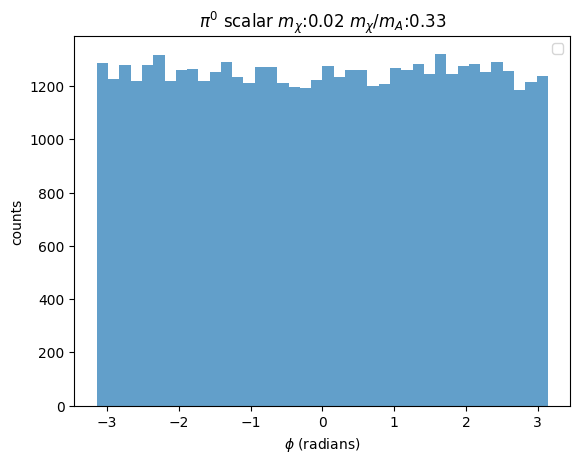

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


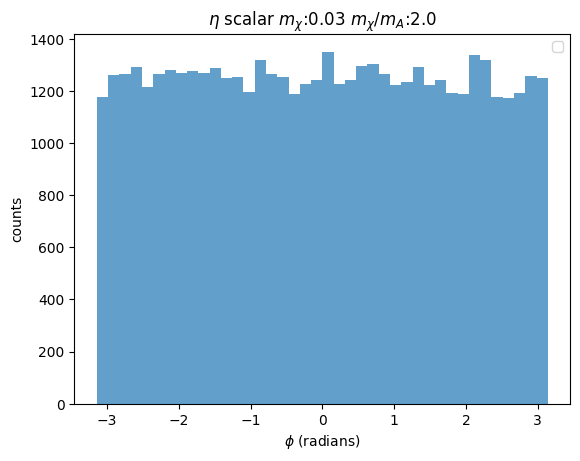

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


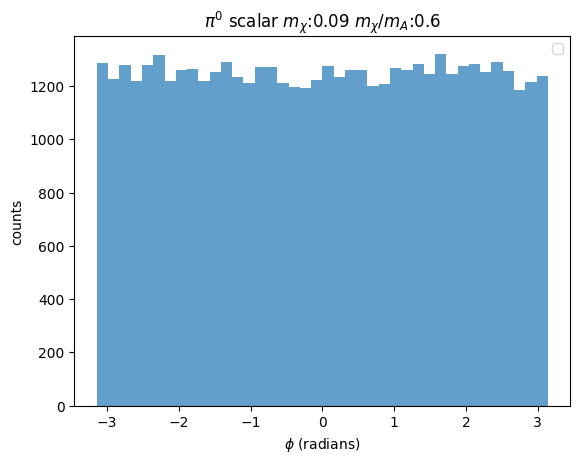

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


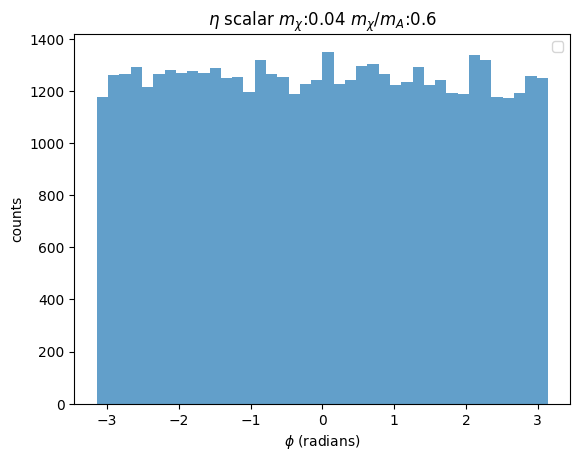

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


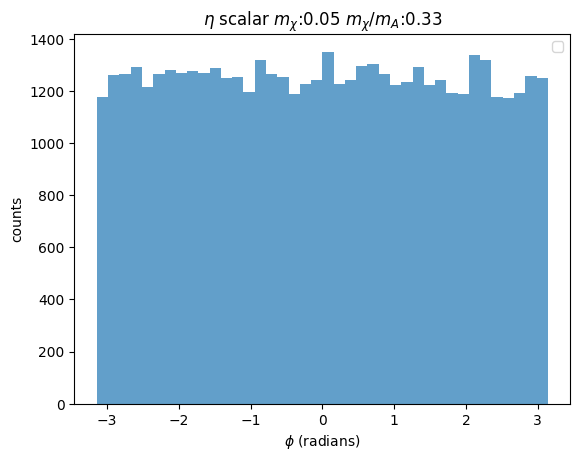

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


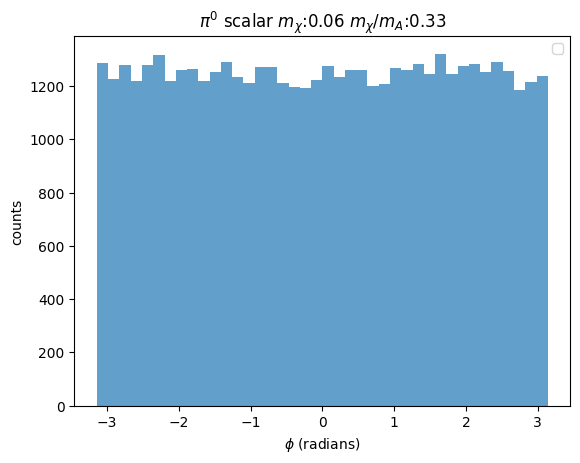

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


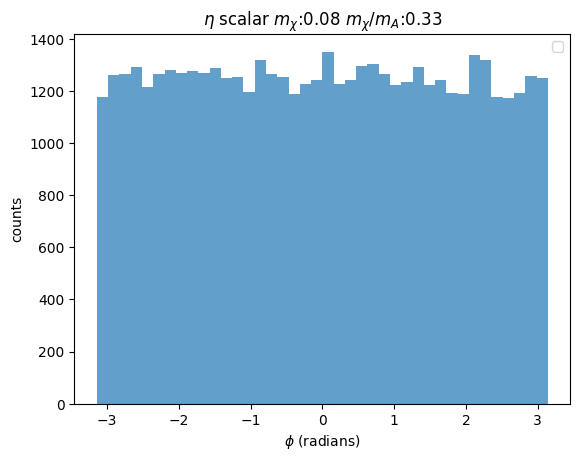

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


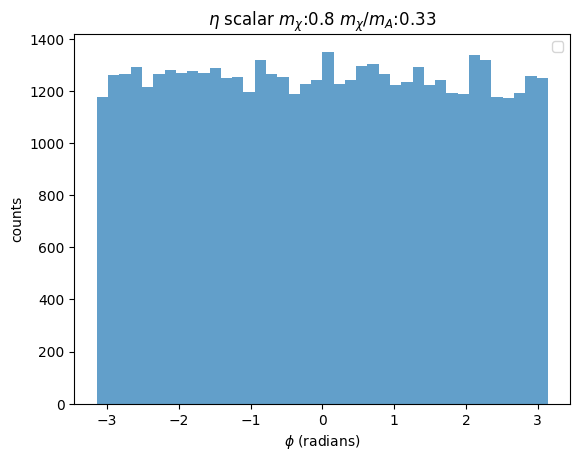

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


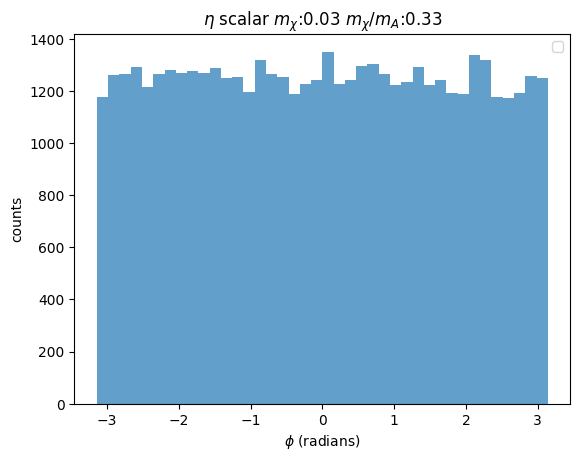

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


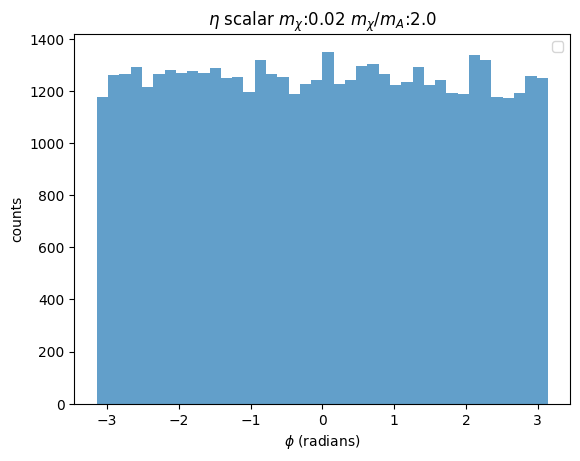

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


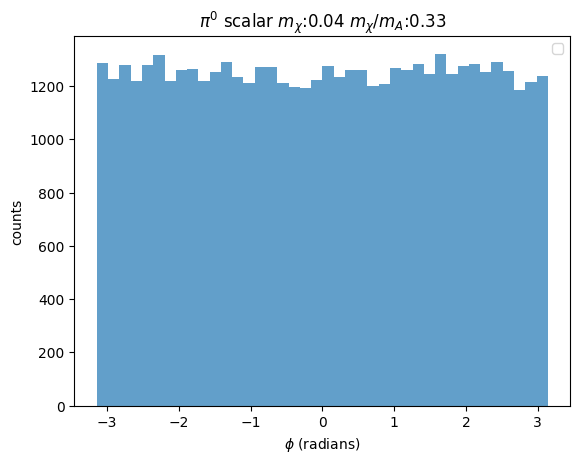

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


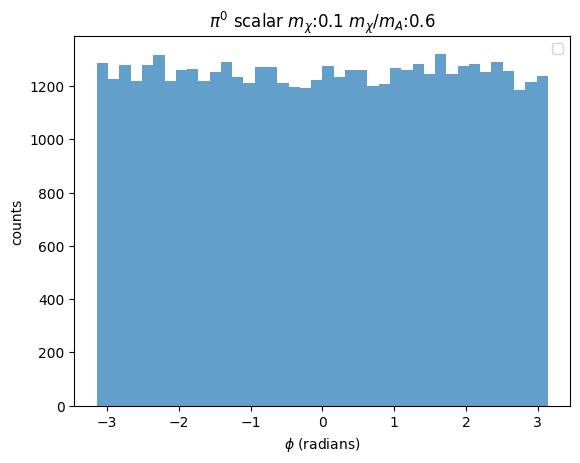

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


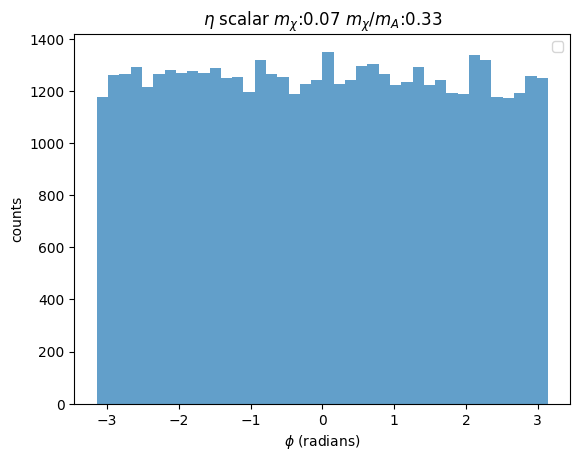

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


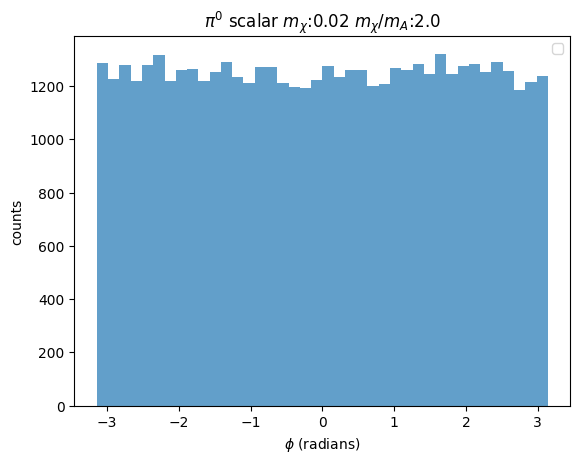

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


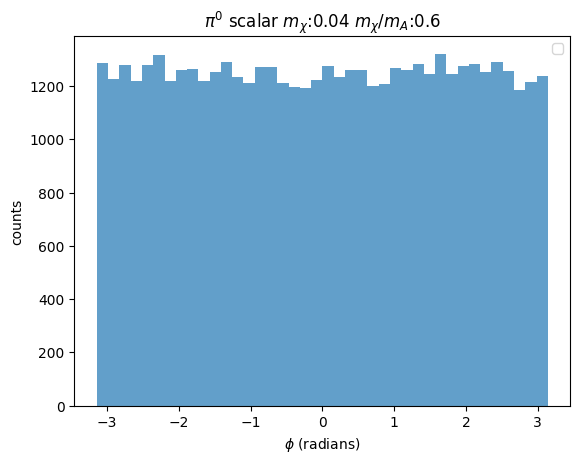

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


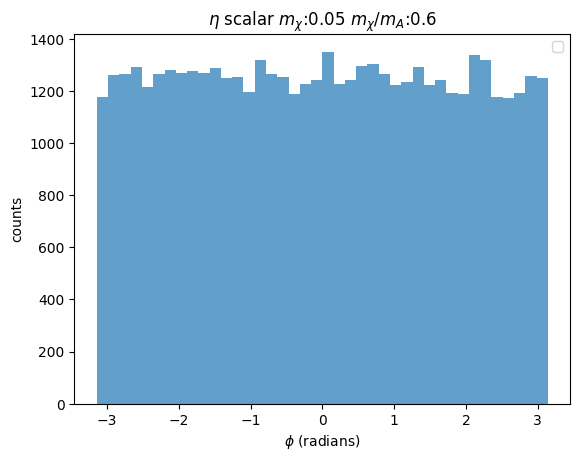

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


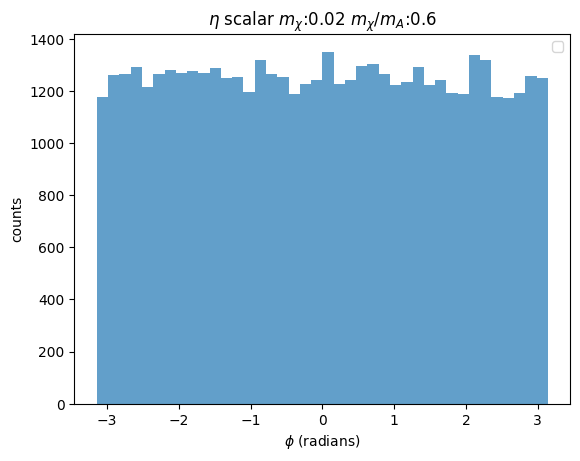

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


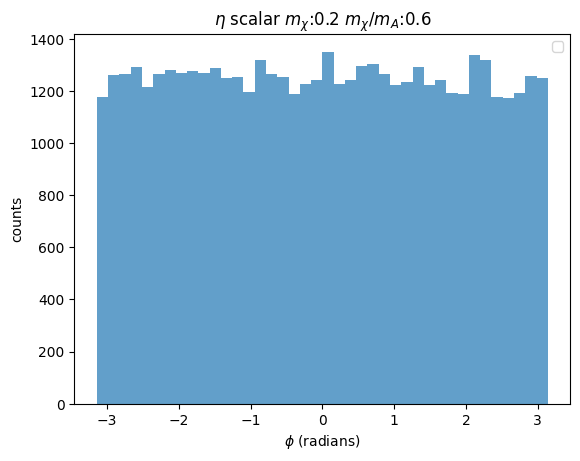

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


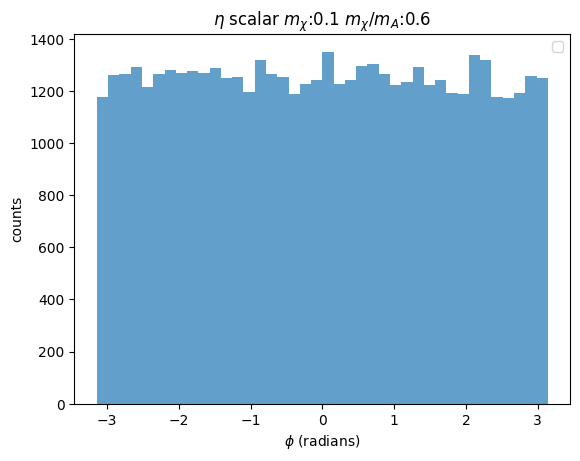

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


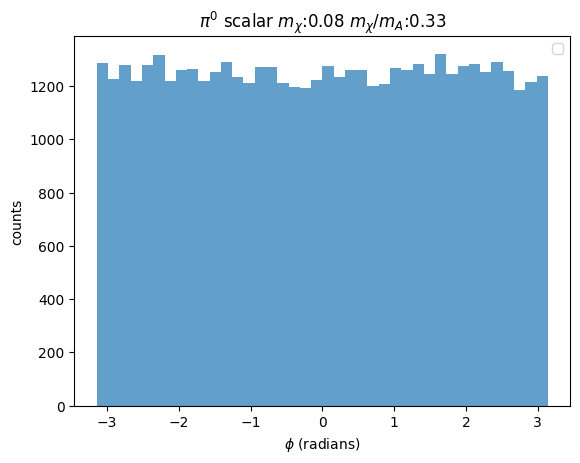

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


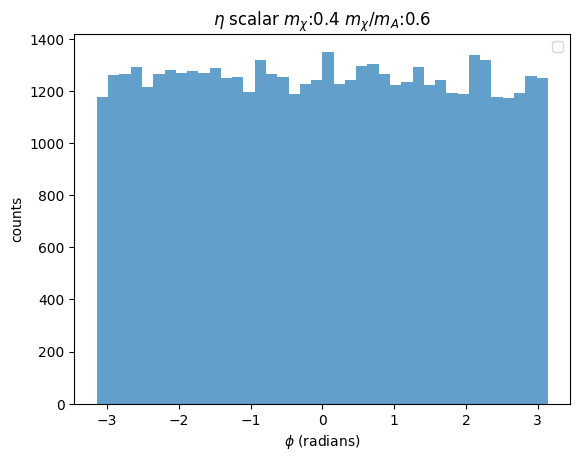

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


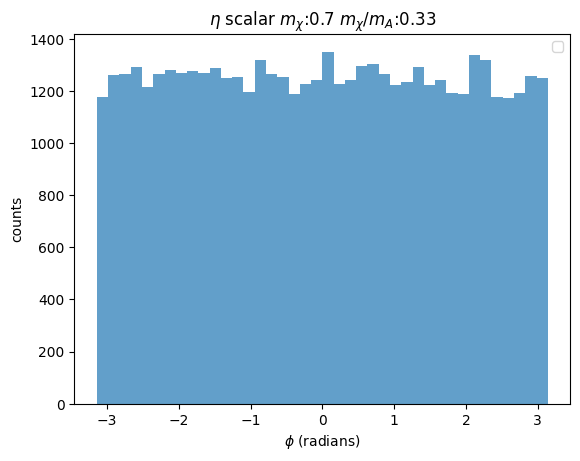

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


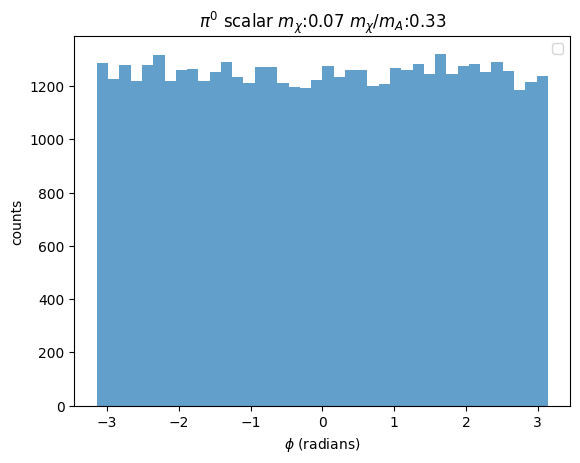

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


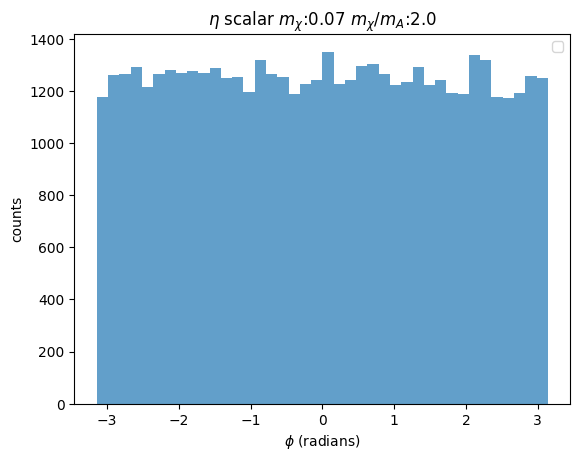

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


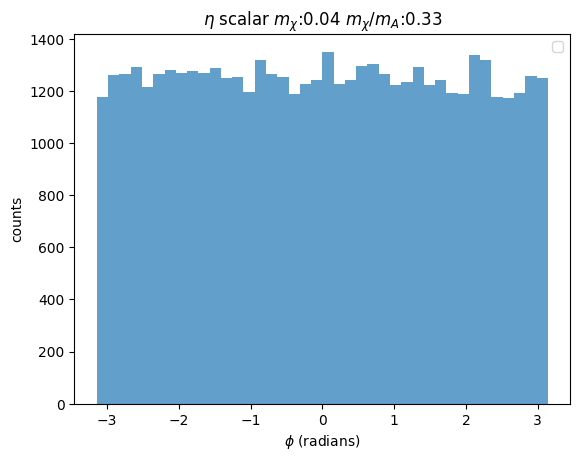

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


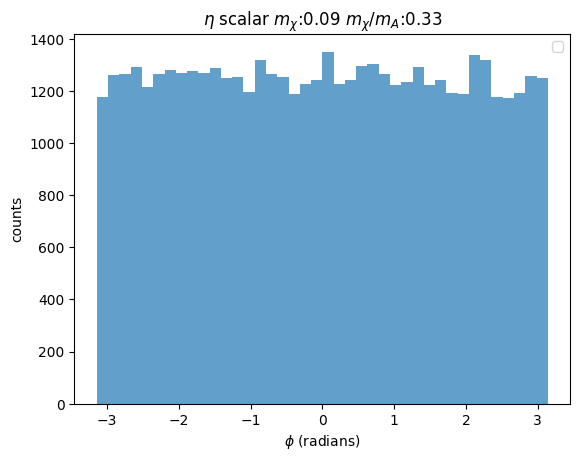

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


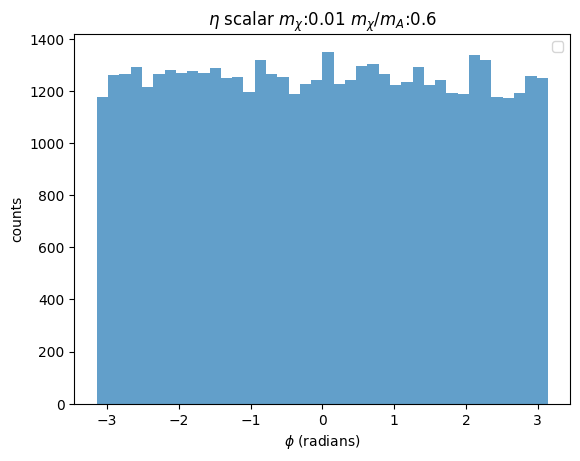

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


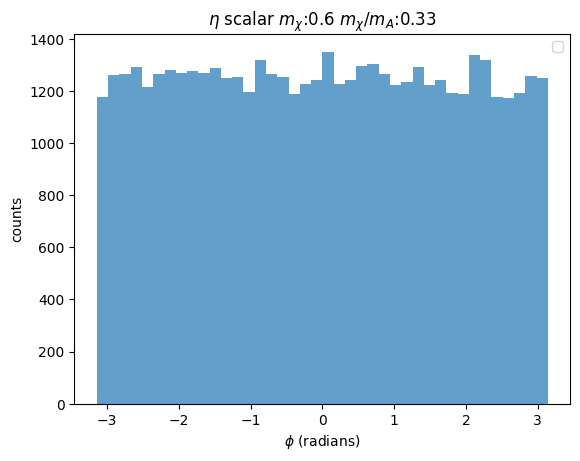

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


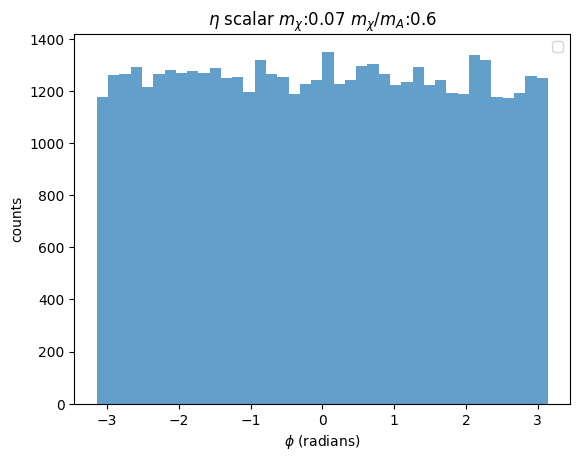

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


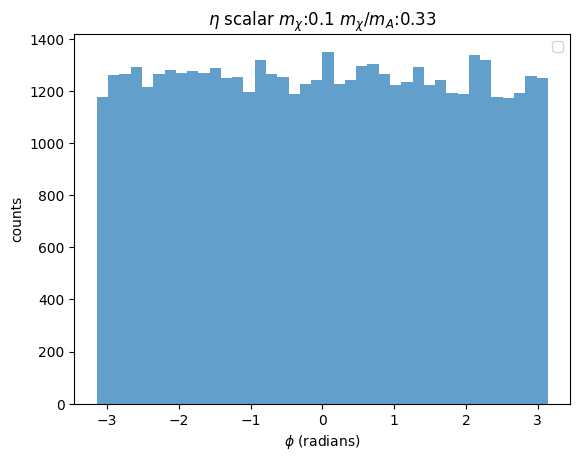

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


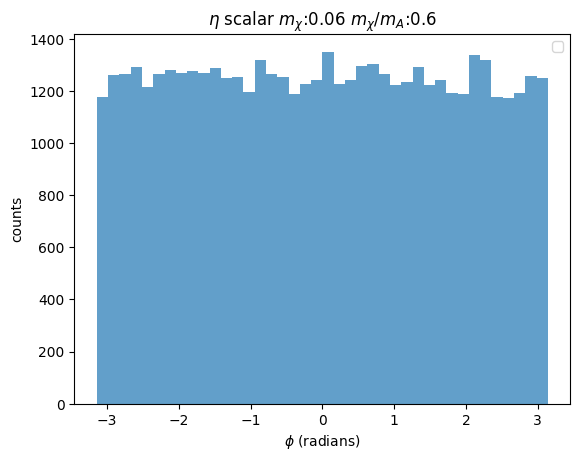

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


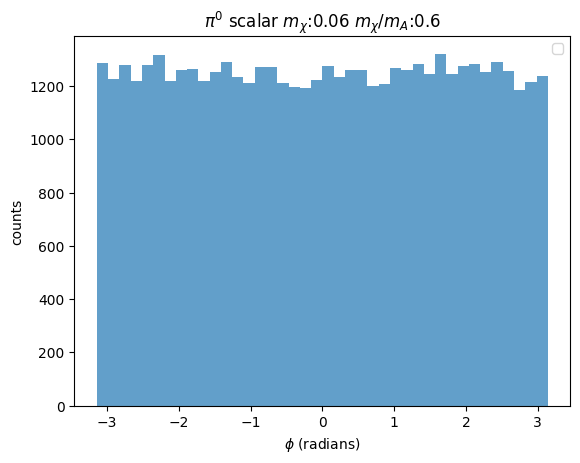

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


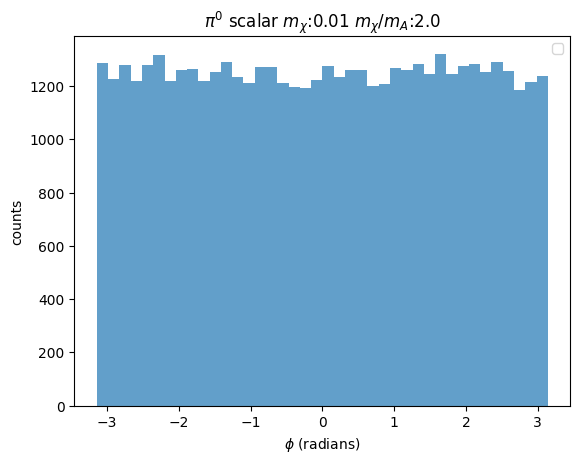

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


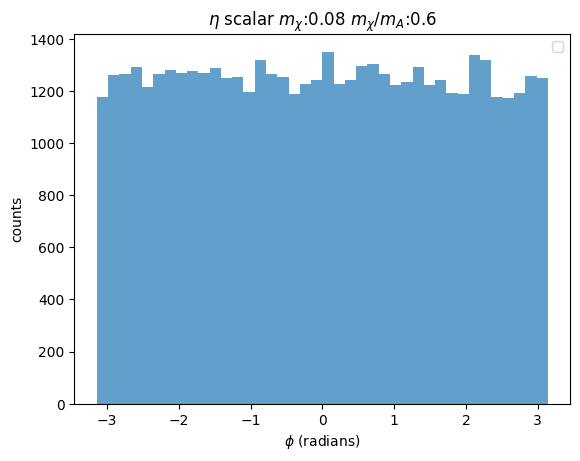

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


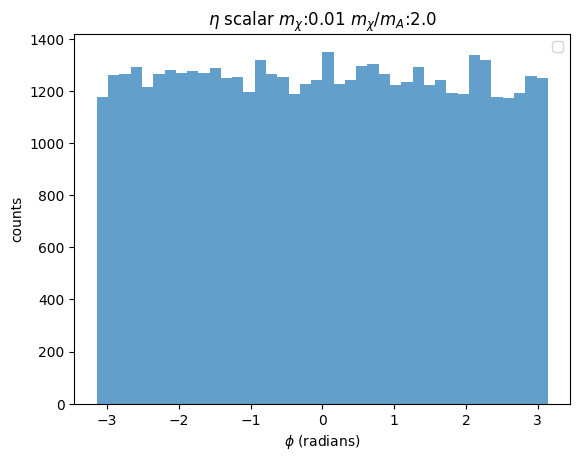

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


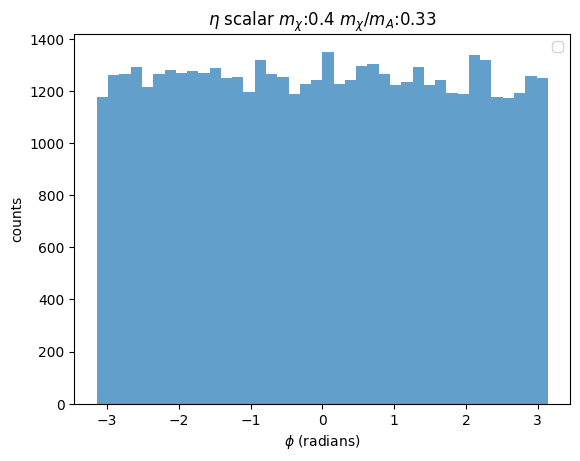

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


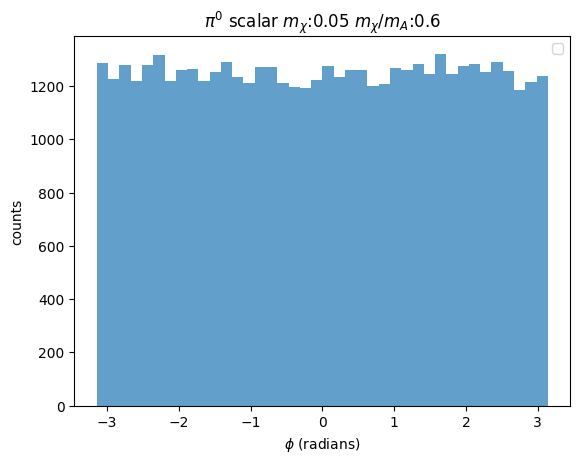

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


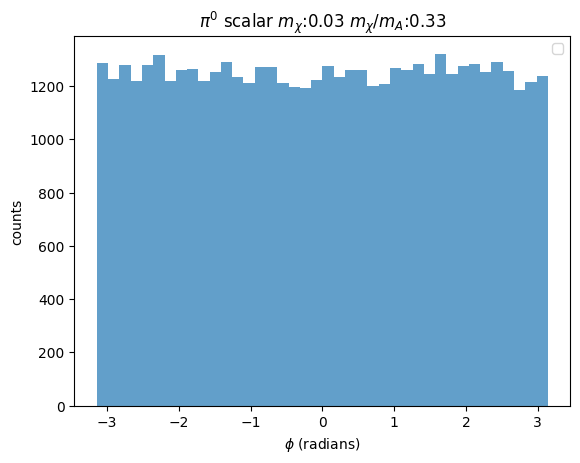

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


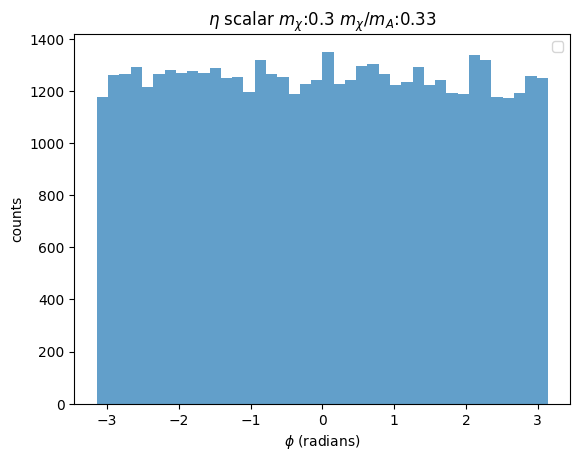

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


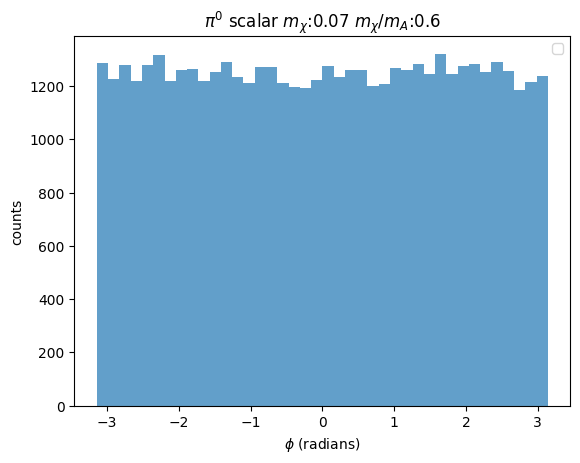

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


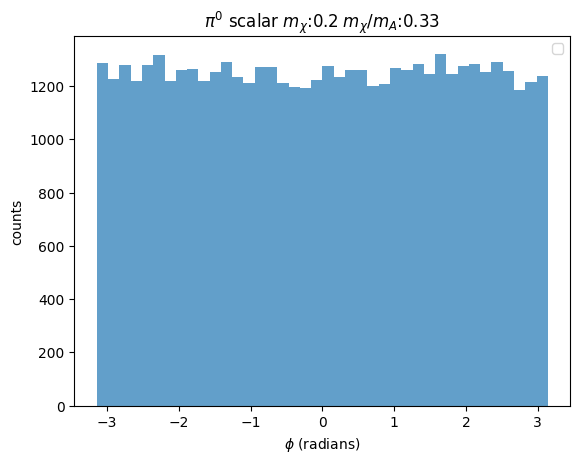

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


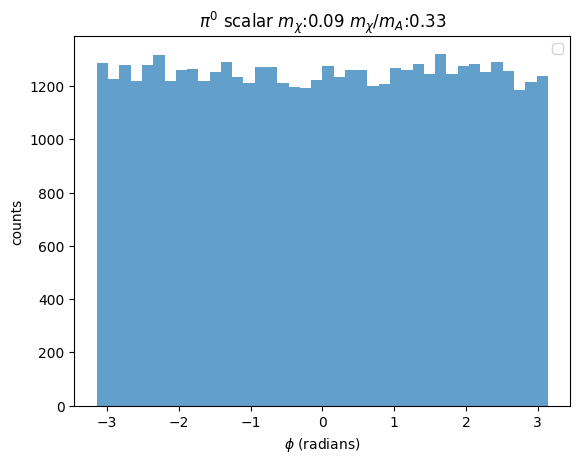

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


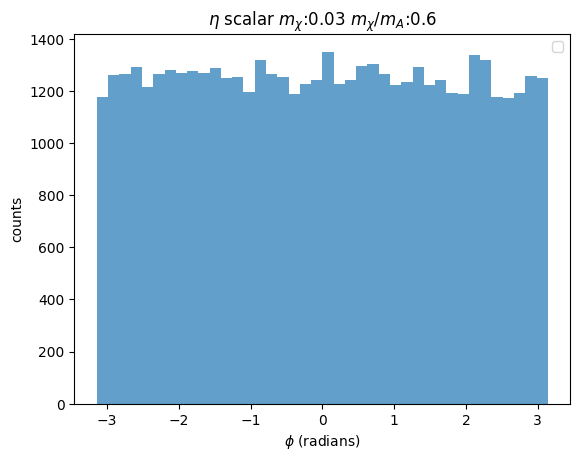

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


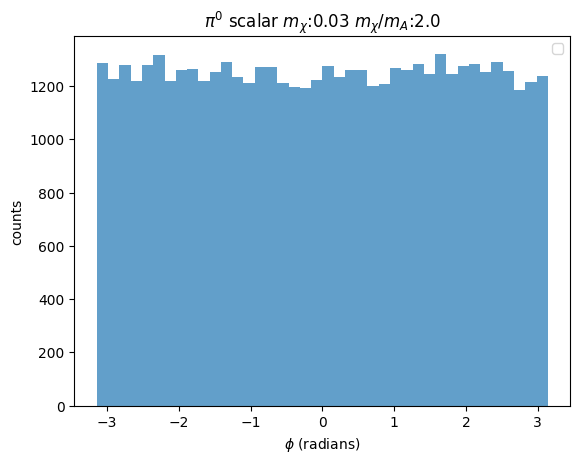

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


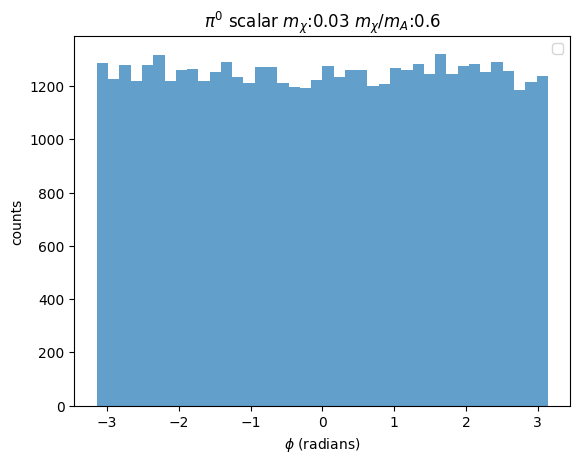

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


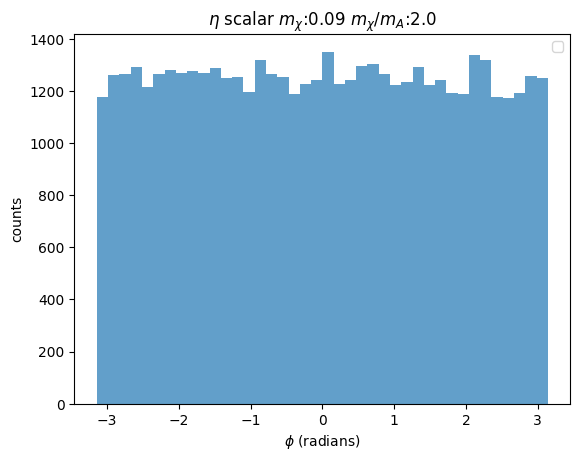

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


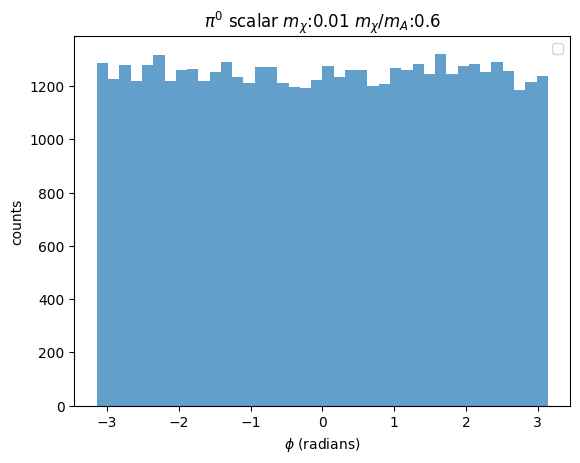

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


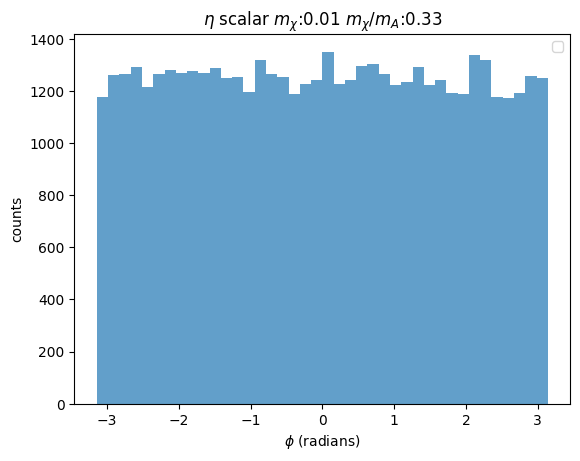

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


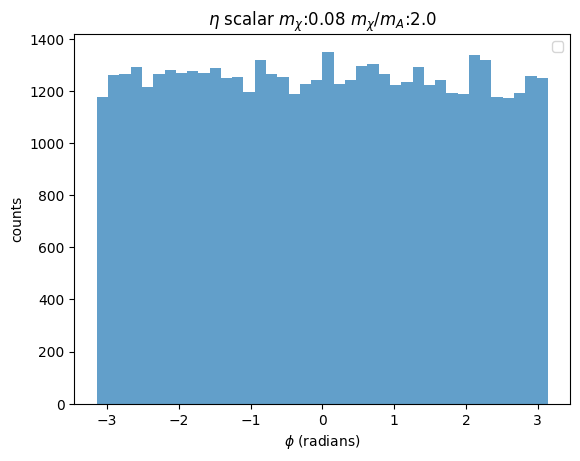

In [4]:
m_eta = 0.547862
m_pi0 = 0.1349766
dm_type = ['fermion','scalar']
flatness = []
for type in dm_type:
    path_signal = f"../data/root_files/{type}_tmp/"
    path_bkg = f"../data/root_files/angular_mesons/{type}/"
    files = os.listdir(path_signal)
    for file in files:
        signal_momentum = get_momentum(file,path_signal)
        bkg_momentum = get_meson_momentum(file,path_bkg)
        if bkg_momentum is None:
            continue
        if signal_momentum is None:
            continue
        
        signal_momentum = cartesian_to_spherical(signal_momentum)
        bkg_momentum = cartesian_to_spherical(bkg_momentum)
        origin_type, dm_type, mass, dt_ratio = get_name_info(file)
        if origin_type == "pi0":
            meson_mass = m_pi0
        elif origin_type == "eta":
            meson_mass = m_eta
        m_a = mass/dt_ratio
        eq1 = 2*mass <= m_a
        eq2 = m_a < meson_mass
        eq3 = 2*mass >= 0.97*m_a
        all_eq = eq1 and eq2 and eq3
        
        flat_indicator = 0
        
        lines = ['p','theta','phi']
        names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
        for i in range(3):
            if lines[i] != 'phi':
                continue
            max_value = bkg_momentum[lines[i]].max()
            min_value = bkg_momentum[lines[i]].min()
            min_sig = signal_momentum[lines[i]].min()
            max_sig = signal_momentum[lines[i]].max()
            
            #plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
            counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
            plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,density=False)
            std_dev = np.std(bkg_momentum[lines[i]])
            
            if std_dev < 1.82:
                flat_indicator = 1
            else:
                flat_indicator = 0
            flatness.append([origin_type,dm_type,mass,dt_ratio,std_dev,flat_indicator])
            # Plotting vertical lines
            #plt.axvline(min_sig, color='red', linestyle='--', label='start of detector')
            #plt.axvline(max_sig, color='blue', linestyle='--', label='end of detector')
            #check if $\{name}$ is a correct variable
            if origin_type == "pi0":
                new_type = "pi^0"
            else:
                new_type = origin_type
            
            plt.title(rf"$\{new_type}$ {dm_type} $m_\chi$:{mass} $m_\chi/m_A$:{dt_ratio}")
            plt.xlabel(names[i])
            plt.ylabel('counts')
            plt.legend()
            plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


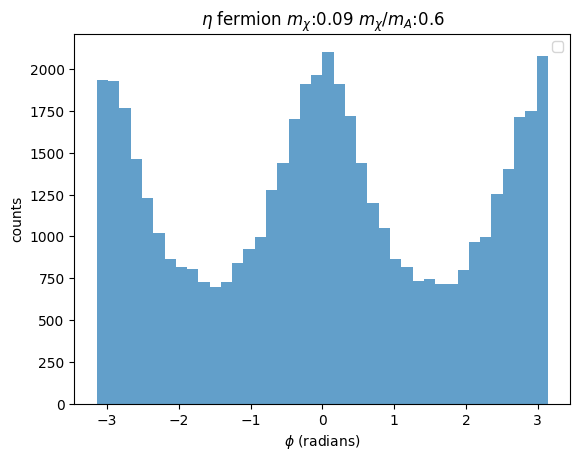

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


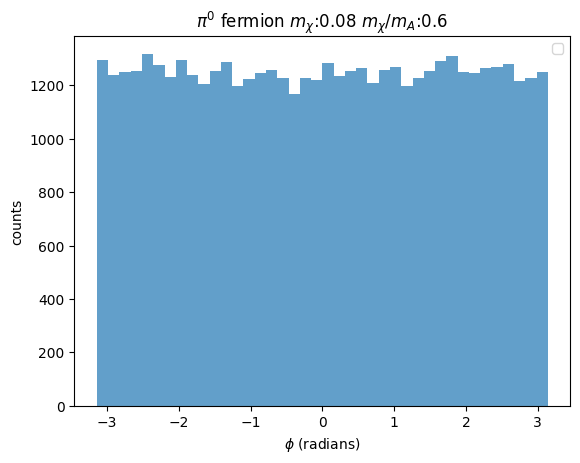

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


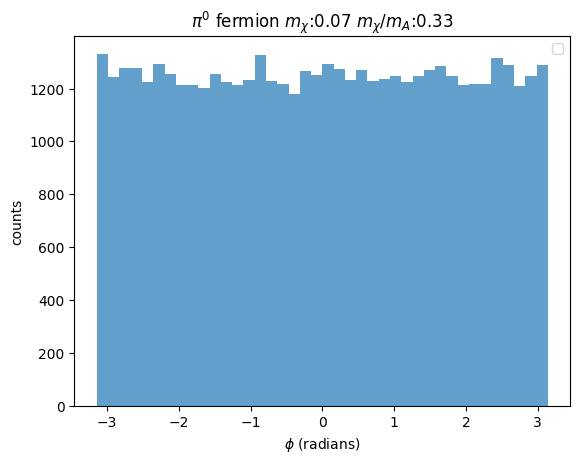

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


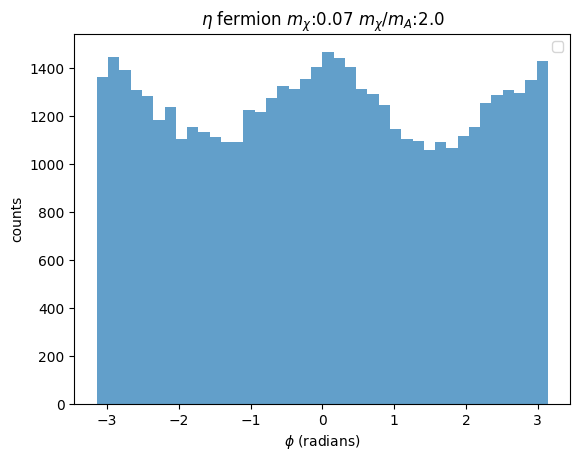

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


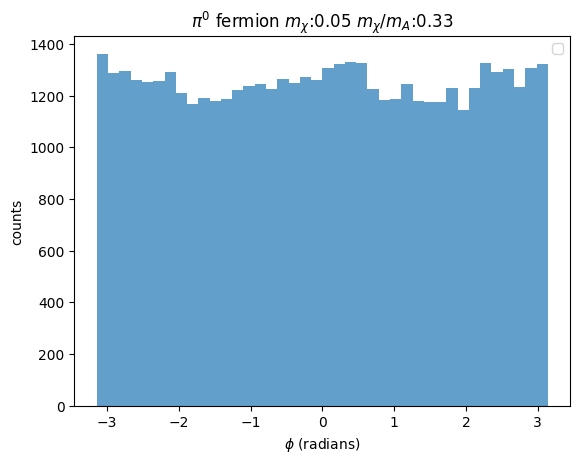

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


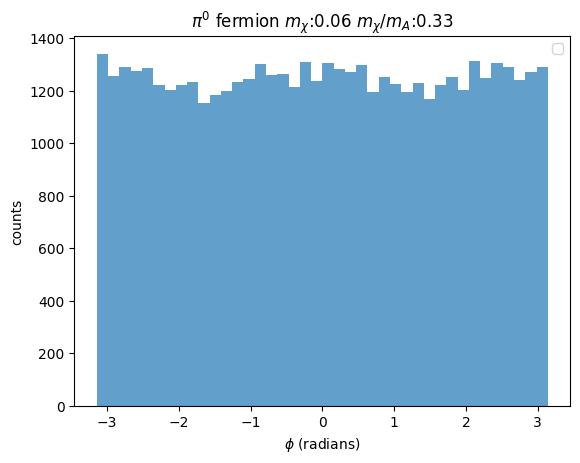

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


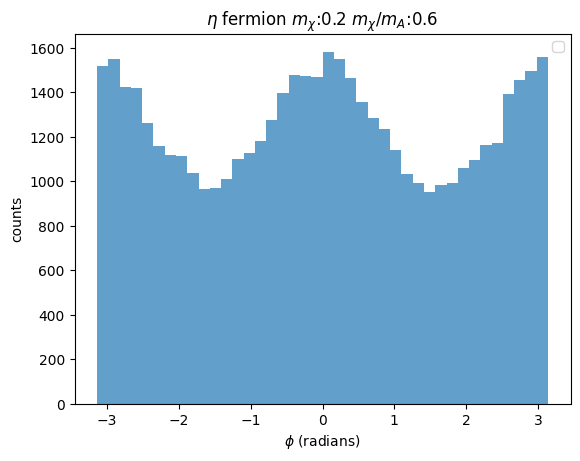

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


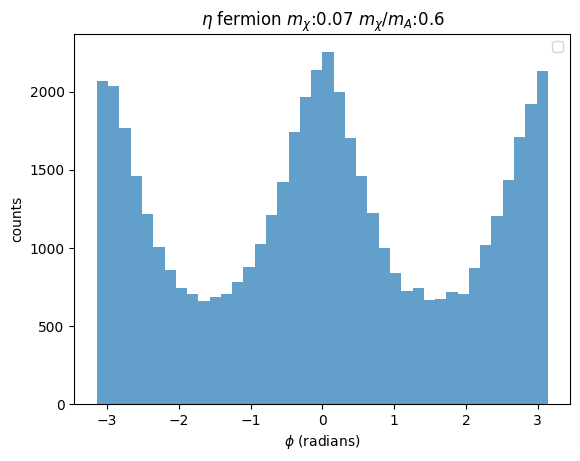

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


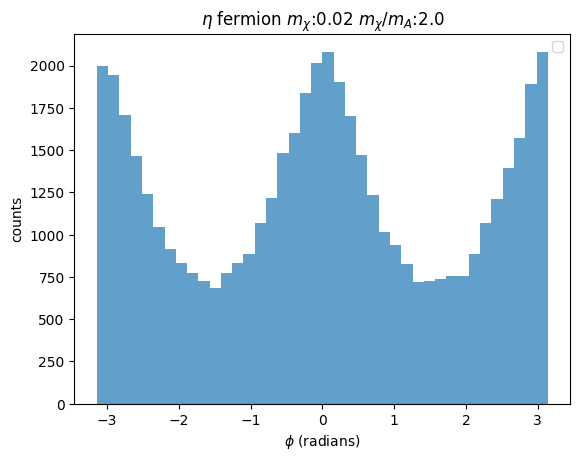

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for pi0_fermion_ma_0.03_dt_0.33.root


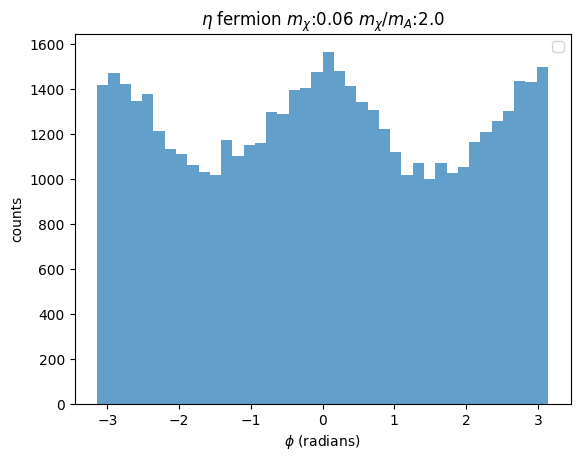

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


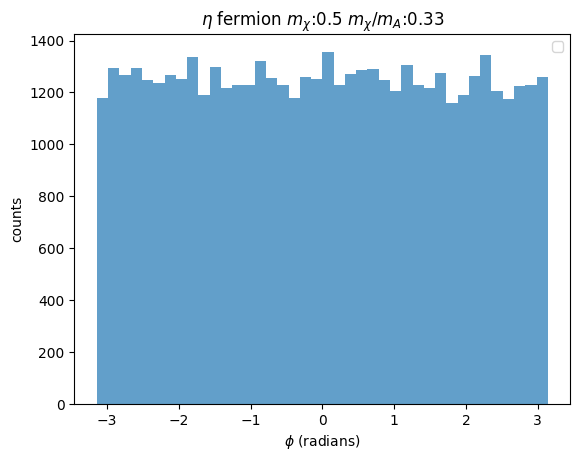

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


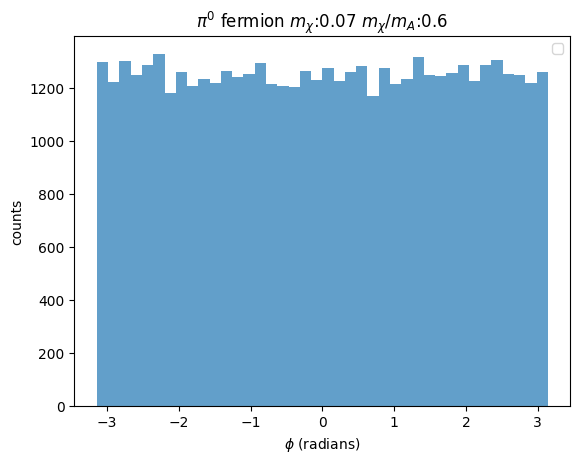

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


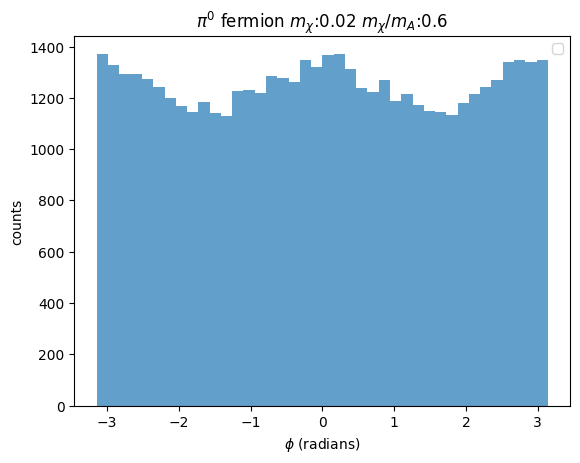

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


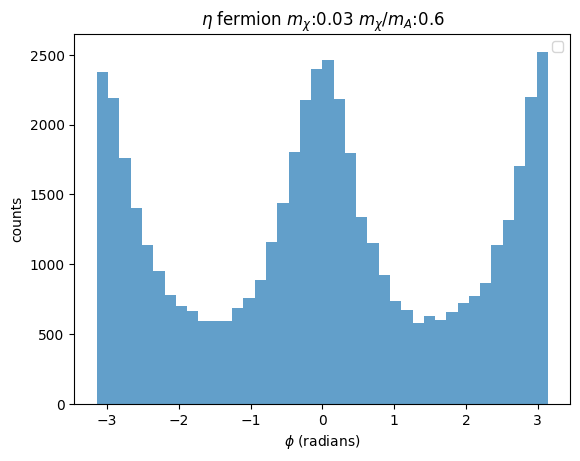

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


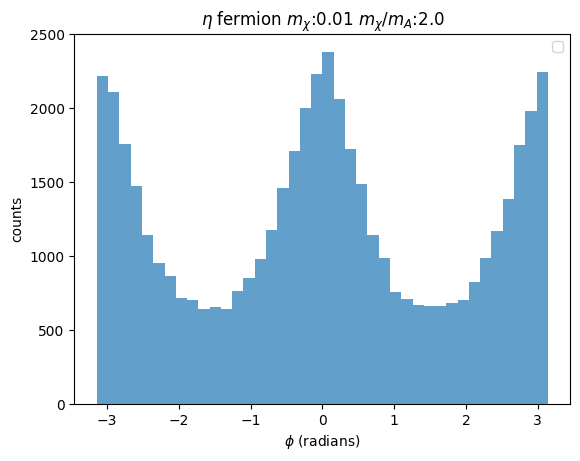

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.1_dt_0.33.root


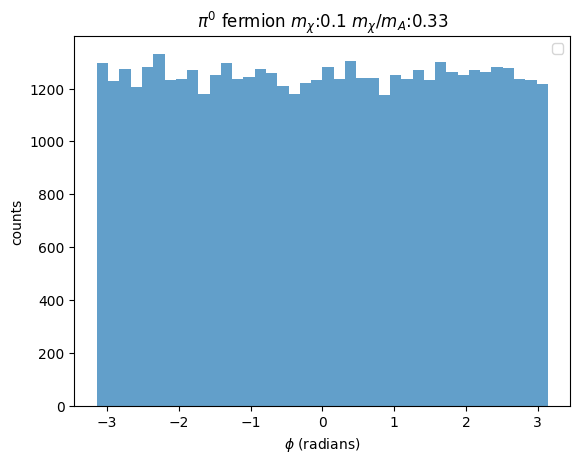

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


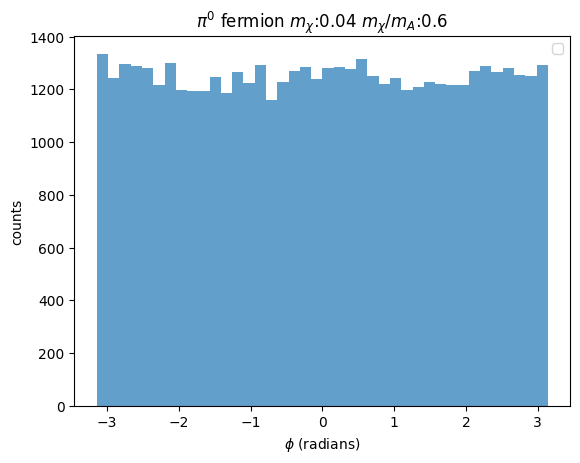

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


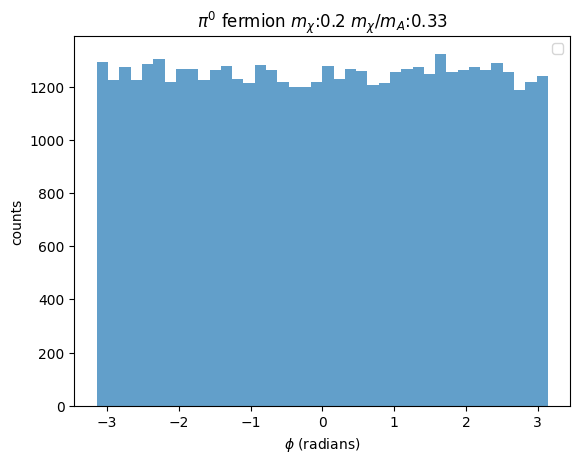

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.07_dt_0.33.root
no keys for eta_fermion_ma_0.04_dt_0.33.root


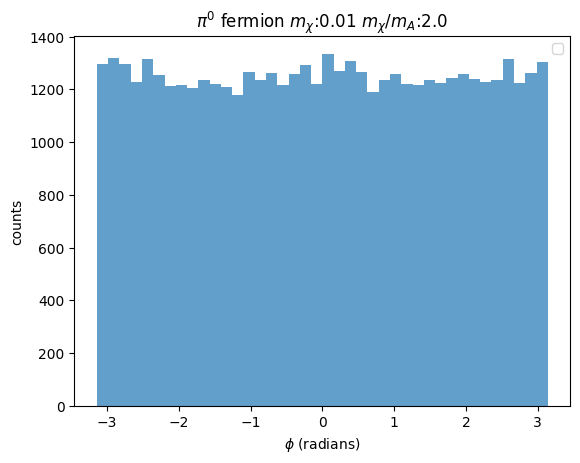

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


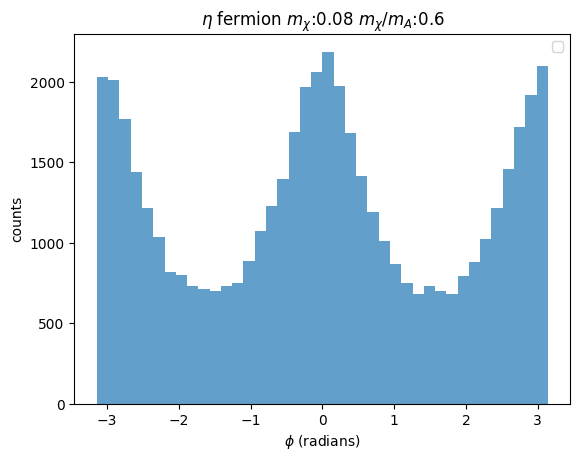

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


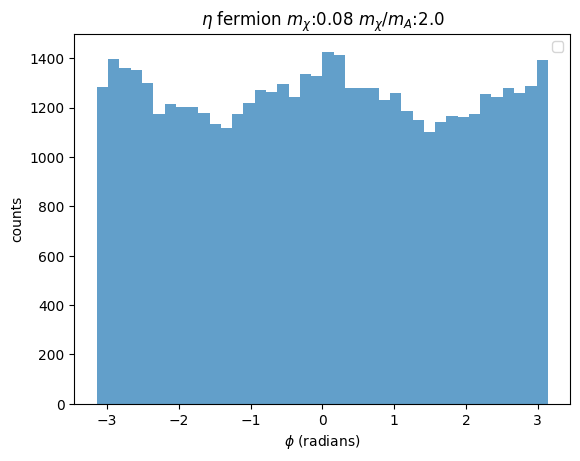

no keys for eta_fermion_ma_0.09_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


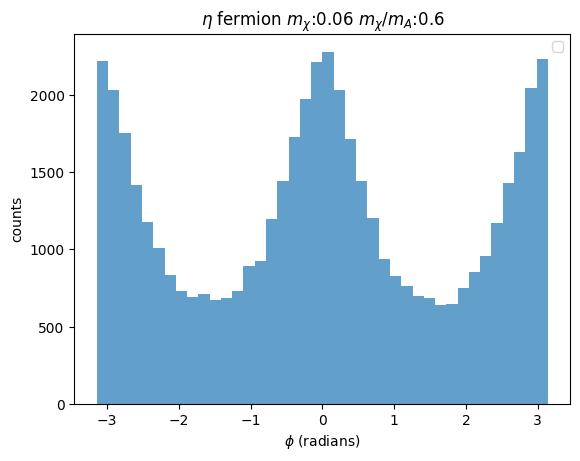

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


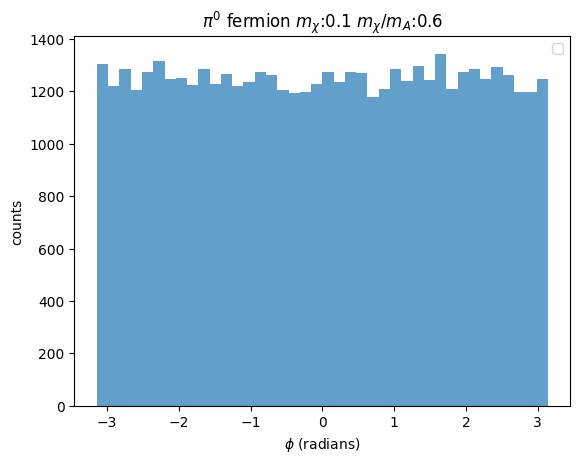

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


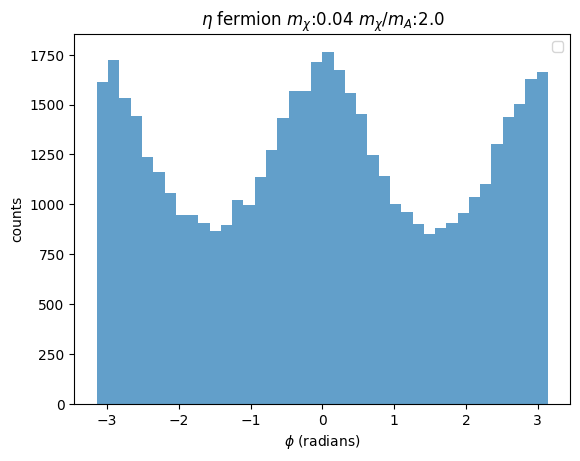

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


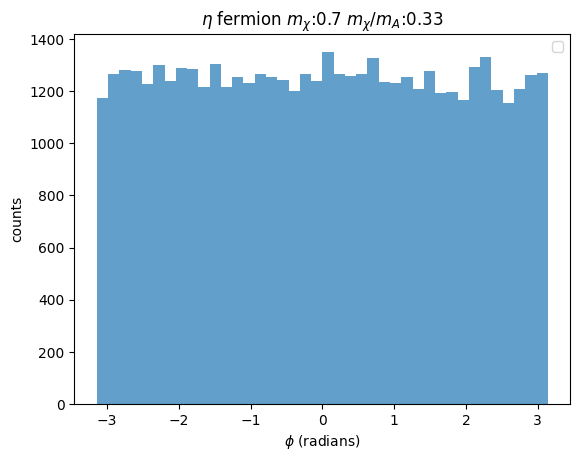

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


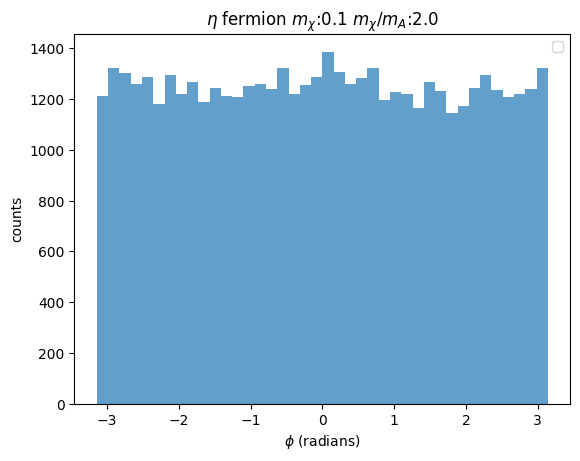

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


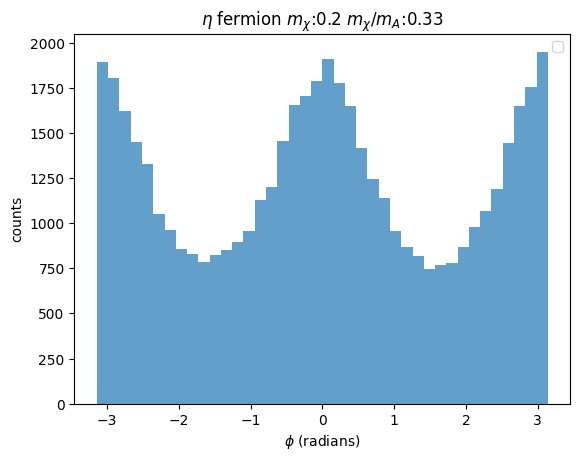

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


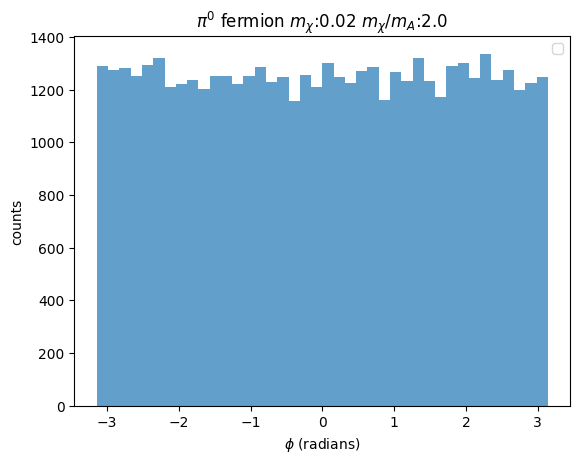

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


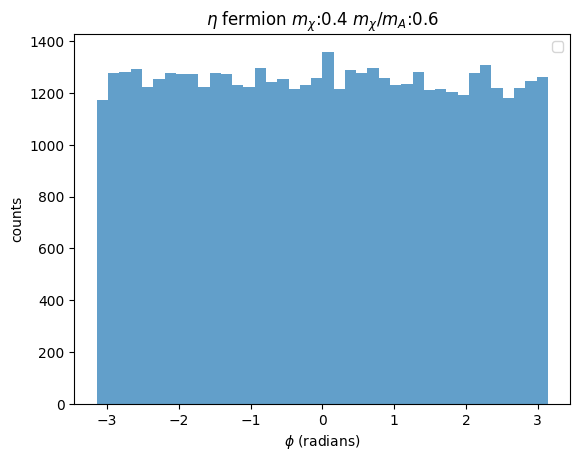

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


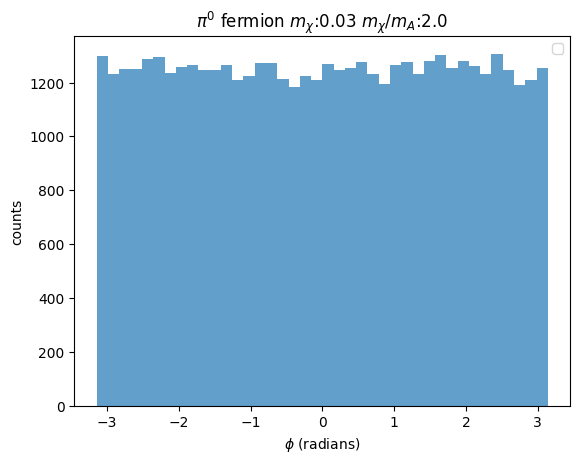

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


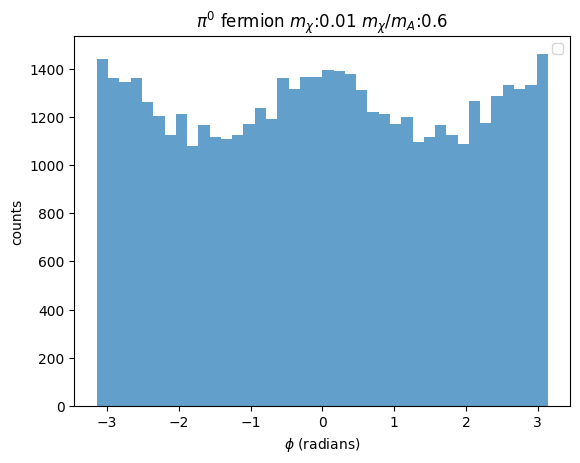

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


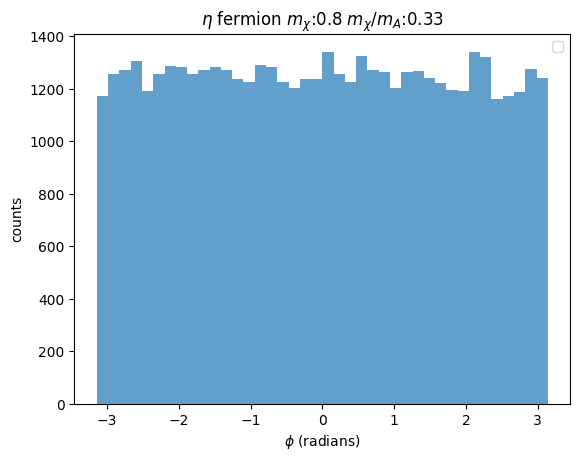

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for pi0_fermion_ma_0.02_dt_0.33.root


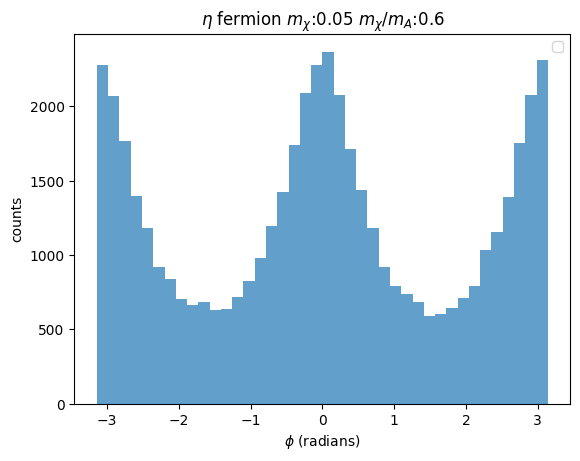

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


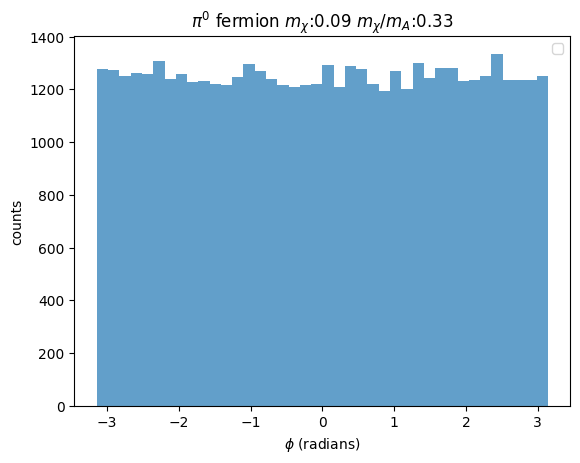

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


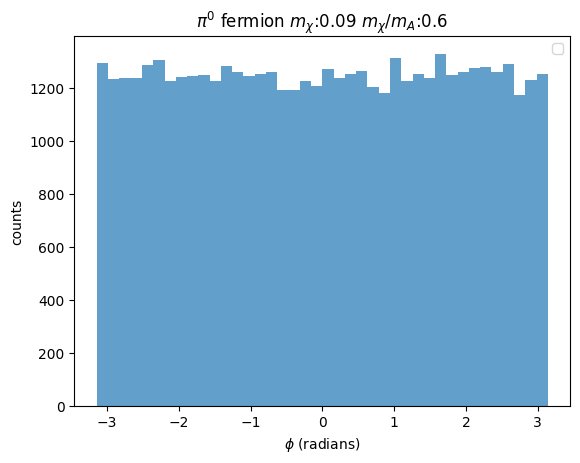

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


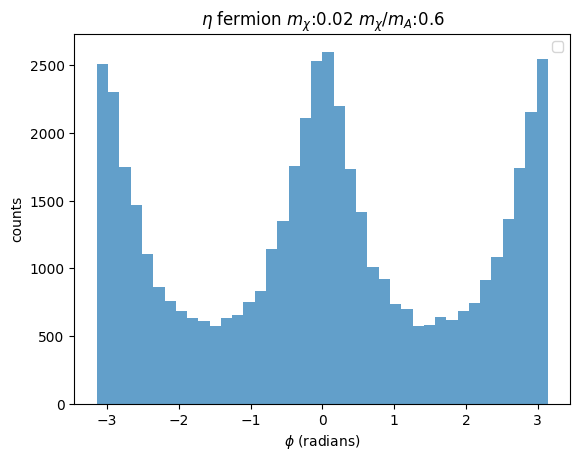

no keys for eta_fermion_ma_0.01_dt_0.6.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


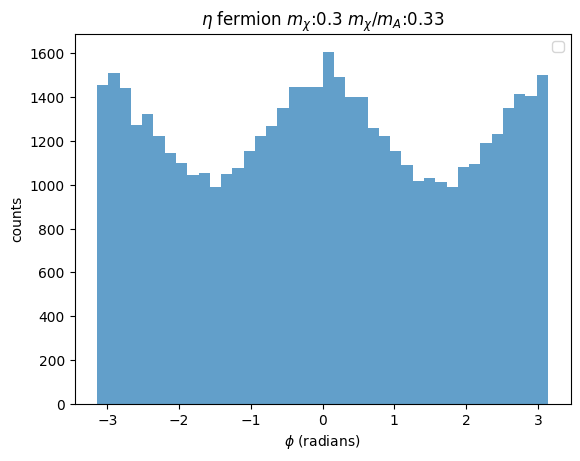

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


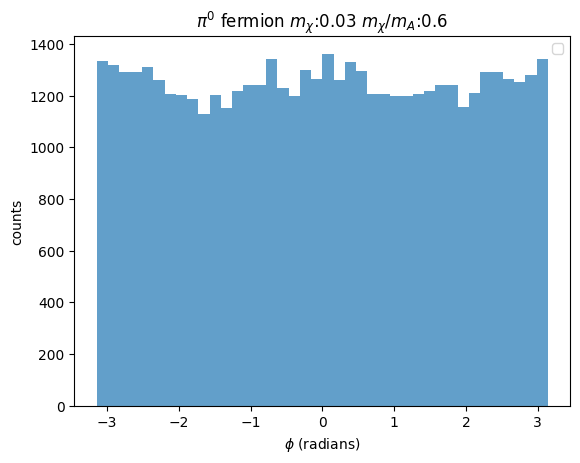

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for pi0_fermion_ma_0.04_dt_0.33.root


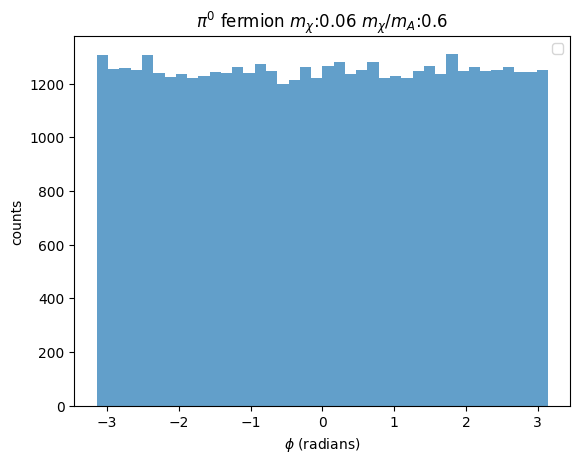

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


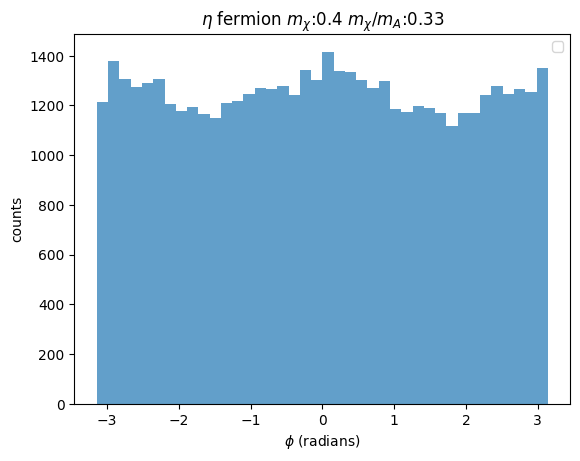

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


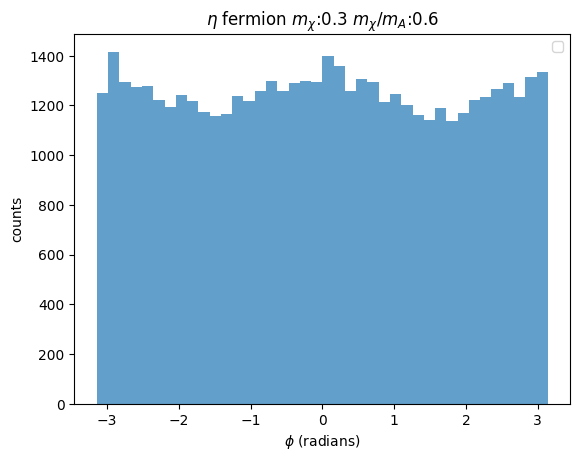

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


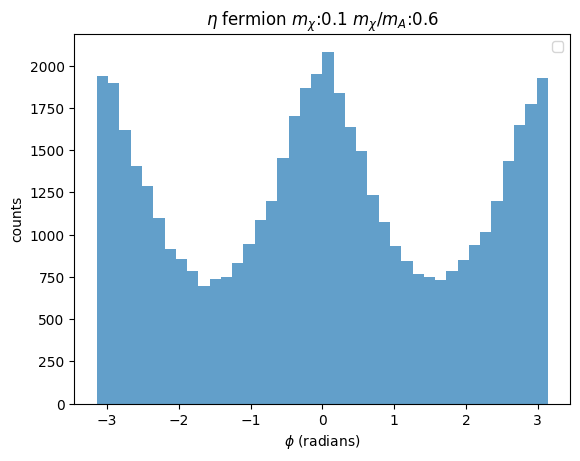

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.02_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root
no keys for eta_fermion_ma_0.01_dt_0.33.root


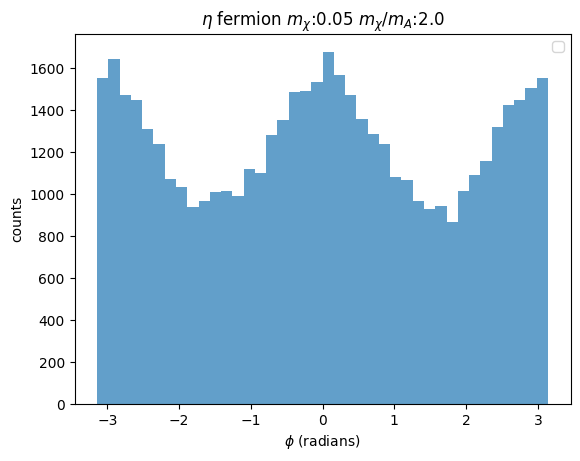

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


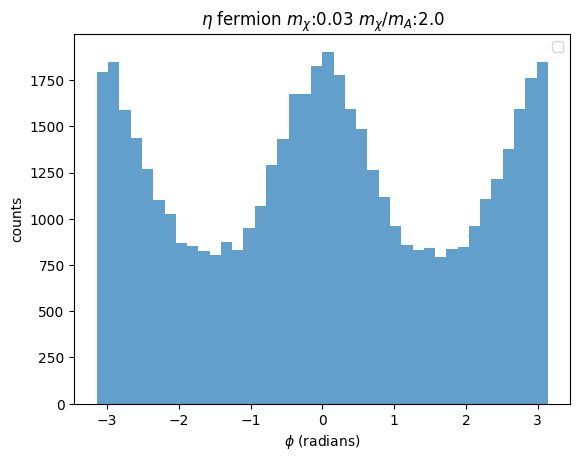

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


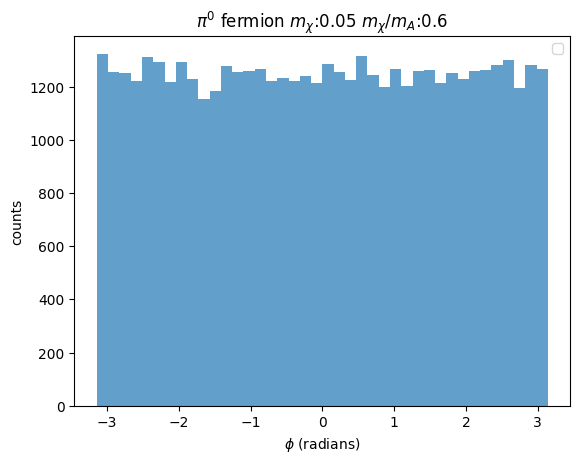

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


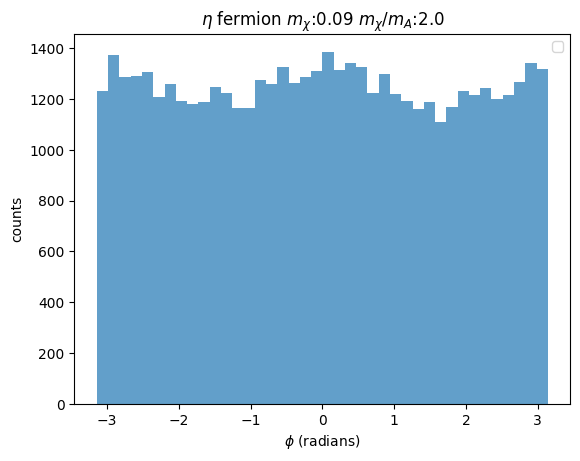

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


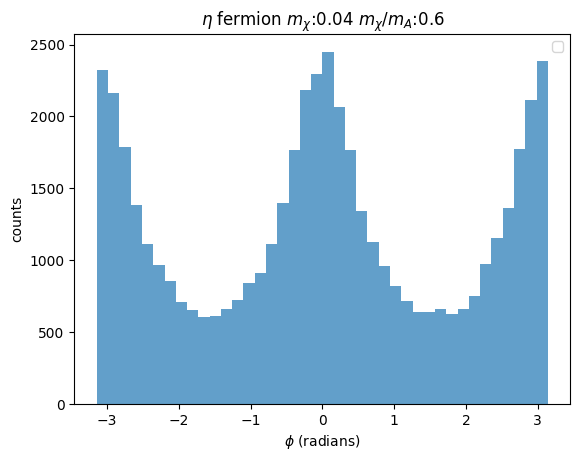

no keys for eta_fermion_ma_0.08_dt_0.33.root
no keys for eta_fermion_ma_0.06_dt_0.33.root


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


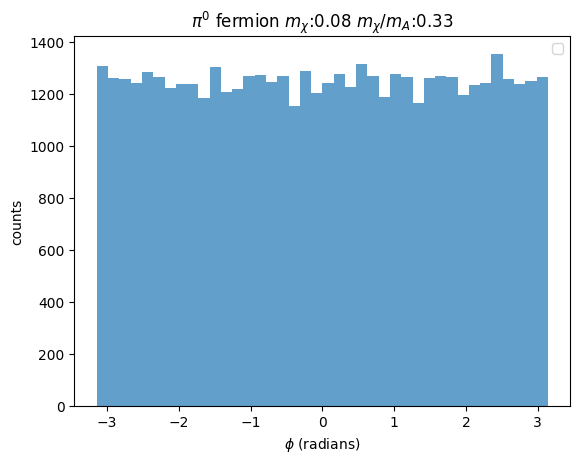

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


no keys for eta_fermion_ma_0.05_dt_0.33.root
no keys for eta_fermion_ma_0.03_dt_0.33.root
no keys for pi0_fermion_ma_0.01_dt_0.33.root


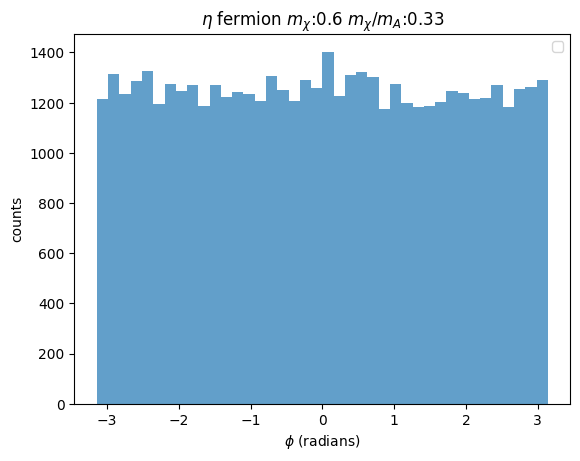

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


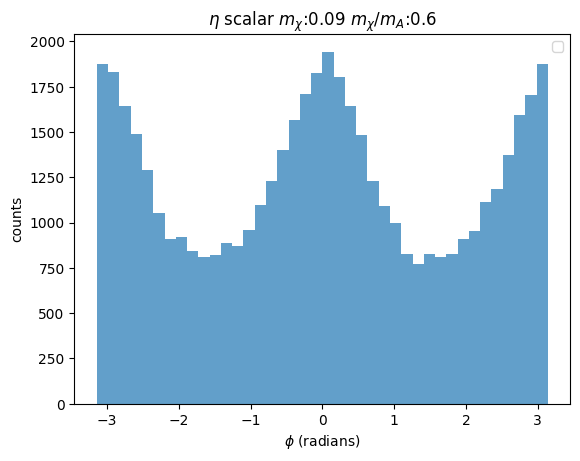

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


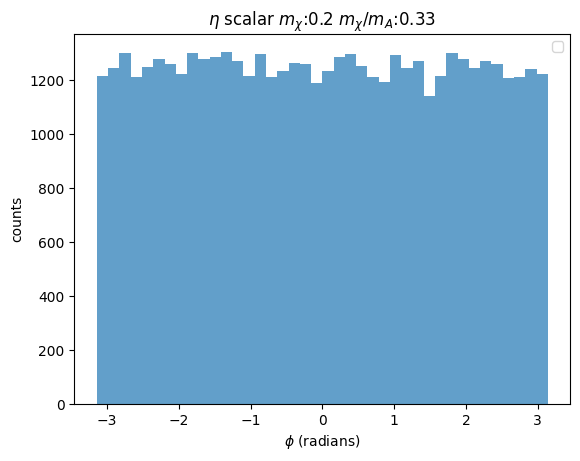

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


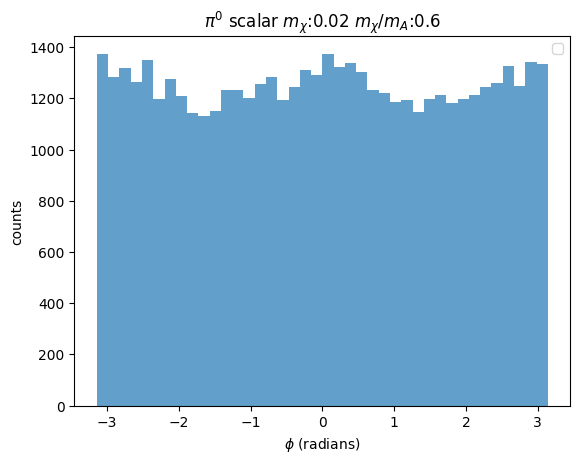

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


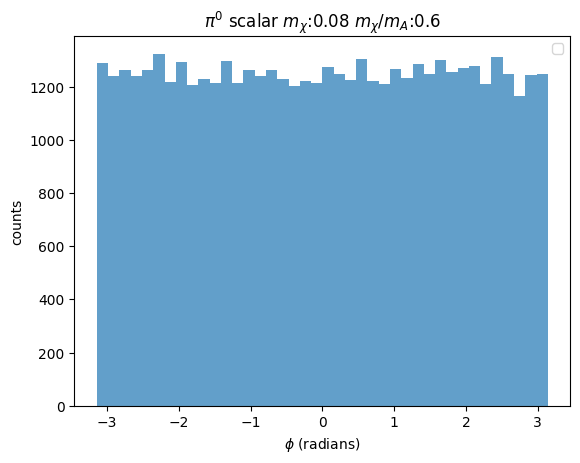

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


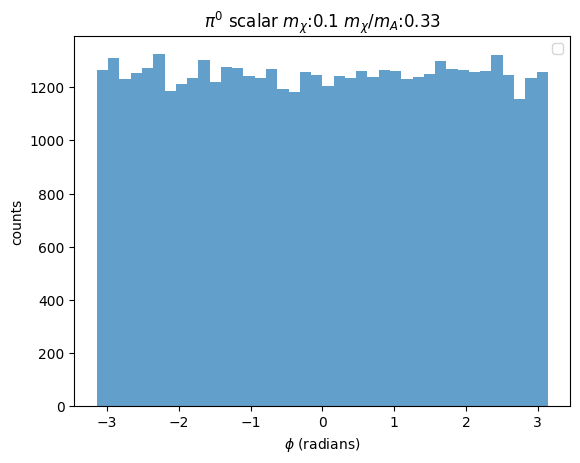

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


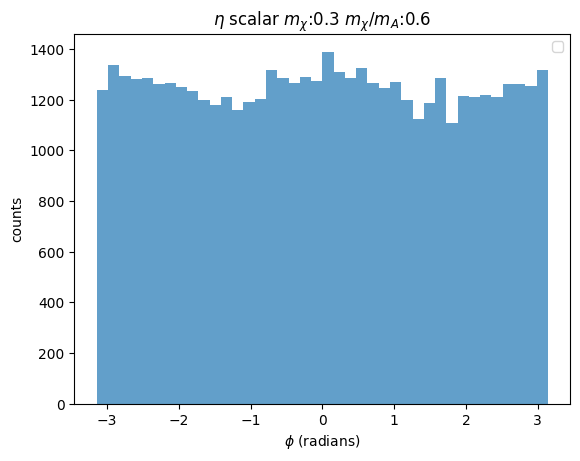

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


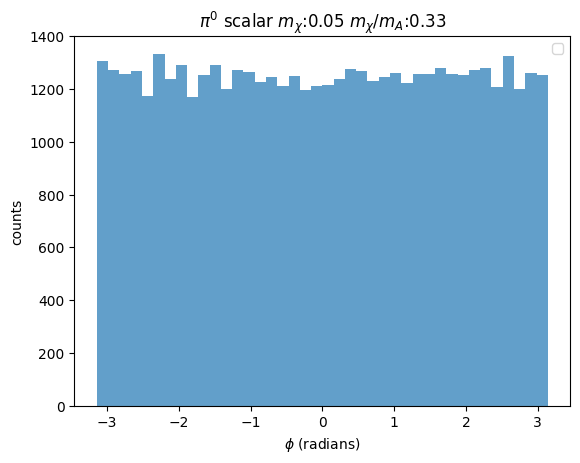

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


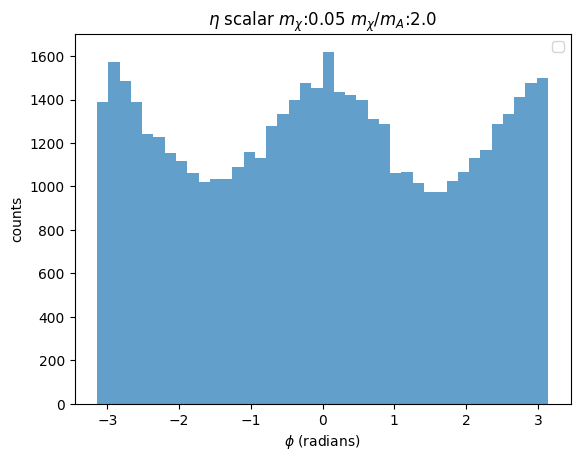

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


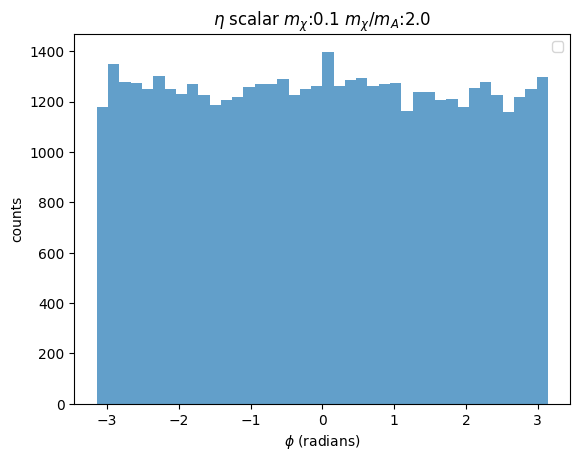

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


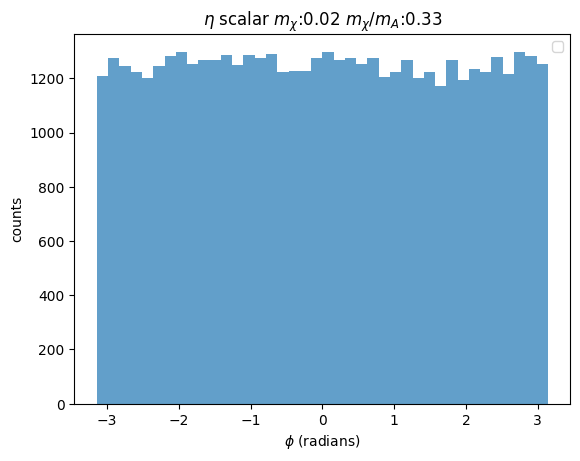

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


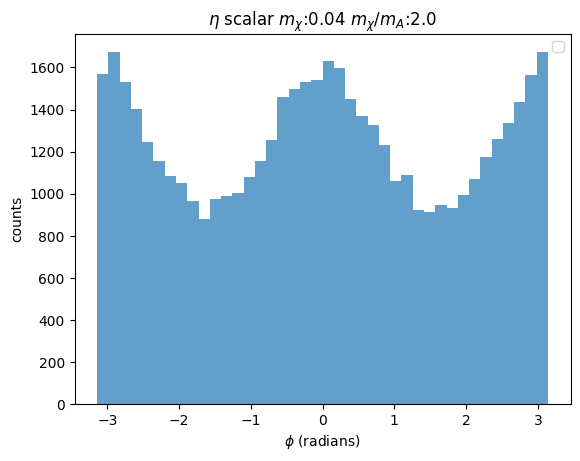

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


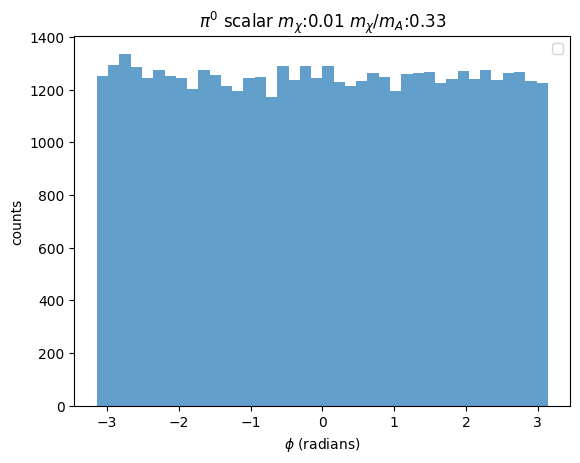

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


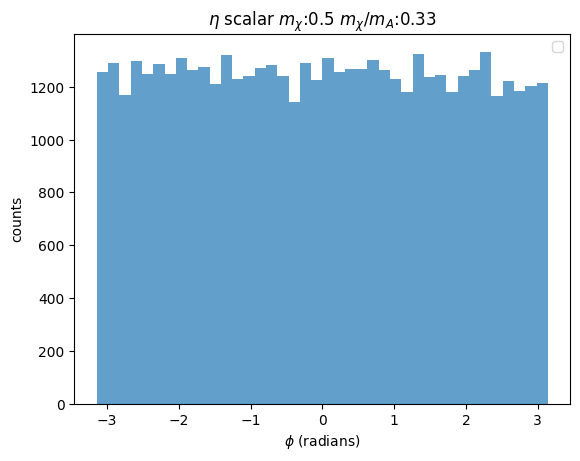

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


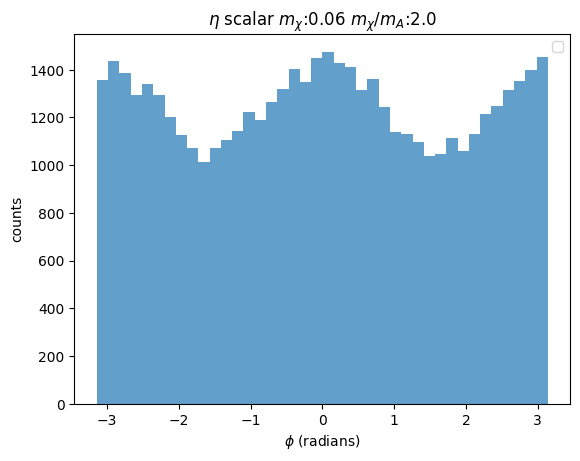

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


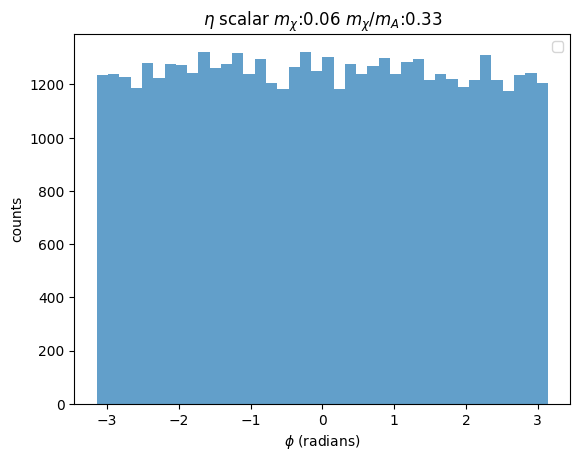

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


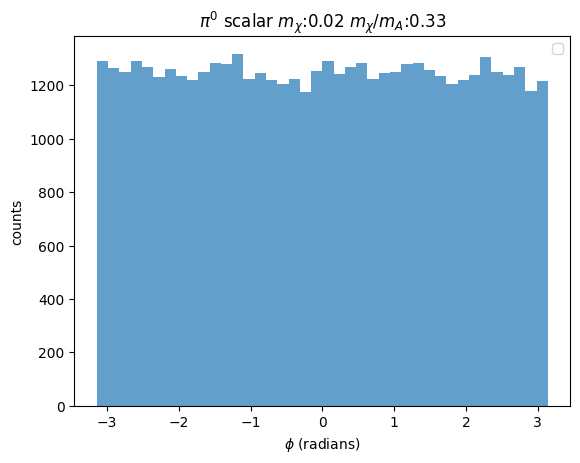

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


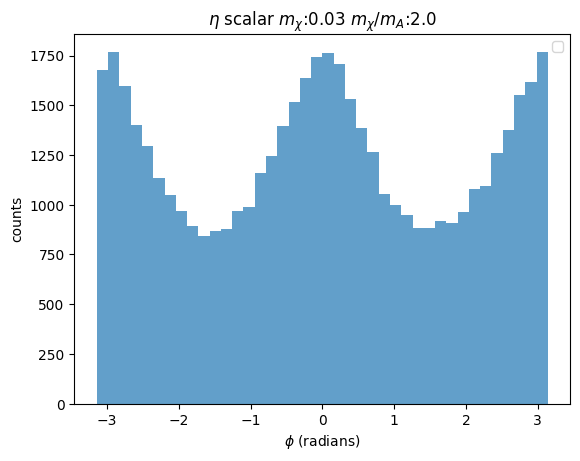

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


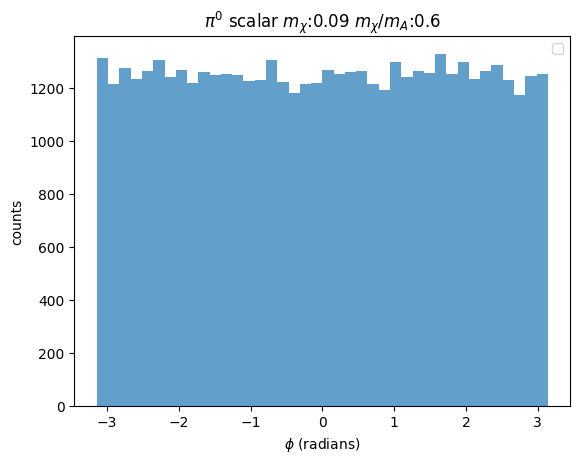

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


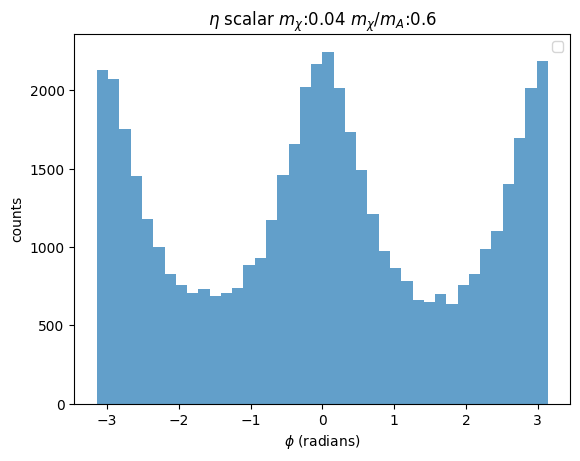

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


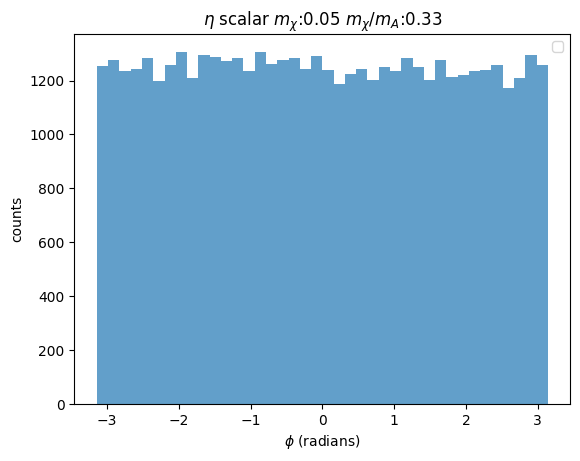

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


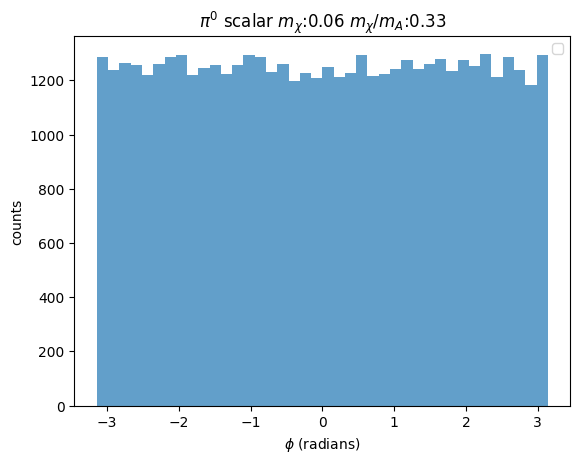

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


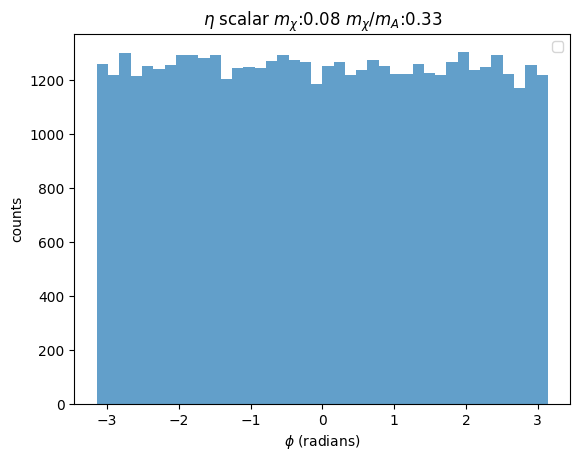

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


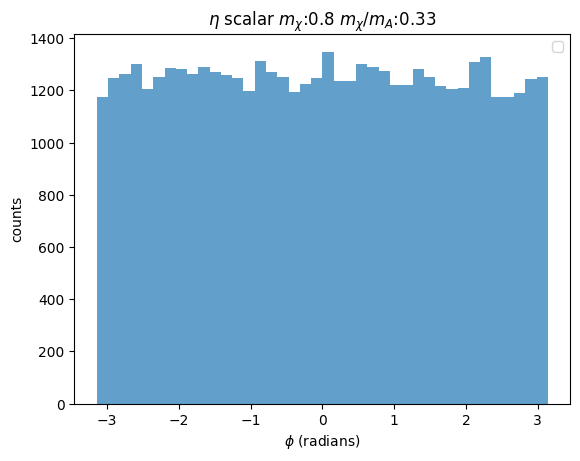

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


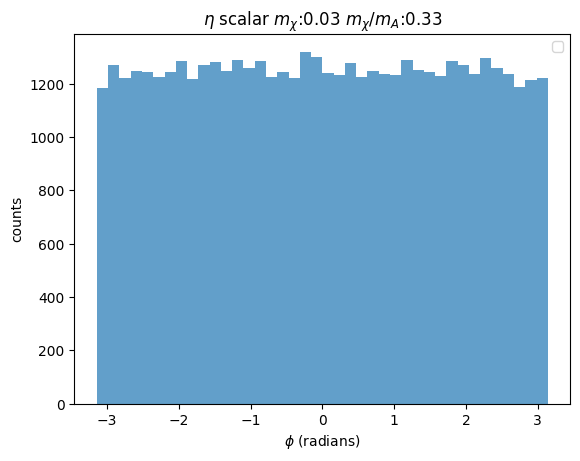

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


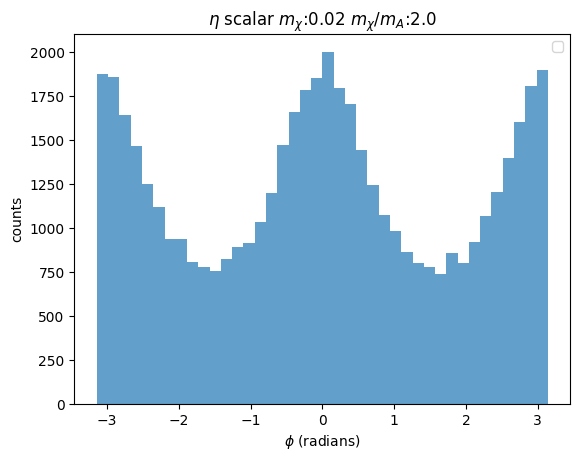

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


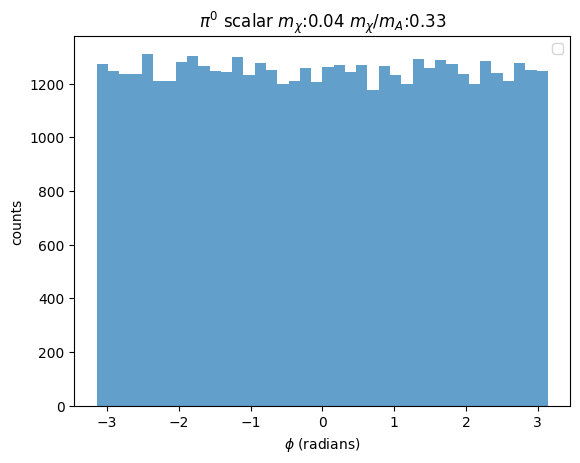

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


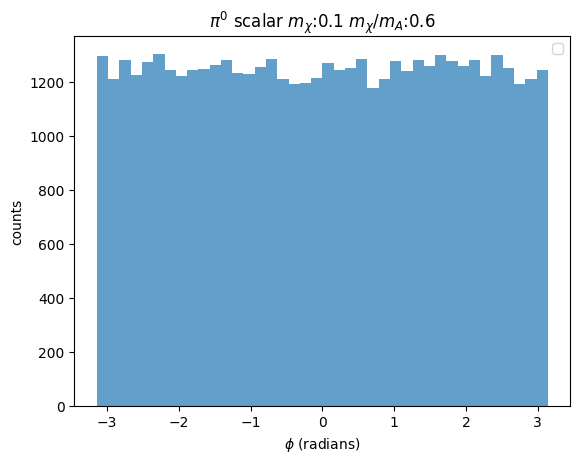

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


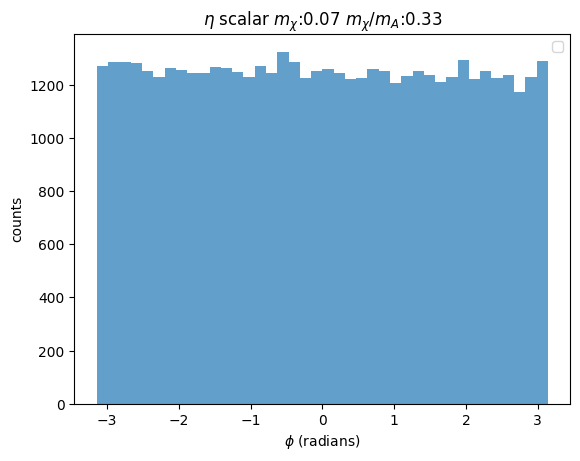

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


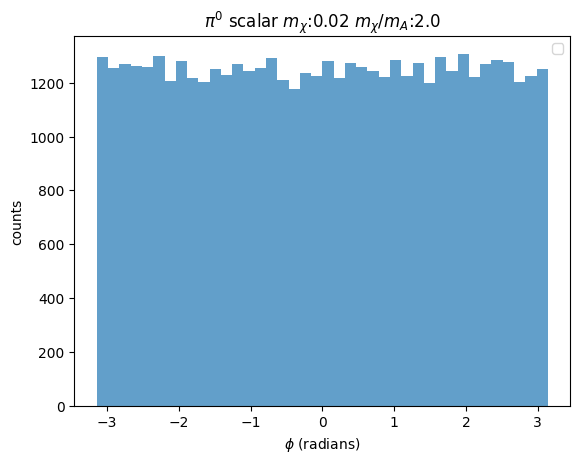

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


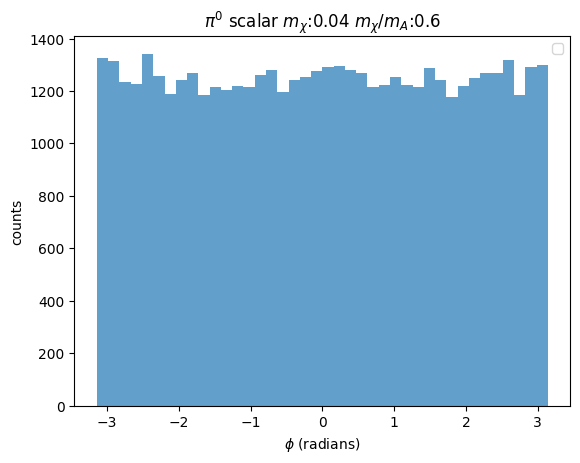

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


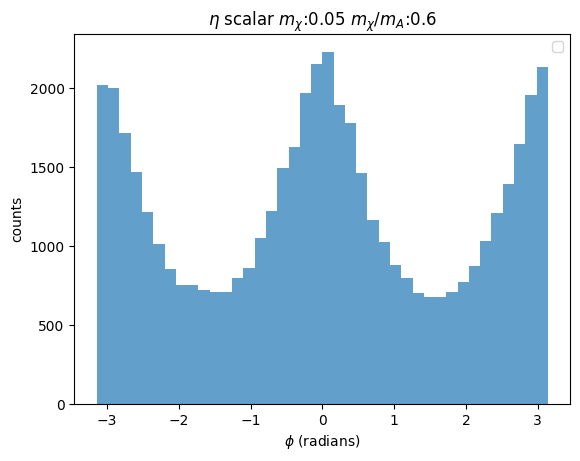

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


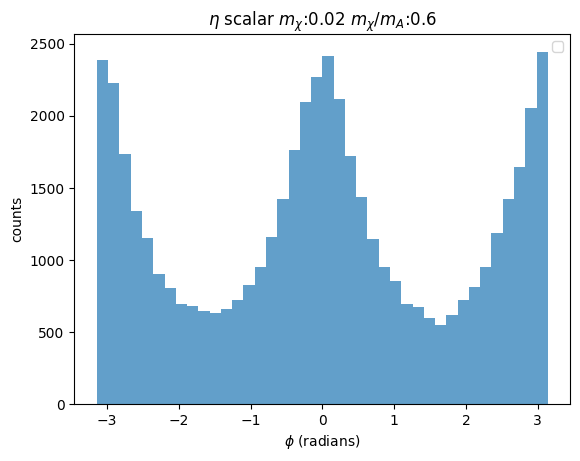

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


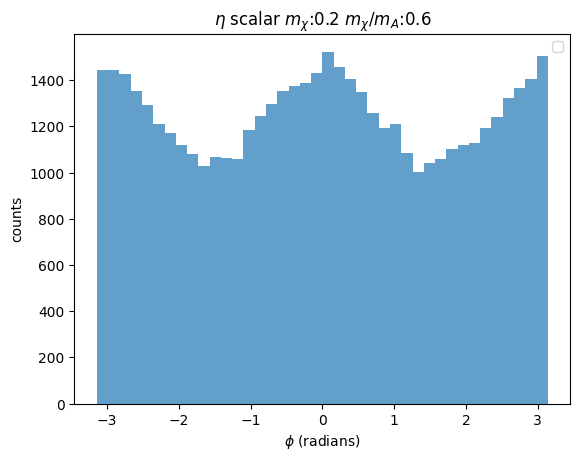

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


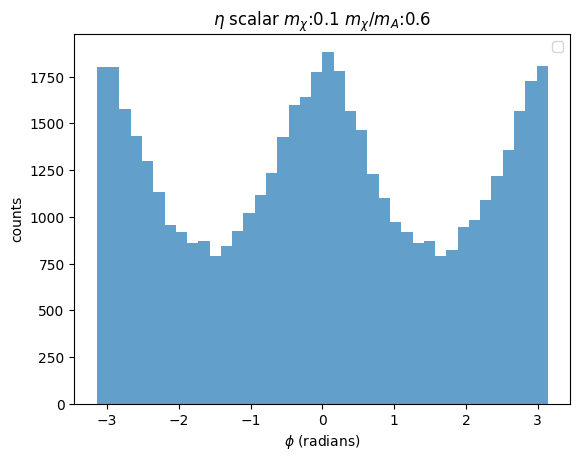

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


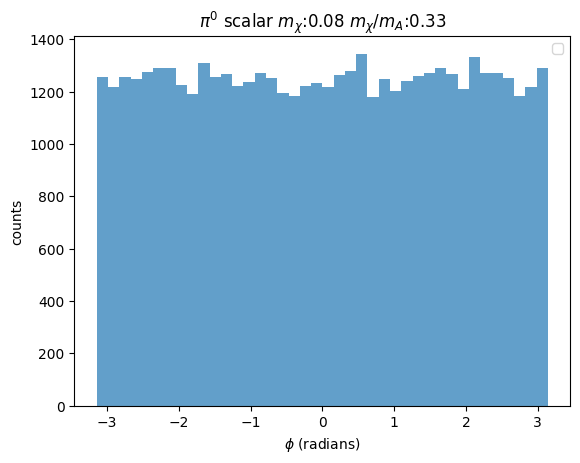

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


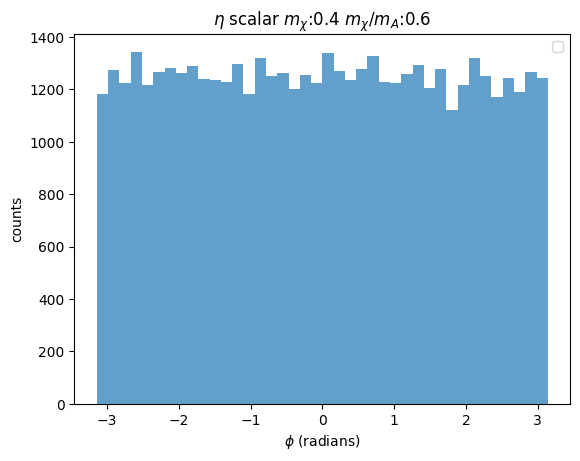

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


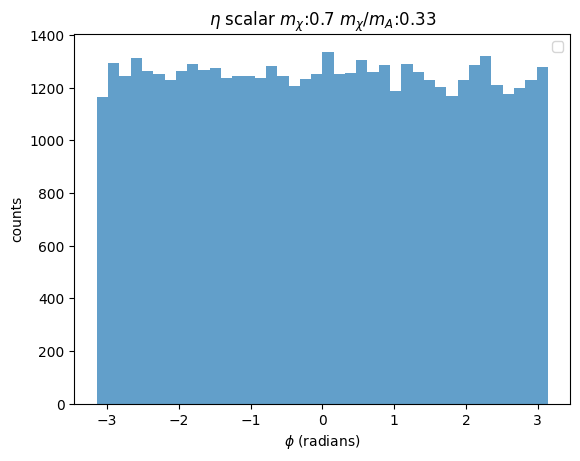

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


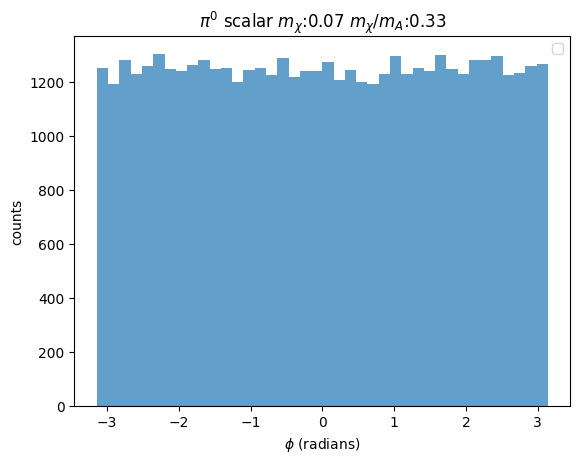

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


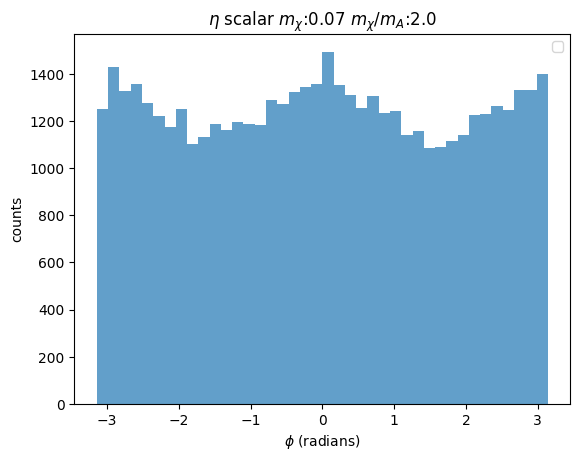

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


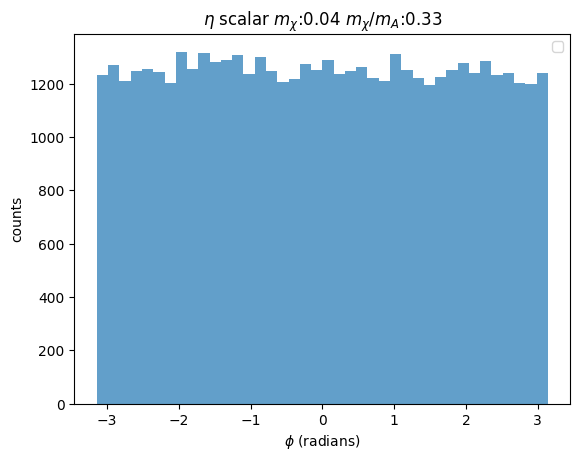

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


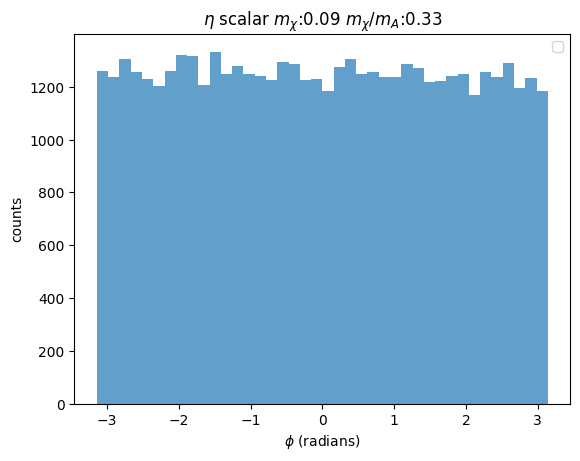

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


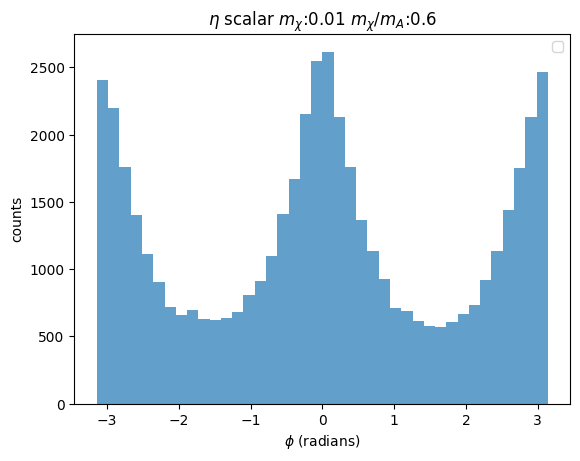

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


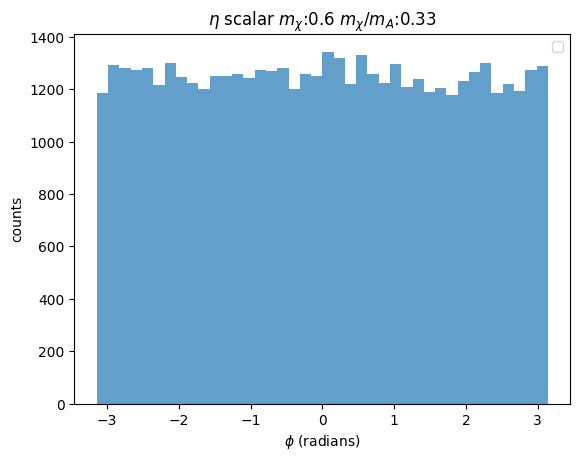

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


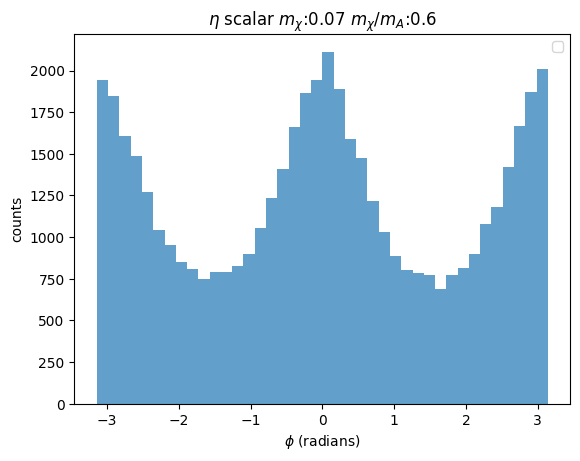

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


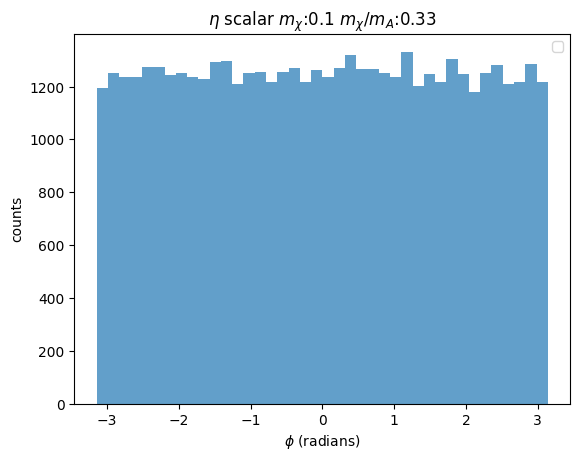

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


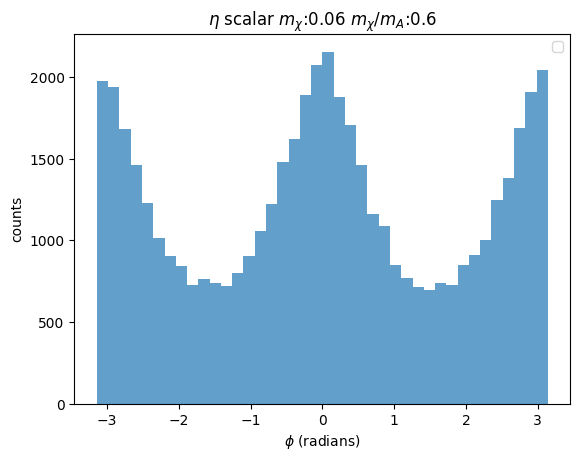

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


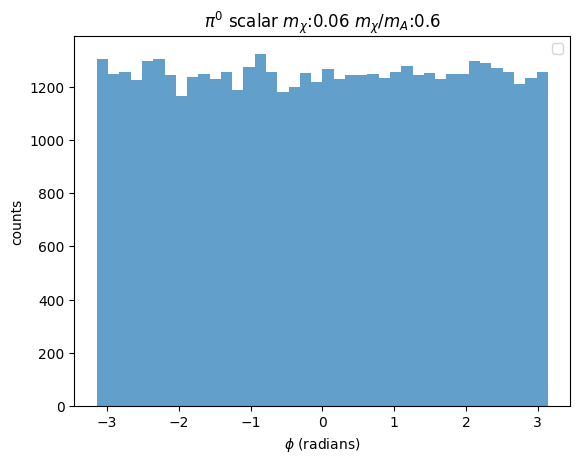

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


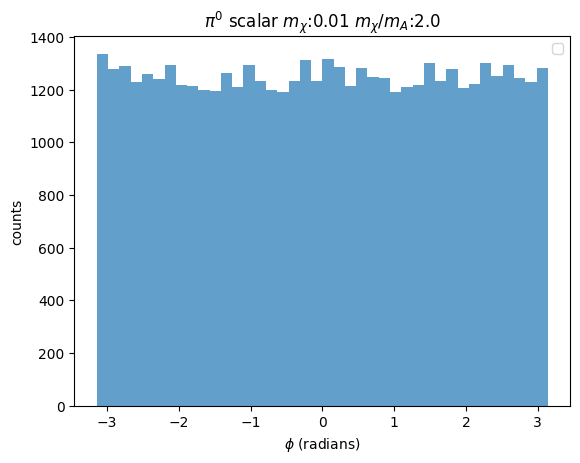

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


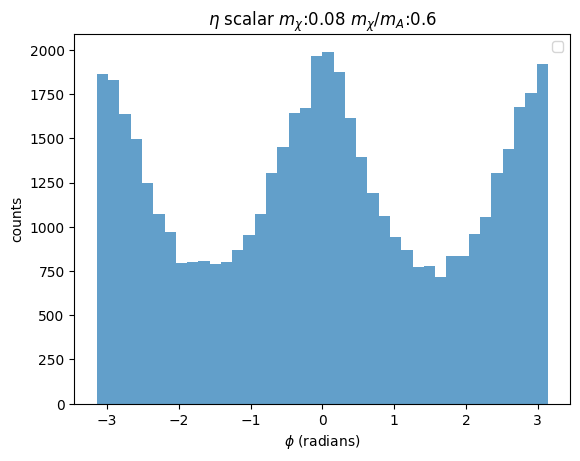

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


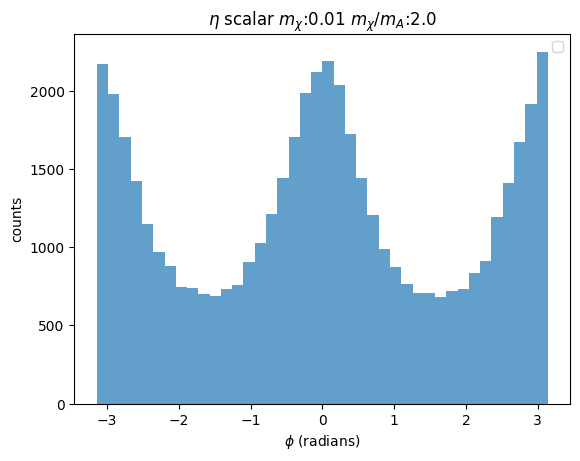

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


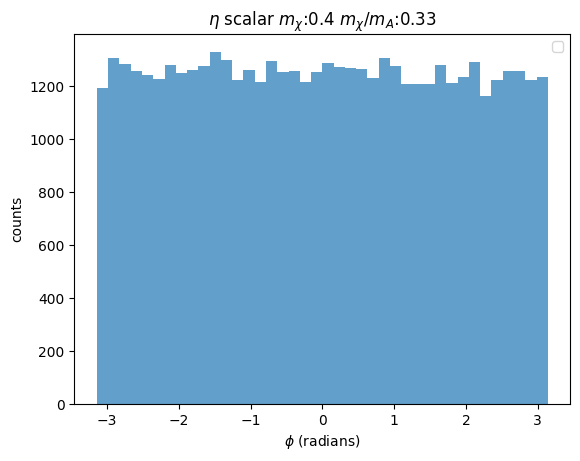

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


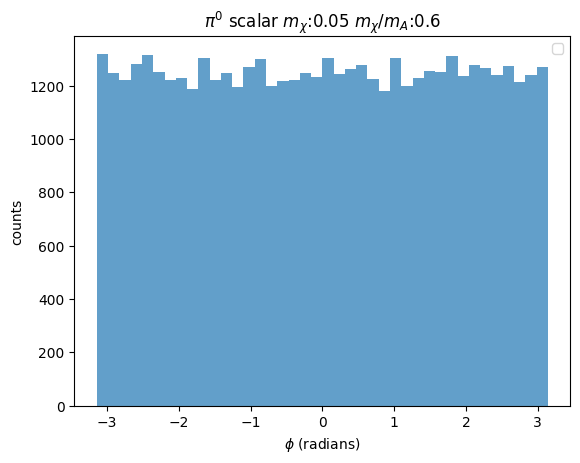

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


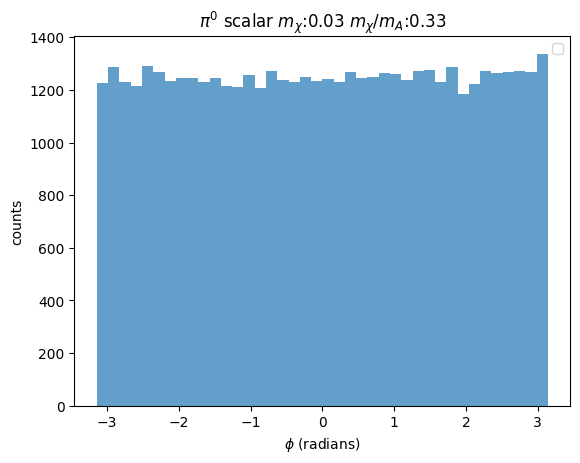

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


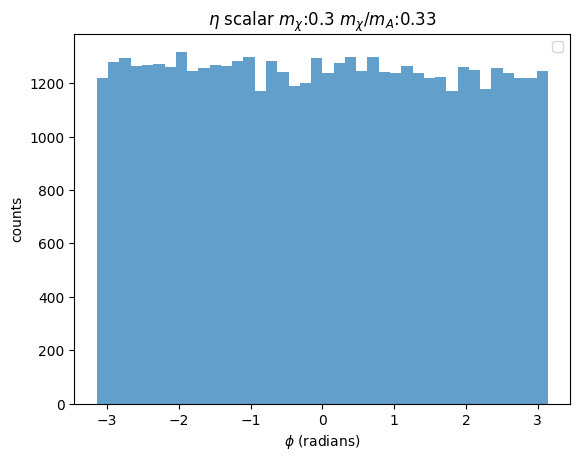

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


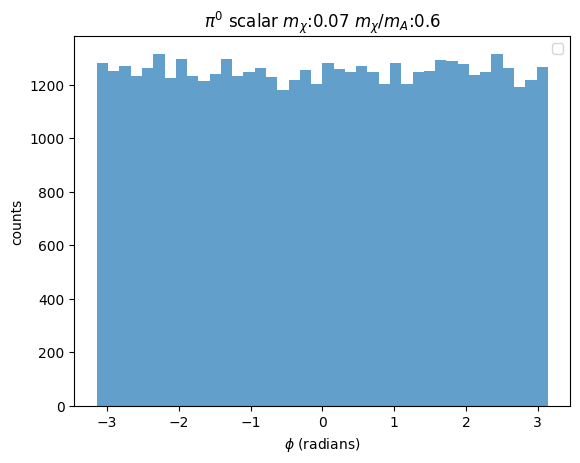

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


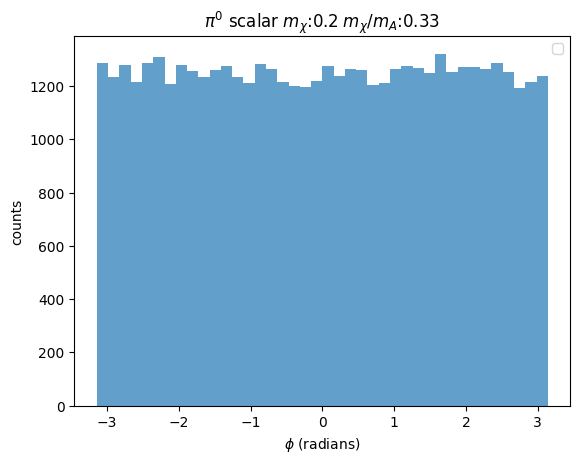

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


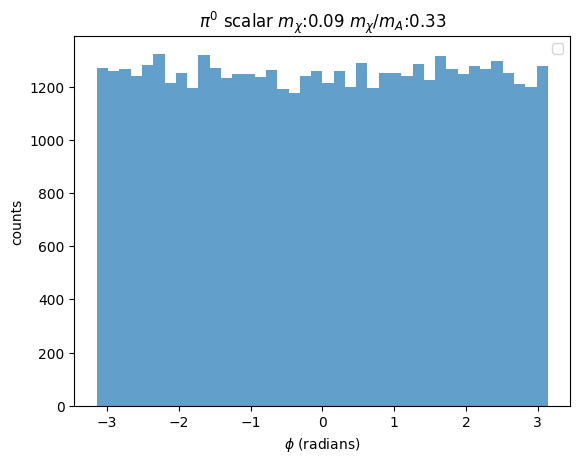

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


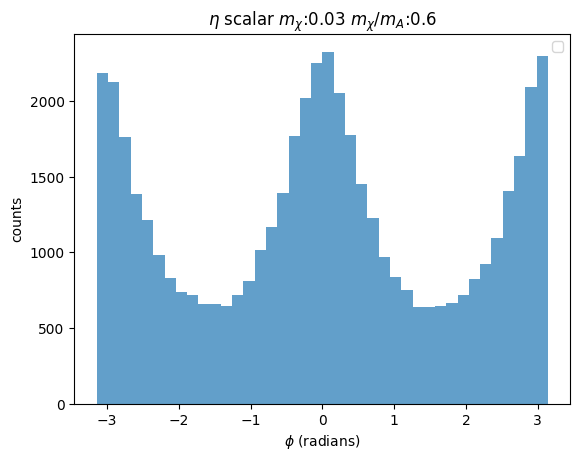

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


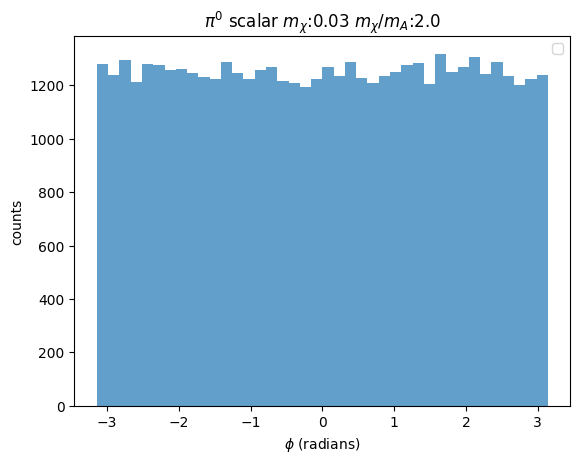

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


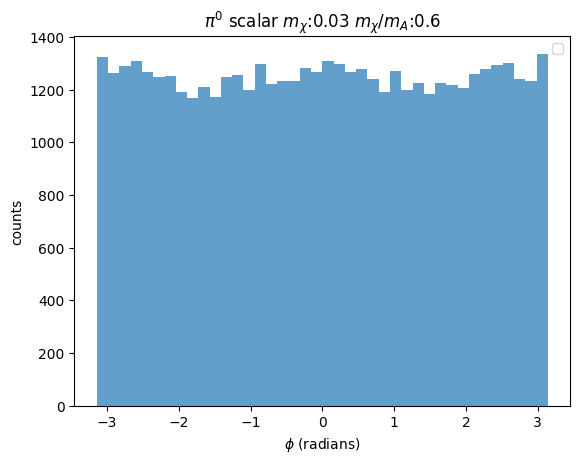

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


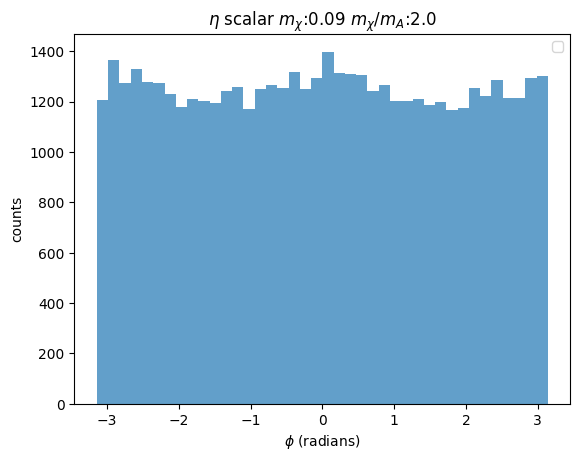

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


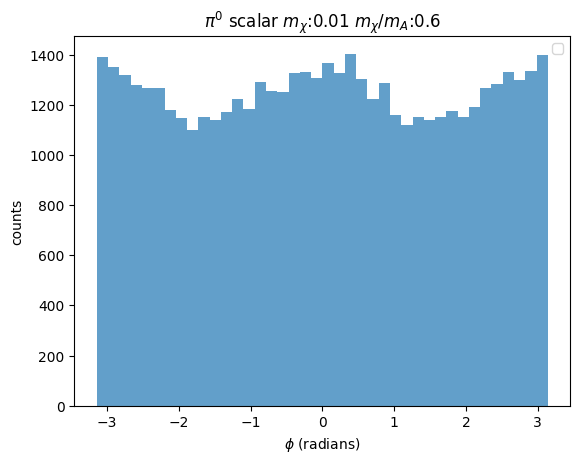

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


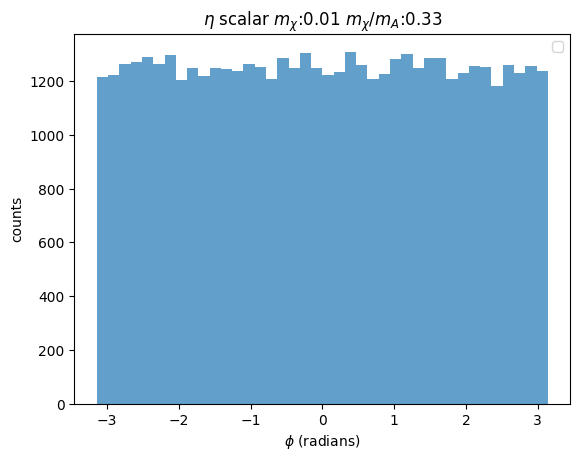

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


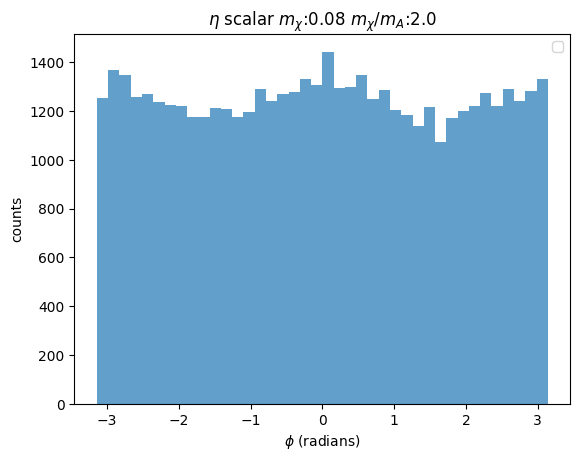

In [8]:
m_eta = 0.547862
m_pi0 = 0.1349766
dm_type = ['fermion','scalar']
flatness = []
for type in dm_type:
    path_signal = f"../data/root_files/{type}_tmp/"
    path_bkg = f"../data/root_files/angular_mesons/{type}/"
    files = os.listdir(path_signal)
    for file in files:
        signal_momentum = get_momentum(file,path_signal)
        bkg_momentum = get_photon_momentum(file,path_bkg)
        if bkg_momentum is None:
            continue
        if signal_momentum is None:
            continue
        
        signal_momentum = cartesian_to_spherical(signal_momentum)
        bkg_momentum = cartesian_to_spherical(bkg_momentum)
        origin_type, dm_type, mass, dt_ratio = get_name_info(file)
        if origin_type == "pi0":
            meson_mass = m_pi0
        elif origin_type == "eta":
            meson_mass = m_eta
        m_a = mass/dt_ratio
        eq1 = 2*mass <= m_a
        eq2 = m_a < meson_mass
        eq3 = 2*mass >= 0.97*m_a
        all_eq = eq1 and eq2 and eq3
        
        flat_indicator = 0
        
        lines = ['p','theta','phi']
        names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
        for i in range(3):
            if lines[i] != 'phi':
                continue
            max_value = bkg_momentum[lines[i]].max()
            min_value = bkg_momentum[lines[i]].min()
            min_sig = signal_momentum[lines[i]].min()
            max_sig = signal_momentum[lines[i]].max()
            
            #plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
            counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
            plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,density=False)
            std_dev = np.std(bkg_momentum[lines[i]])
            
            if std_dev < 1.82:
                flat_indicator = 1
            else:
                flat_indicator = 0
            flatness.append([origin_type,dm_type,mass,dt_ratio,std_dev,flat_indicator])
            # Plotting vertical lines
            #plt.axvline(min_sig, color='red', linestyle='--', label='start of detector')
            #plt.axvline(max_sig, color='blue', linestyle='--', label='end of detector')
            #check if $\{name}$ is a correct variable
            if origin_type == "pi0":
                new_type = "pi^0"
            else:
                new_type = origin_type
            
            plt.title(rf"$\{new_type}$ {dm_type} $m_\chi$:{mass} $m_\chi/m_A$:{dt_ratio}")
            plt.xlabel(names[i])
            plt.ylabel('counts')
            plt.legend()
            plt.show()

(array([ 22.,  97., 107., 139., 125., 138., 144., 123.,  80.,  25.]),
 array([0.05293583, 0.35637522, 0.65981461, 0.963254  , 1.26669339,
        1.57013278, 1.87357217, 2.17701156, 2.48045095, 2.78389034,
        3.08732973]),
 <BarContainer object of 10 artists>)

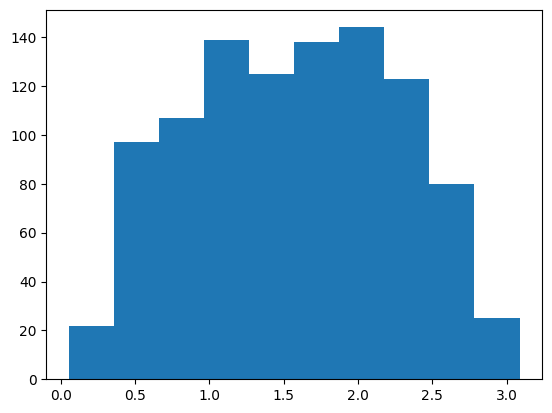

In [16]:
arccos = np.arccos(np.random.uniform(-1,1,1000))

#plot the histogram of arccos
plt.hist(arccos,bins=10)

In [39]:
m_eta = 0.547862
m_pi0 = 0.1349766
dm_type = ['fermion','scalar']
flatness = []
for type in dm_type:
    path_signal = f"../data/root_files/{type}_tmp/"
    path_bkg = f"../data/root_files/angular_mesons/{type}/"
    files = os.listdir(path_signal)
    file = files[0]
    with up.open(path_bkg+file) as f:
        px = f[b'event_tree']["dm_px"].array()
        py = f[b'event_tree']["dm_py"].array()
        pz = f[b'event_tree']["dm_pz"].array()
        id = f[b'event_tree']["id"].array()
        photonx = f[b'dark_photon_tree']["photon_px"].array()
        photony = f[b'dark_photon_tree']["photon_py"].array()
        photonz = f[b'dark_photon_tree']["photon_pz"].array()
        photon_id = f[b'dark_photon_tree']["photon_id"].array()
    dm_df = pd.DataFrame({'px':px,'py':py,'pz':pz,'id':id})
    photon_df = pd.DataFrame({'px':photonx,'py':photony,'pz':photonz,'id':photon_id})
    break

In [46]:
dm_df_sphere = cartesian_to_spherical(dm_df)

In [54]:
phi_values = []
for i in range(len(dm_df)):
    px = dm_df['px'][i]
    py = dm_df['py'][i]
    pz = dm_df['pz'][i]
    p0 = np.sqrt(px**2 + py**2 + pz**2)
    phi_values.append(phi(px, py, pz, p0))
phi_values = np.array(phi_values)

In [48]:
dm_df_sphere.head()

p     theta       phi
0  9.179227  0.061676 -2.965609
1  3.656791  0.066712 -2.958063
2  7.735129  0.050106  1.289817
3  8.528954  0.019616  2.477745
4  8.033066  0.068736  2.634502

(array([12965.,  8664.,  6882.,  8636., 13006., 13055.,  8513.,  6846.,
         8699., 12736.]),
 array([-3.14151073e+00, -2.51320518e+00, -1.88489964e+00, -1.25659410e+00,
        -6.28288556e-01,  1.69866752e-05,  6.28322530e-01,  1.25662807e+00,
         1.88493362e+00,  2.51323916e+00,  3.14154470e+00]),
 <BarContainer object of 10 artists>)

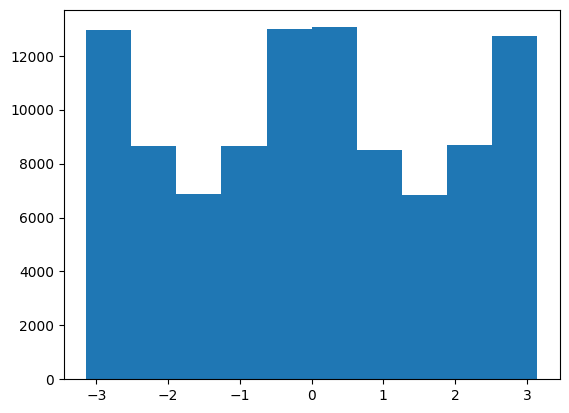

In [55]:
#plot phi values
plt.hist(dm_df_sphere["phi"],bins=10)

(array([13057.,  8513.,  6844.,  8699., 12736., 12965.,  8663.,  6882.,
         8637., 13006.]),
 array([1.10982095e-04, 6.28414931e-01, 1.25671888e+00, 1.88502283e+00,
        2.51332678e+00, 3.14163073e+00, 3.76993467e+00, 4.39823862e+00,
        5.02654257e+00, 5.65484652e+00, 6.28315047e+00]),
 <BarContainer object of 10 artists>)

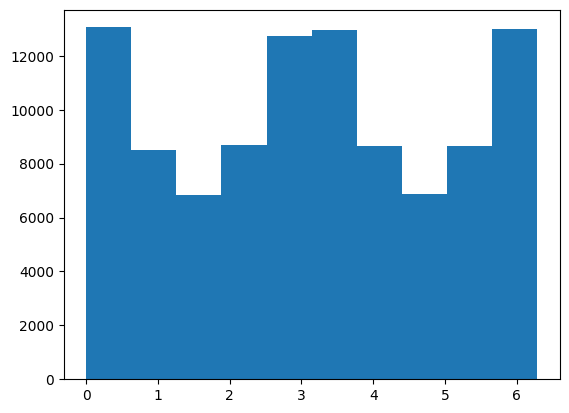

In [56]:
plt.hist(phi_values,bins=10)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


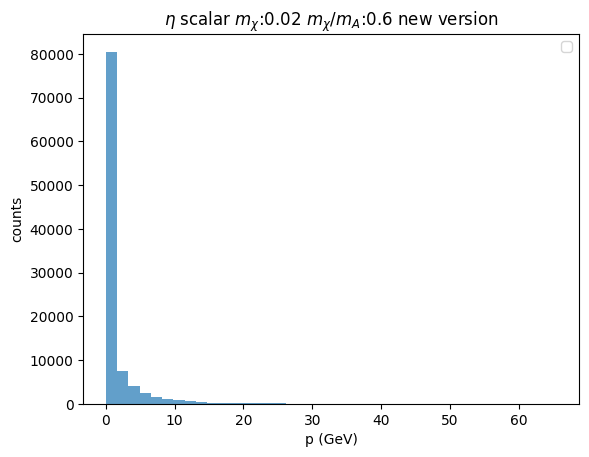

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


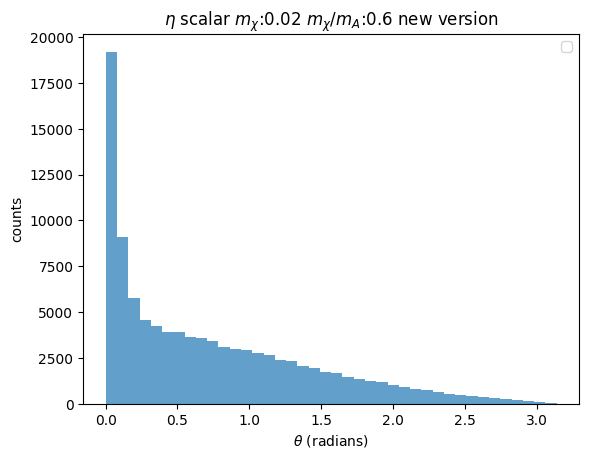

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


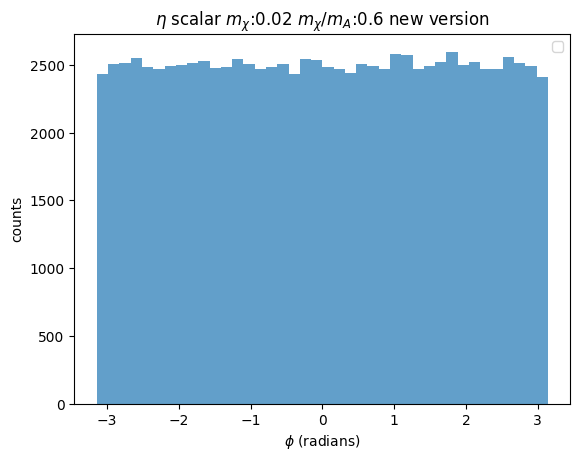

In [3]:
dt_ratio = 0.6
mass = 0.02
origin_type = "eta"
type = "scalar"
path_bkg = f"../data/root_files/test/"
files = os.listdir(path_bkg)
for file in files:
    if file != "bdnmc_pi0_test.root":
        continue

    bkg_momentum = get_momentum(file,path_bkg)
    if bkg_momentum is None:
        continue
    
    

    bkg_momentum = cartesian_to_spherical(bkg_momentum)
    
    
    
    flat_indicator = 0
    
    lines = ['p','theta','phi']
    names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
    for i in range(3):
        
        max_value = bkg_momentum[lines[i]].max()
        min_value = bkg_momentum[lines[i]].min()
        
        
        #plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
        counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
        plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,density=False)
        std_dev = np.std(bkg_momentum[lines[i]])
        
        # Plotting vertical lines
        #plt.axvline(min_sig, color='red', linestyle='--', label='start of detector')
        #plt.axvline(max_sig, color='blue', linestyle='--', label='end of detector')
        #check if $\{namepath_signal) "pi0":
        
        plt.title(rf"$\{origin_type}$ {type} $m_\chi$:{mass} $m_\chi/m_A$:{dt_ratio} new version")
        plt.xlabel(names[i])
        plt.ylabel('counts')
        plt.legend()
        plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


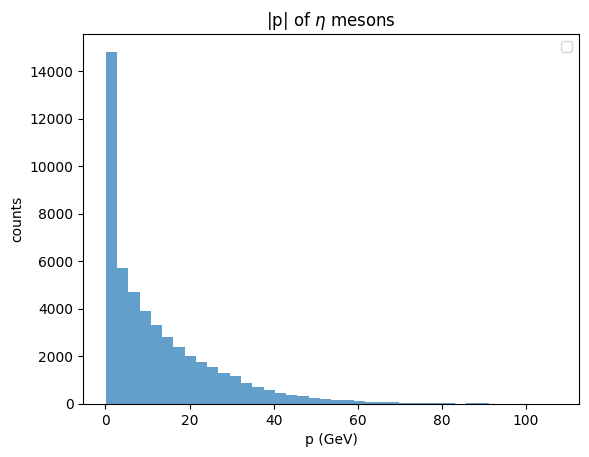

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


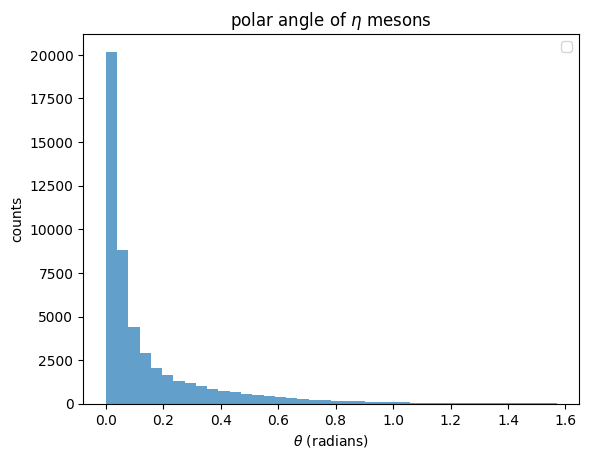

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


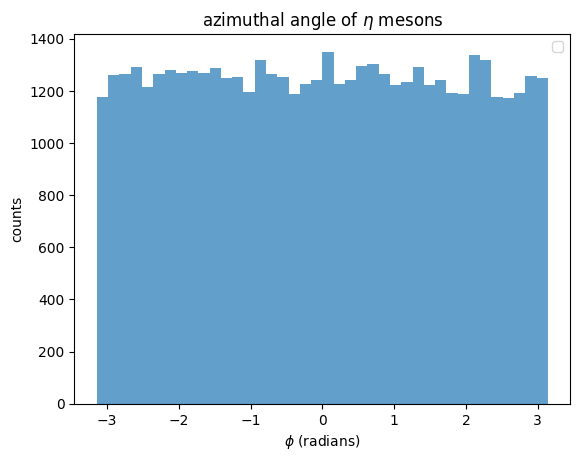

In [4]:
dt_ratio = 0.6
mass = 0.02
origin_type = "eta"
type = "scalar"
path = f"../data/root_files/angular_mesons/{type}/"
file = f"{origin_type}_{type}_ma_{mass}_dt_{dt_ratio}.root"
bkg_momentum = get_meson_momentum(file,path)
bkg_momentum = cartesian_to_spherical(bkg_momentum)
    
titles = ["|p| of $\eta$ mesons","polar angle of $\eta$ mesons","azimuthal angle of $\eta$ mesons"]
    
flat_indicator = 0

lines = ['p','theta','phi']
names = ['p (GeV)',rf'$\theta$ (radians)',rf'$\phi$ (radians)']
for i in range(3):
    
    max_value = bkg_momentum[lines[i]].max()
    min_value = bkg_momentum[lines[i]].min()
    
    
    #plt.hist(signal_momentum[lines[i]],bins=100,range=(min_value,max_value),alpha=0.7,label='detector hit',density=True)
    counts, bin_edges = np.histogram(bkg_momentum[lines[i]], bins=40, range=(min_value,max_value))
    plt.hist(bkg_momentum[lines[i]],bins=40,range=(min_value,max_value),alpha=0.7,density=False)
    std_dev = np.std(bkg_momentum[lines[i]])
    
    # Plotting vertical lines
    #plt.axvline(min_sig, color='red', linestyle='--', label='start of detector')
    #plt.axvline(max_sig, color='blue', linestyle='--', label='end of detector')
    #check if $\{namepath_signal) "pi0":
    
    plt.title(titles[i])
    plt.xlabel(names[i])
    plt.ylabel('counts')
    plt.legend()
    plt.savefig(f"../plots/report/etas_{lines[i]}.pdf")
    plt.show()
